In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools
%matplotlib inline

In [3]:
%cd /content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files

/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files


In [4]:
# print all the filenames inside the downloaded data
for dirname, _, filenames in os.walk('/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files/Test-1542969243754.csv
/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files/Test_Beneficiarydata-1542969243754.csv
/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files/Test_Inpatientdata-1542969243754.csv
/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files/Test_Outpatientdata-1542969243754.csv
/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files/Train_Beneficiarydata-1542865627584.csv
/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files/Train-1542865627584.csv
/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files/Train_Outpatientdata-1542865627584.csv
/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files/Train_Inpatientdata-1542865627584.csv
/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files/Final_Dataset_Test.csv
/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files/Final_Dataset_Train.csv
/content/drive/Shareddrives/Healthcare_Fraud/Unzipped_Files/Final_Train.csv

In [5]:
# Load the train data into dataframe
Train = pd.read_csv("Train-1542865627584.csv")
Train_Beneficiary = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
Train_Inpatient = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
Train_Outpatient = pd.read_csv("Train_Outpatientdata-1542865627584.csv")

In [6]:
# Load the test data into dataframe
Test = pd.read_csv("Test-1542969243754.csv")
Test_Beneficiary = pd.read_csv("Test_Beneficiarydata-1542969243754.csv")
Test_Inpatient = pd.read_csv("Test_Inpatientdata-1542969243754.csv")
Test_Outpatient = pd.read_csv("Test_Outpatientdata-1542969243754.csv")

In [7]:
print(Train.shape)
Train.head()

(5410, 2)


Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

In [8]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [9]:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()

def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()

## Train Data

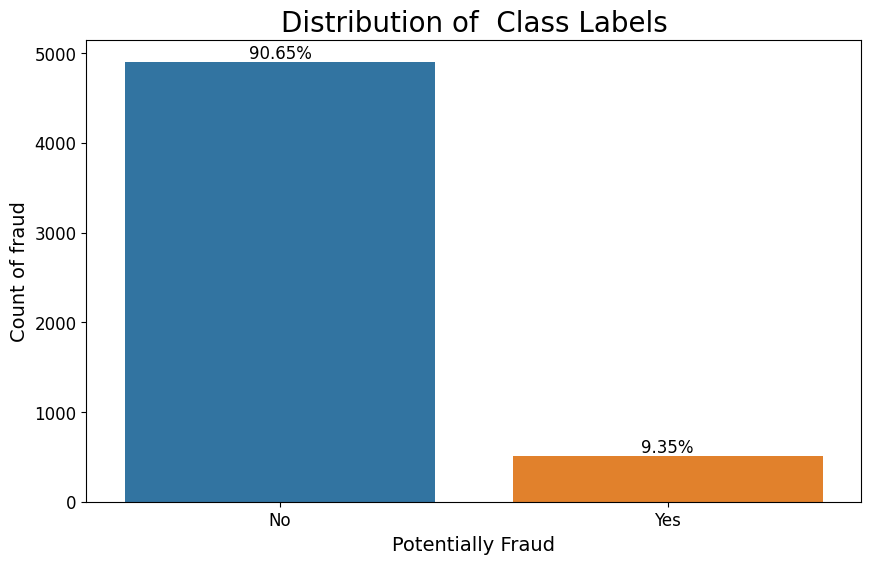

In [10]:
# Check distribution of potential Fraudulent providers
plt.figure(figsize=(10,6))
ax = sns.countplot(x='PotentialFraud',data=Train)
plt.title('Distribution of  Class Labels', fontsize=20)
plt.xlabel('Potentially Fraud', size = 14)
plt.ylabel('Count of fraud', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
percentage_without_hue(ax, Train['PotentialFraud'], 0,40)

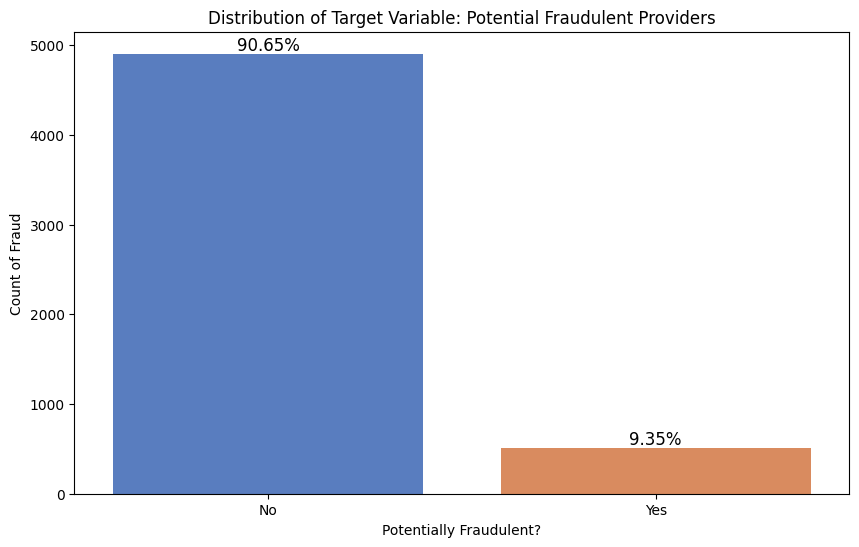

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='PotentialFraud', data=Train, palette='muted')
plt.title('Distribution of Target Variable: Potential Fraudulent Providers')
plt.xlabel('Potentially Fraudulent?')
plt.ylabel('Count of Fraud')
plt.xticks()
plt.yticks()
plt.grid(False)
percentage_without_hue(ax, Train['PotentialFraud'], 0, 40)

plt.show()

Train data is imbalanced. We can use stratifiedKfold or **SMOTE** to balance it.

Also, need to select appropriate evaluation metrics.

https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

https://datasciencedojo.com/blog/techniques-to-handle-imbalanced-data/#


*   Precision
*   Recall
*   F1 Score
*   AUC
*   Confusion Matirx\



## Train_Beneficiary

In [12]:
print(Train_Beneficiary.shape)
Train_Beneficiary.head()

(138556, 25)


BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2                     2                          2   
2                       2                     2                          1   
3                       2                     1                          1   
4                       2                     1                          2   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         2                                1   
1                         2                                2   
2                         2                                2   
3                         1                                1   
4                         2                                2   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   2                         0                      0   
2                   2                         0                      0   
3                   2                         0                      0   
4                   2                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0                        60                     70  
1                        30                     50  
2                        90                     40  
3                      1810                    760  
4                      1790                   1200  

[5 rows x 25 columns]

In [13]:
Train_Beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

What does the columns NoOfMonth_PartACov and NoOfMonths_PartBCov mean?

In [14]:
Train_Beneficiary['NoOfMonths_PartACov'].unique()

array([12,  0,  3,  7, 10, 11,  8,  4,  1,  6,  2,  9,  5])

In [15]:
Train_Beneficiary['NoOfMonths_PartBCov'].unique() # drop it

array([12,  0,  1,  9, 11,  3, 10,  8,  2,  6,  4,  5,  7])

In [16]:
Train_Beneficiary.describe()

Gender           Race          State         County  \
count  138556.000000  138556.000000  138556.000000  138556.000000   
mean        1.570932       1.254511      25.666734     374.424745   
std         0.494945       0.717007      15.223443     266.277581   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000       1.000000      11.000000     141.000000   
50%         2.000000       1.000000      25.000000     340.000000   
75%         2.000000       1.000000      39.000000     570.000000   
max         2.000000       5.000000      54.000000     999.000000   

       NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
count        138556.000000        138556.000000          138556.000000   
mean             11.907727            11.910145               1.667817   
std               1.032332             0.936893               0.470998   
min               0.000000             0.000000               1.000000   
25%              12.000000            12.000000               1.000000   
50%              12.000000            12.000000               2.000000   
75%              12.000000            12.000000               2.000000   
max              12.000000            12.000000               2.000000   

       ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
count             138556.000000              138556.000000   
mean                   1.506322                   1.687643   
std                    0.499962                   0.463456   
min                    1.000000                   1.000000   
25%                    1.000000                   1.000000   
50%                    2.000000                   2.000000   
75%                    2.000000                   2.000000   
max                    2.000000                   2.000000   

       ChronicCond_Cancer  ...  ChronicCond_Depression  ChronicCond_Diabetes  \
count       138556.000000  ...           138556.000000         138556.000000   
mean             1.880041  ...                1.644476              1.398142   
std              0.324914  ...                0.478674              0.489517   
min              1.000000  ...                1.000000              1.000000   
25%              2.000000  ...                1.000000              1.000000   
50%              2.000000  ...                2.000000              1.000000   
75%              2.000000  ...                2.000000              2.000000   
max              2.000000  ...                2.000000              2.000000   

       ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
count              138556.000000             138556.000000   
mean                    1.324143                  1.725317   
std                     0.468056                  0.446356   
min                     1.000000                  1.000000   
25%                     1.000000                  1.000000   
50%                     1.000000                  2.000000   
75%                     2.000000                  2.000000   
max                     2.000000                  2.000000   

       ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
count                    138556.000000       138556.000000   
mean                          1.743180            1.920942   
std                           0.436881            0.269831   
min                           1.000000            1.000000   
25%                           1.000000            2.000000   
50%                           2.000000            2.000000   
75%                           2.000000            2.000000   
max                           2.000000            2.000000   

       IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
count             138556.000000          138556.000000   
mean                3660.346502             399.847296   
std                 9568.621827             956.175202   
min                -8000.000000               0.000000   
25%                    0.000000      

In [17]:
Train_Beneficiary['RenalDiseaseIndicator'].unique()

array(['0', 'Y'], dtype=object)

In [18]:
# Replacing 'Y' with 1 and convert to numeric
Train_Beneficiary = Train_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

# Convert to numeric
Train_Beneficiary['RenalDiseaseIndicator'] = Train_Beneficiary['RenalDiseaseIndicator'].astype('int64')

In [19]:
# Replace 2 with 0 for chronic conditions, Zero indicates chronic condition is not detected
Train_Beneficiary = Train_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

In [20]:
Train_Beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  int64 
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [21]:
# Replacing 'Y' with 1 and convert to numeric
Test_Beneficiary  = Test_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

# Convert to numeric
Test_Beneficiary['RenalDiseaseIndicator'] = Test_Beneficiary['RenalDiseaseIndicator'].astype('int64')

# Replace 2 with 0 for chronic conditions, Zero indicates chronic condition is not detected
Test_Beneficiary = Test_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63968 entries, 0 to 63967
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   BeneID                           63968 non-null  object
 1   DOB                              63968 non-null  object
 2   DOD                              574 non-null    object
 3   Gender                           63968 non-null  int64 
 4   Race                             63968 non-null  int64 
 5   RenalDiseaseIndicator            63968 non-null  int64 
 6   State                            63968 non-null  int64 
 7   County                           63968 non-null  int64 
 8   NoOfMonths_PartACov              63968 non-null  int64 
 9   NoOfMonths_PartBCov              63968 non-null  int64 
 10  ChronicCond_Alzheimer            63968 non-null  int64 
 11  ChronicCond_Heartfailure         63968 non-null  int64 
 12  ChronicCond_KidneyDisease       

In [22]:
# Identify numeric columns
numeric_columns = Train_Beneficiary.select_dtypes(include=['number']).columns
numeric_columns

Index(['Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt'],
      dtype='object')

In [23]:
# Columns to exclude
exclude_columns = ['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'State', 'County']

# Exclude specified columns
numeric_columns_filt = numeric_columns.difference(exclude_columns)
numeric_columns_filt

Index(['ChronicCond_Alzheimer', 'ChronicCond_Cancer', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_Heartfailure',
       'ChronicCond_IschemicHeart', 'ChronicCond_KidneyDisease',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'Gender',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'Race',
       'RenalDiseaseIndicator'],
      dtype='object')

In [24]:
Train_Beneficiary['Gender'].unique()

array([1, 2])

How to handle Gender values?


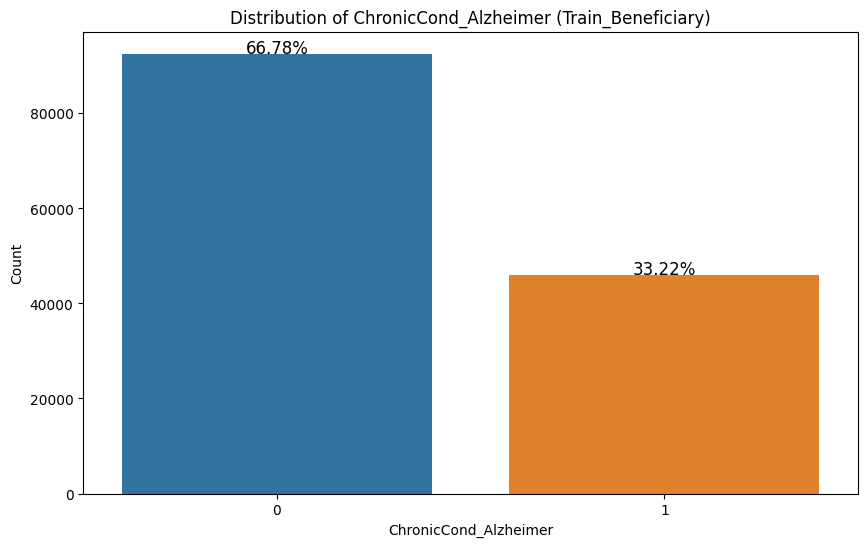

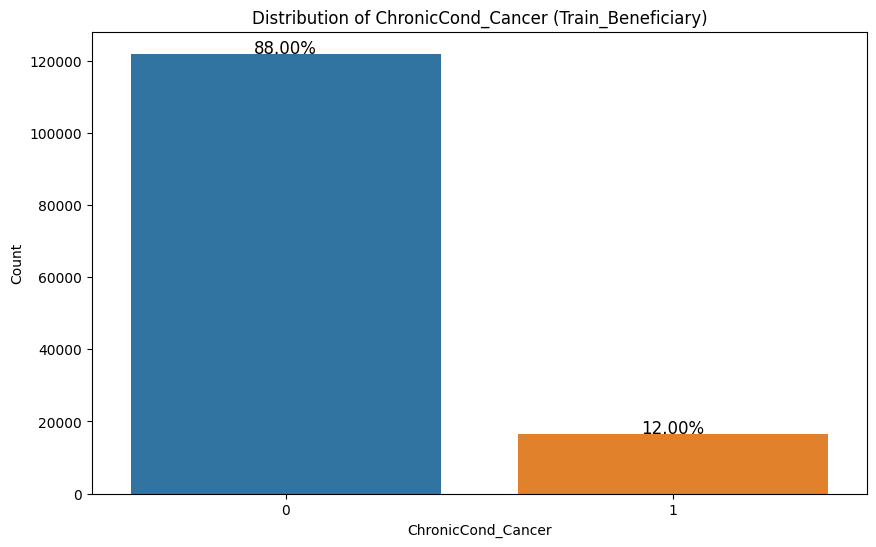

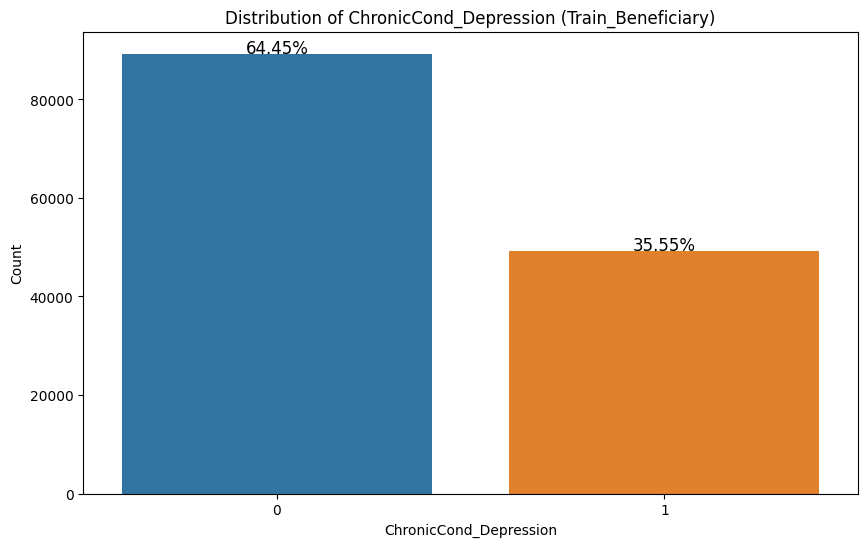

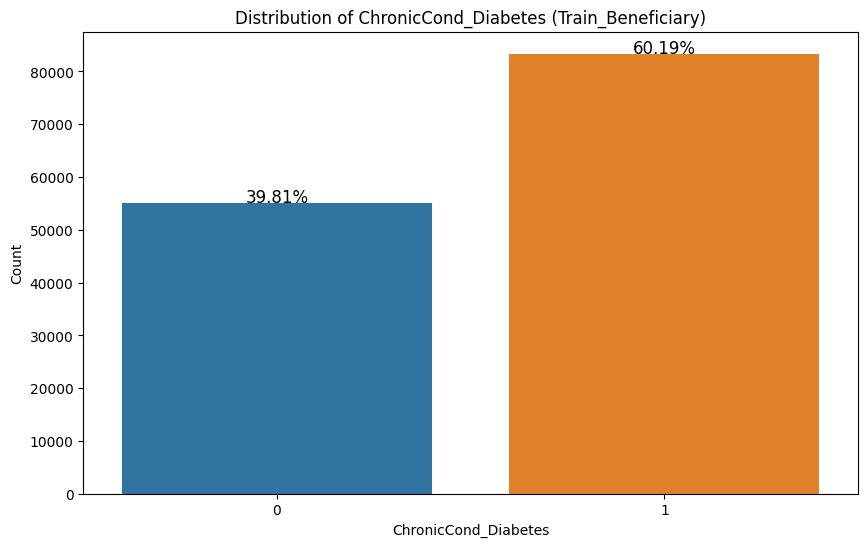

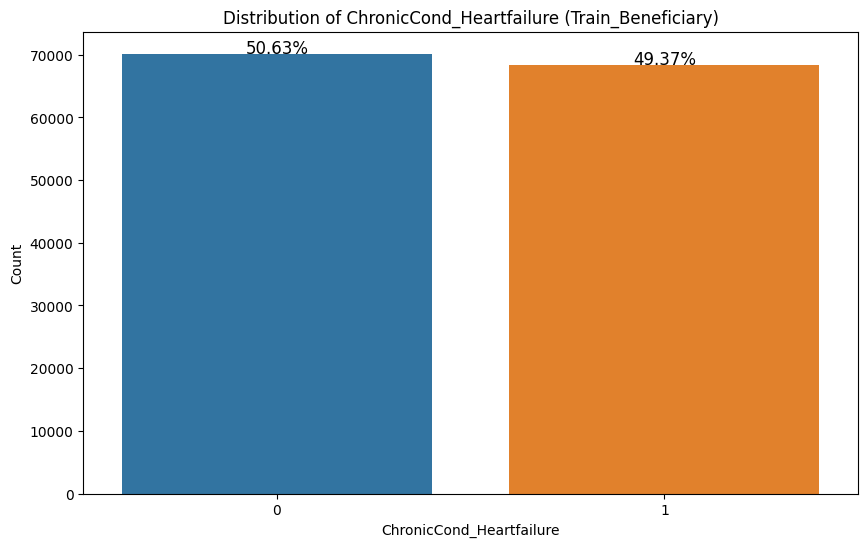

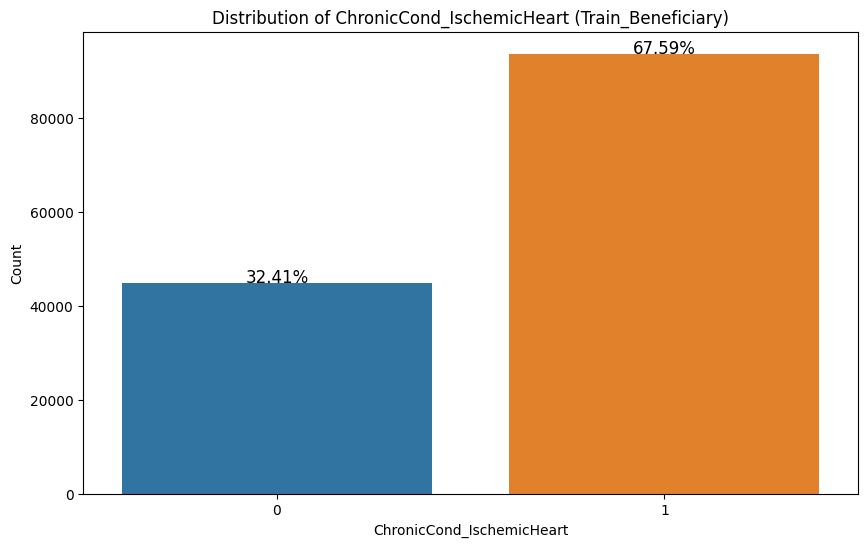

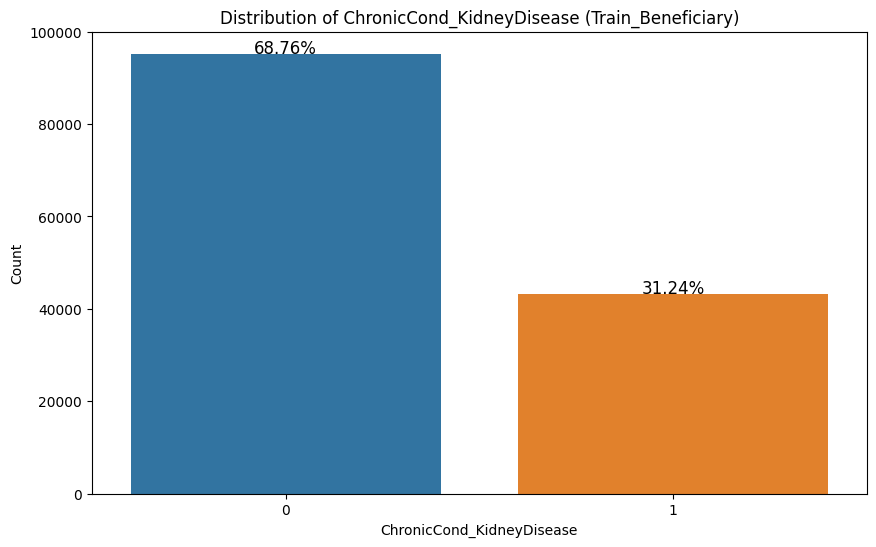

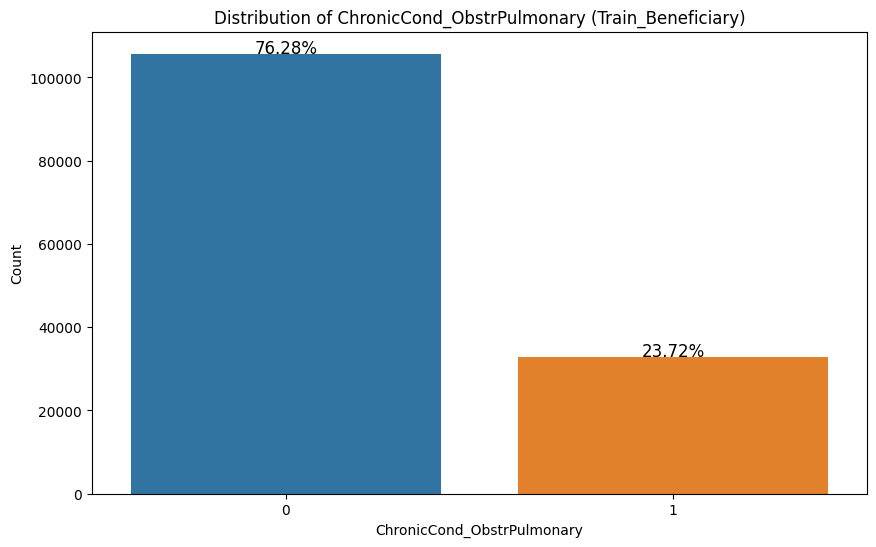

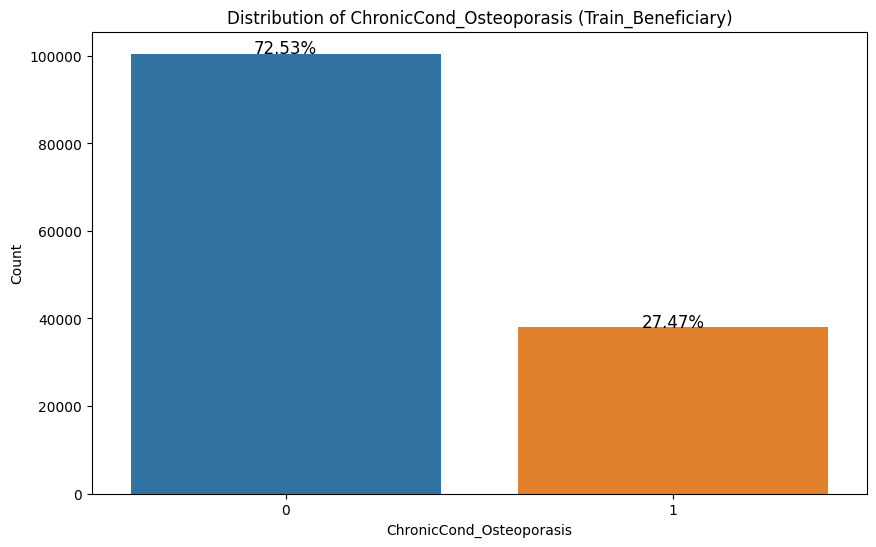

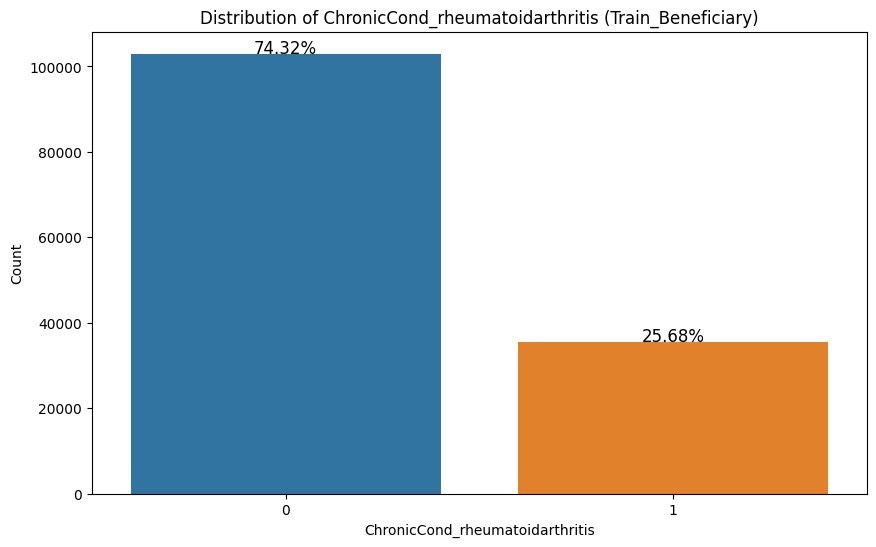

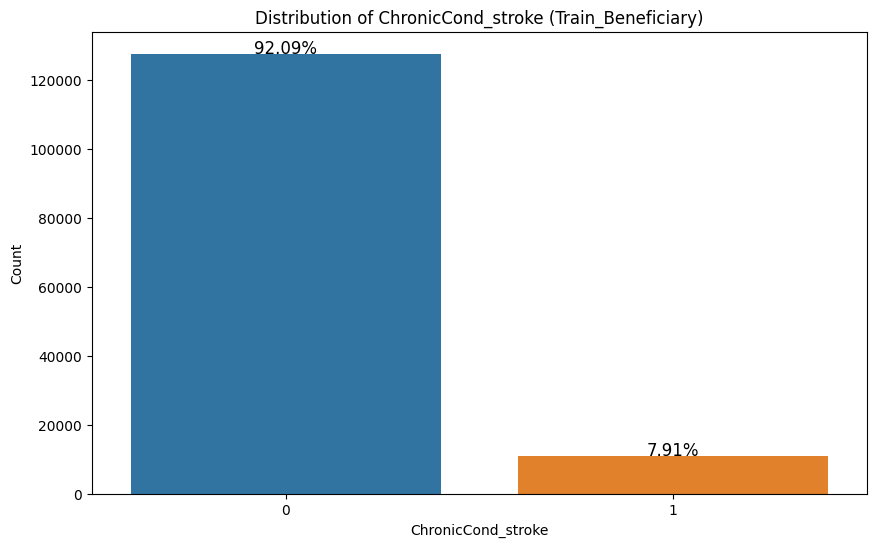

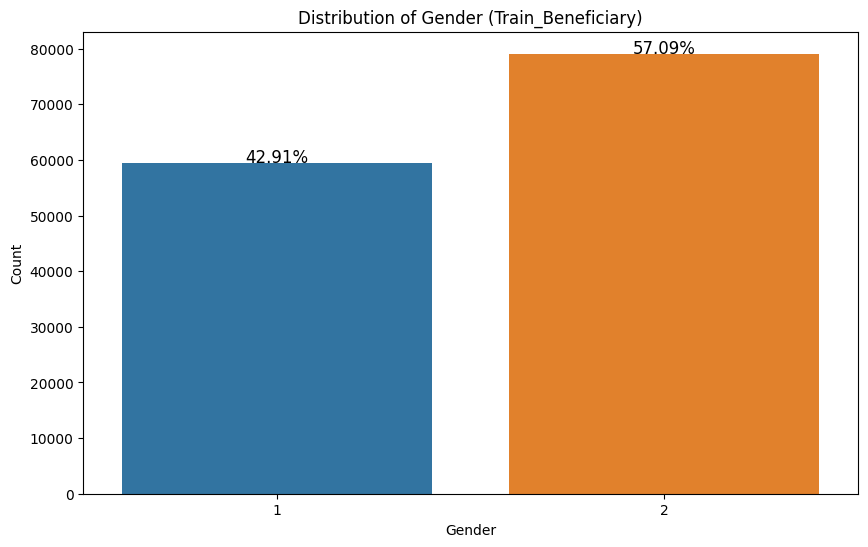

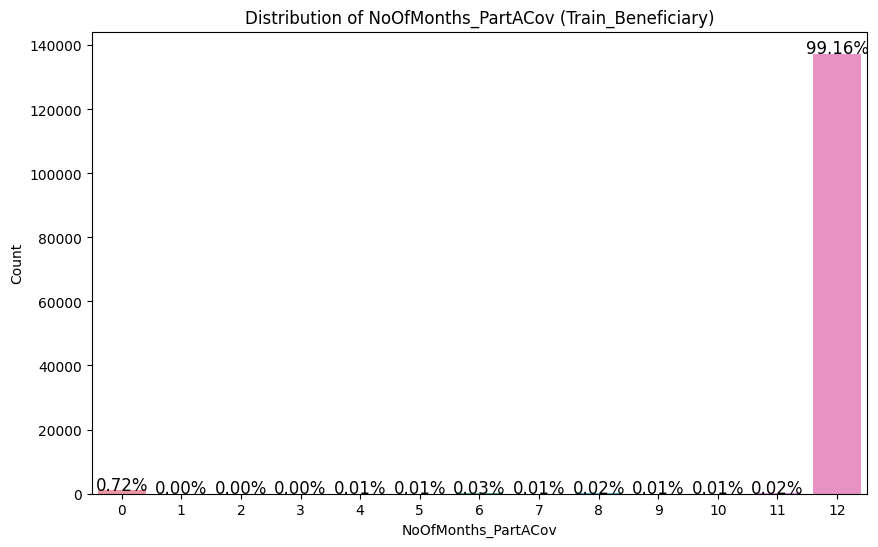

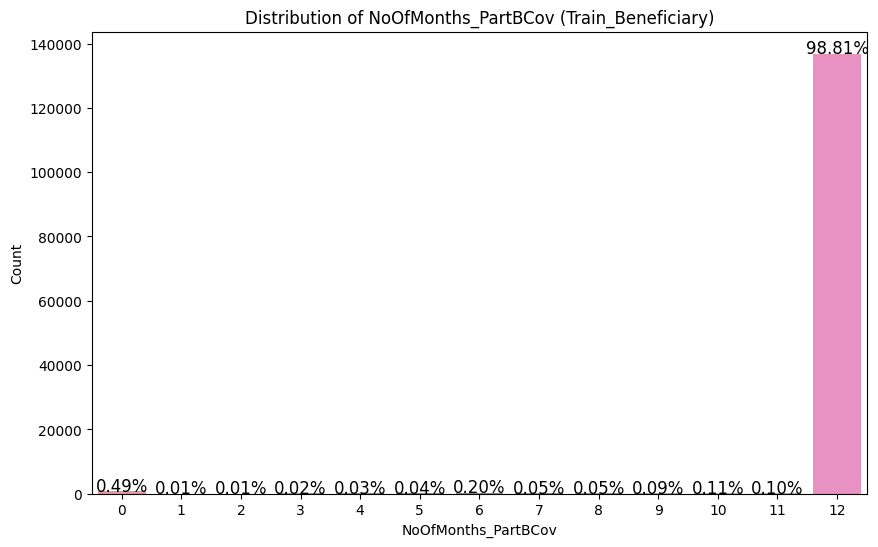

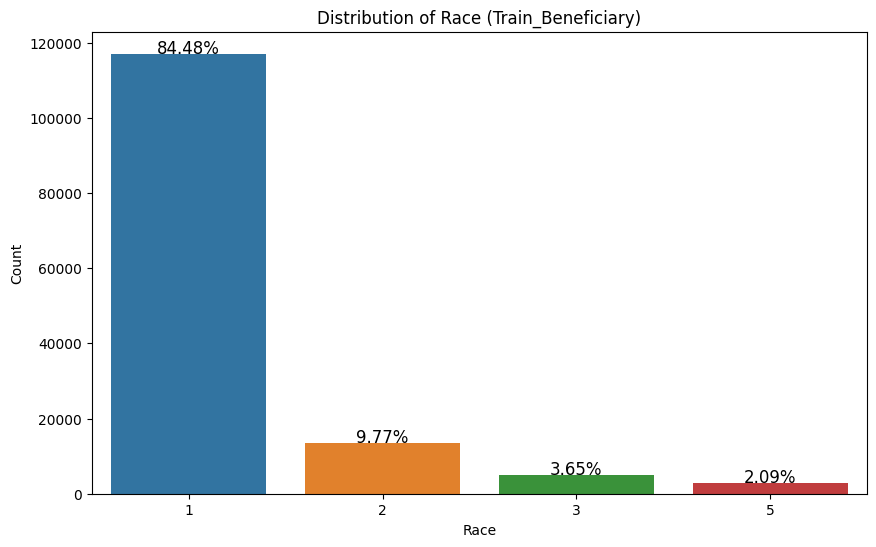

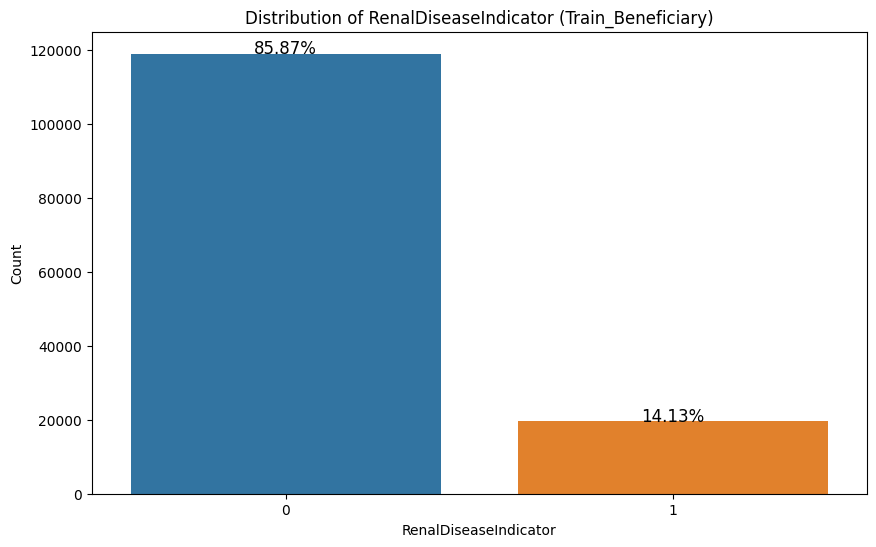

In [25]:
# Plot distribution for each numeric column
for column in numeric_columns_filt:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=Train_Beneficiary)
    plt.title(f'Distribution of {column} (Train_Beneficiary)')
    plt.xlabel(column)
    plt.ylabel('Count')
    percentage_without_hue(ax, Train_Beneficiary[column], 0, 40)
    plt.show()

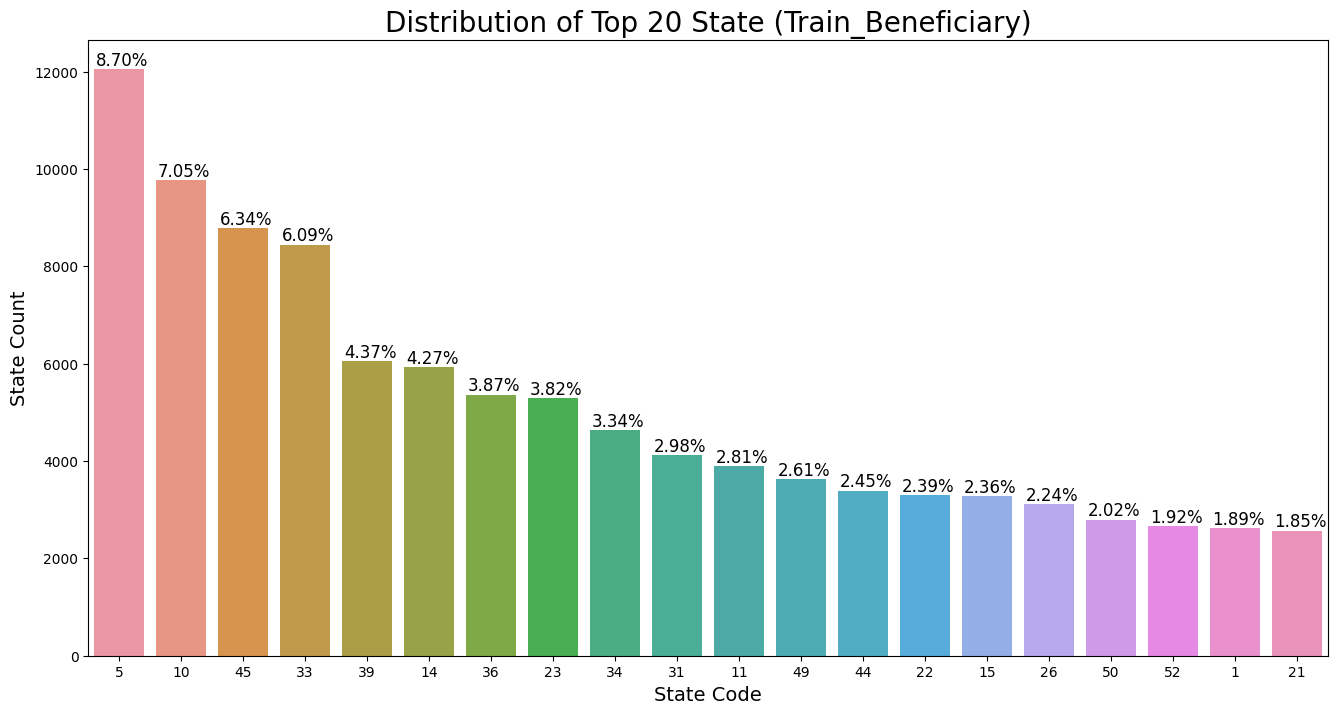

In [26]:
# Plot top 20 states from where the beneficiaries belong
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='State',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['State'].value_counts().head(20).index)
plt.title('Distribution of Top 20 State (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('State Code', size = 14)
plt.ylabel('State Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['State'], 0.05, 80,12)

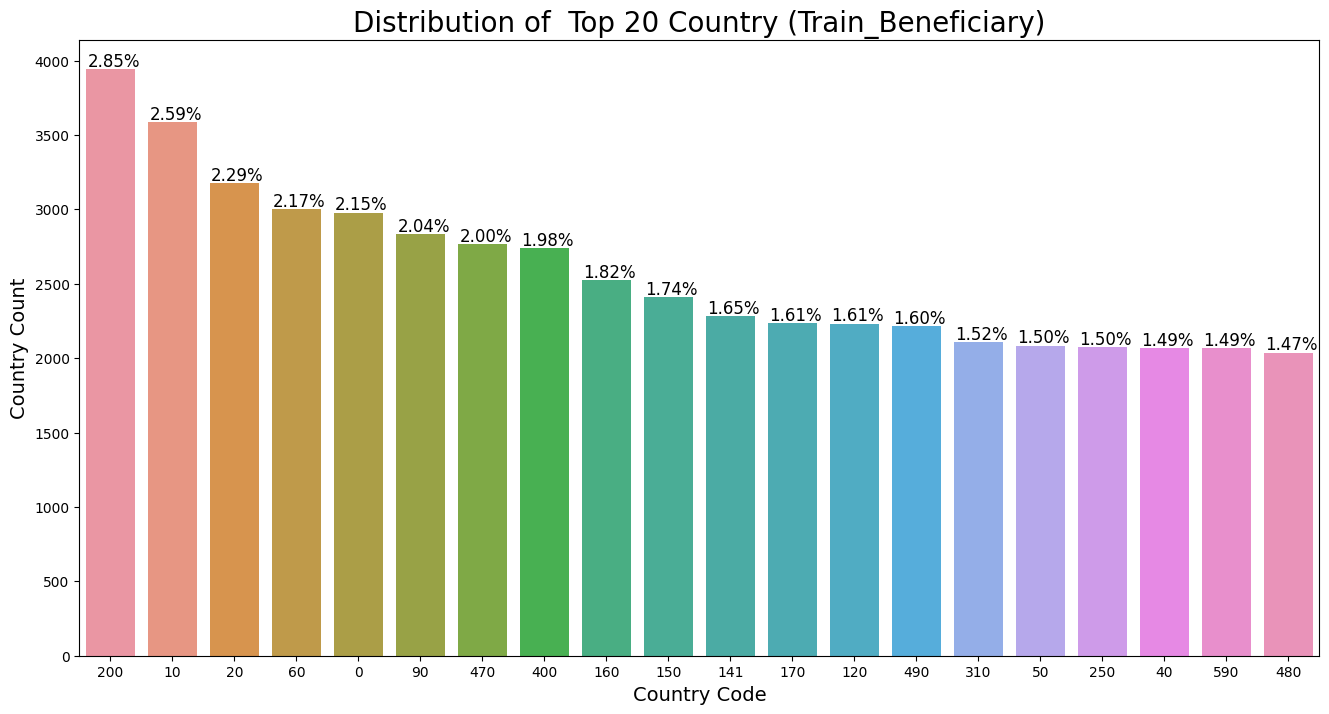

In [27]:
# Plot top 20 Country from where the beneficiaries belong
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='County',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['County'].value_counts().head(20).index)
plt.title('Distribution of  Top 20 Country (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Country Code', size = 14)
plt.ylabel('Country Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['County'], 0.05, 20,12)

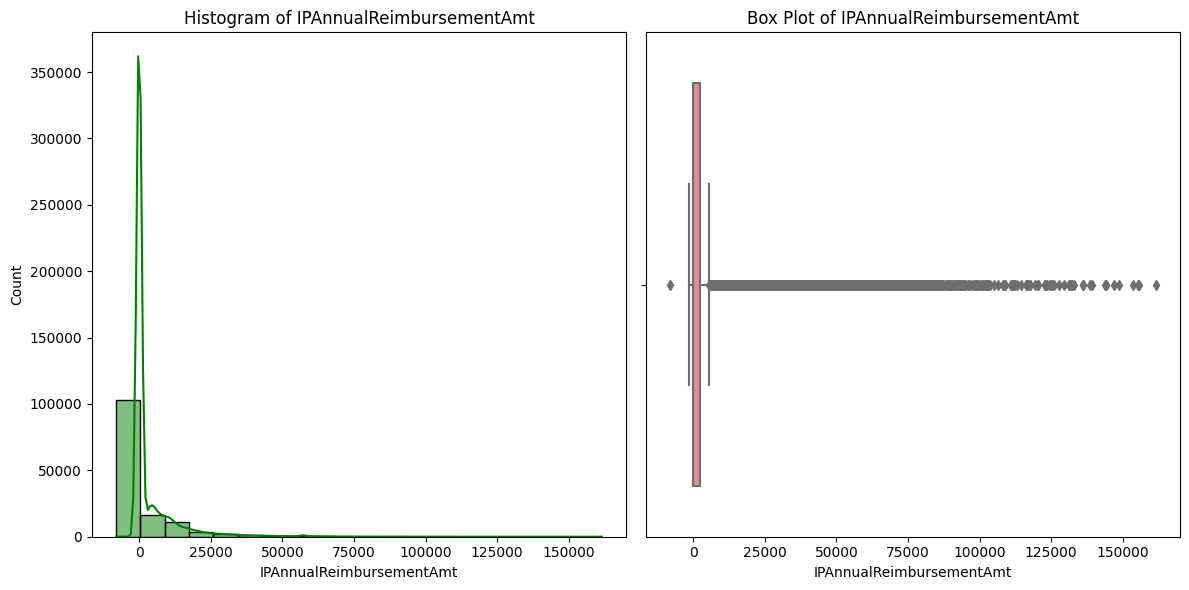

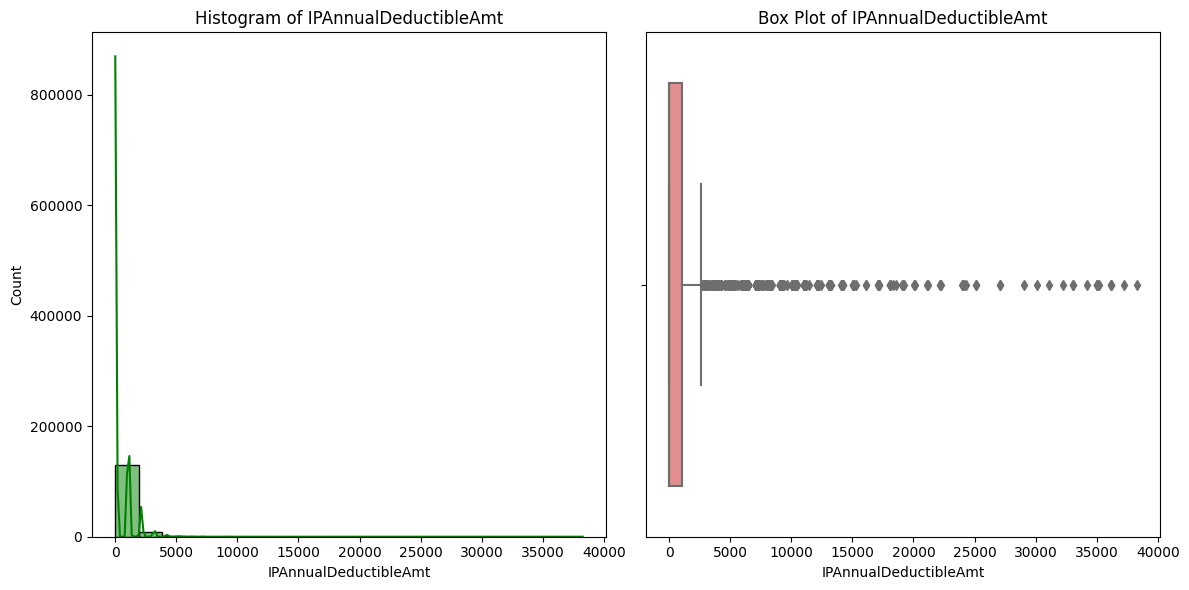

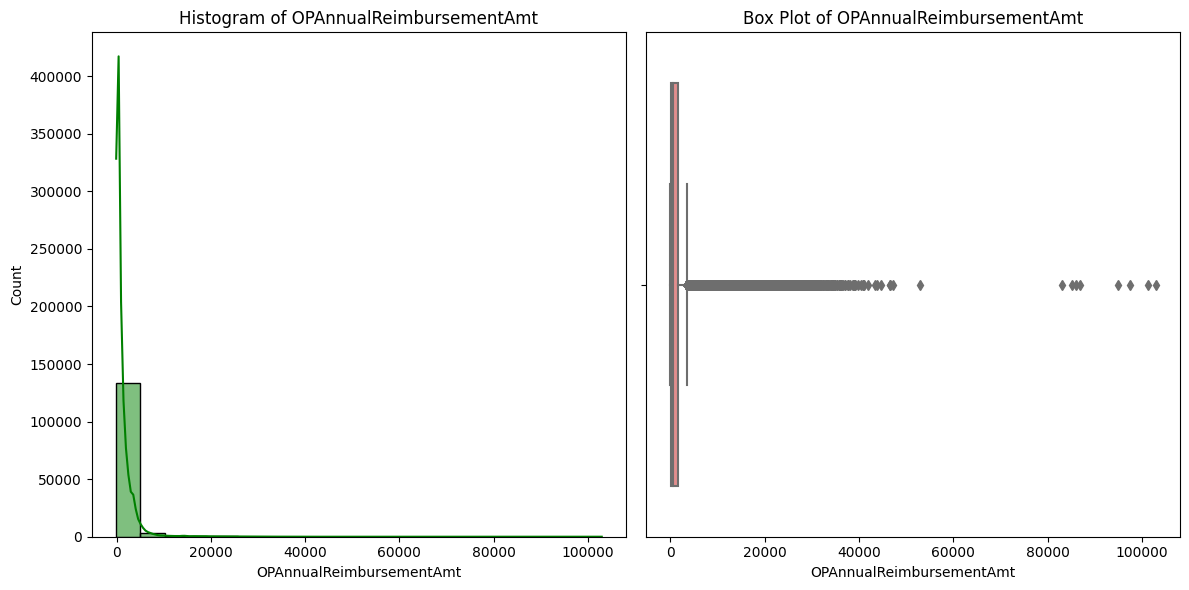

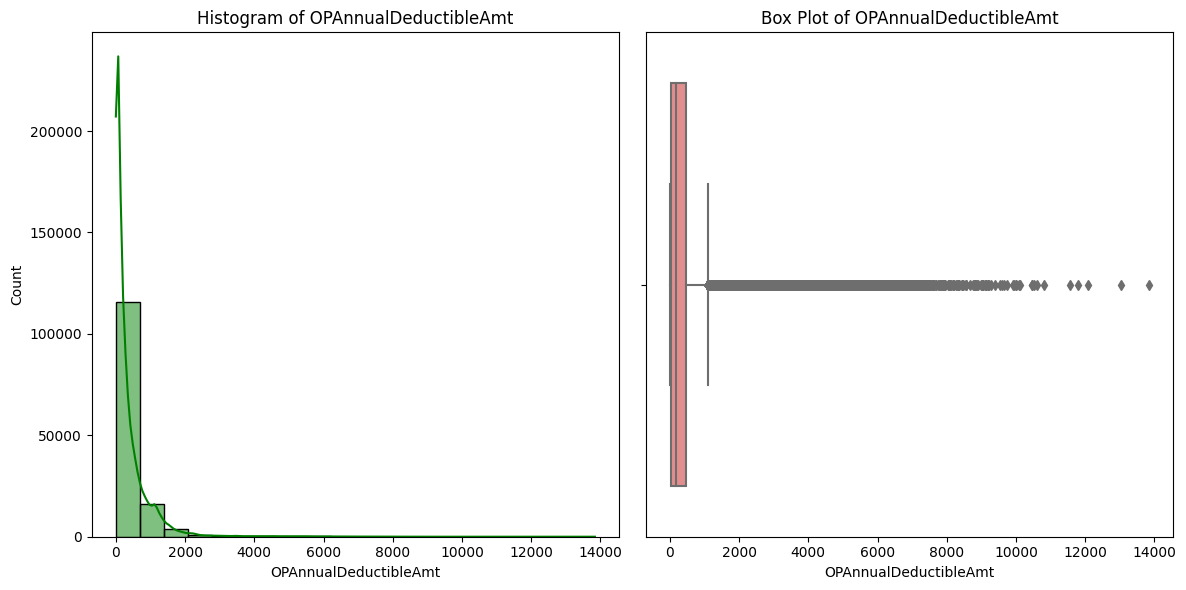

In [28]:
continuous_columns = ['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

# Plot histograms and box plots for each numeric column
for column in continuous_columns:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(Train_Beneficiary[column], bins=20, kde=True, color='green')
    plt.title(f'Histogram of {column}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=Train_Beneficiary[column], color='lightcoral')
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()

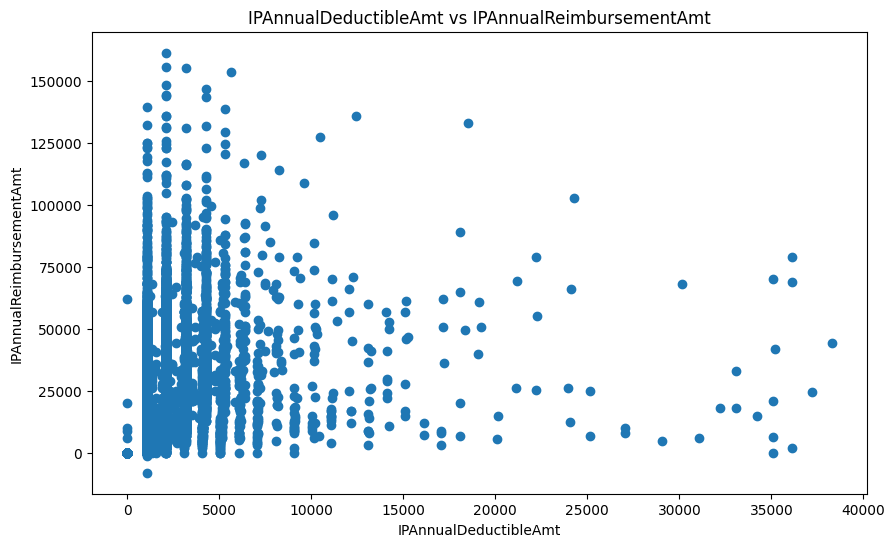

In [29]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(10, 6))
plt.scatter(Train_Beneficiary.IPAnnualDeductibleAmt, Train_Beneficiary.IPAnnualReimbursementAmt)
plt.xlabel('IPAnnualDeductibleAmt')
plt.ylabel('IPAnnualReimbursementAmt')
plt.title('IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt')
plt.show()

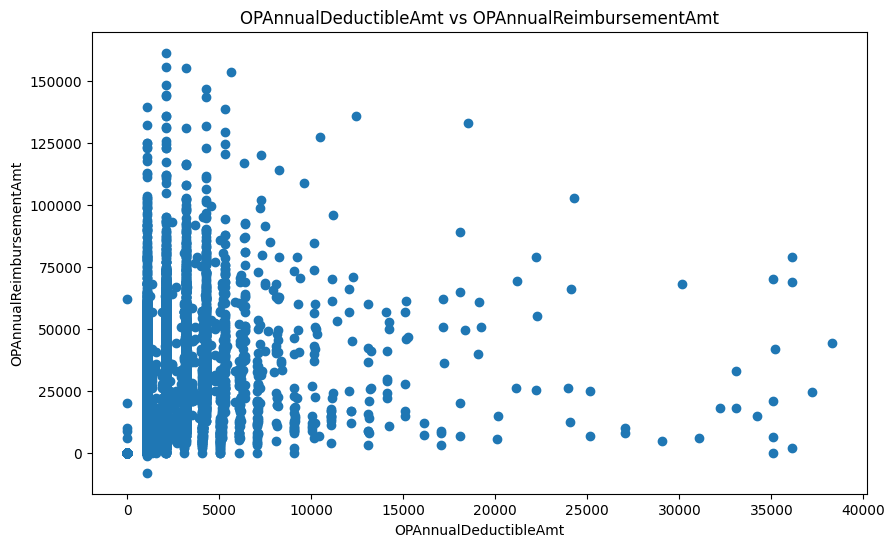

In [30]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(10, 6))
plt.scatter(Train_Beneficiary.IPAnnualDeductibleAmt, Train_Beneficiary.IPAnnualReimbursementAmt)
plt.xlabel('OPAnnualDeductibleAmt')
plt.ylabel('OPAnnualReimbursementAmt')
plt.title('OPAnnualDeductibleAmt vs OPAnnualReimbursementAmt')
plt.show()

In [31]:
# calculate patient risk score by summing up all the chronic conditions; The higher risk score indicates the health of the patient is not good
Train_Beneficiary['Patient_Risk_Score'] = Train_Beneficiary['ChronicCond_Alzheimer'] + Train_Beneficiary['ChronicCond_Heartfailure'] + \
                                        Train_Beneficiary['ChronicCond_KidneyDisease'] + Train_Beneficiary['ChronicCond_Cancer'] +\
                                        Train_Beneficiary['ChronicCond_ObstrPulmonary'] + Train_Beneficiary['ChronicCond_Depression'] +\
                                    Train_Beneficiary['ChronicCond_Diabetes'] + Train_Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Train_Beneficiary['ChronicCond_Osteoporasis'] + Train_Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Train_Beneficiary['ChronicCond_stroke'] + Train_Beneficiary['RenalDiseaseIndicator']

In [32]:
Train_Beneficiary['Patient_Risk_Score'].unique()

array([ 7,  0,  2,  6,  5,  1,  3,  9,  8,  4, 10, 11, 12])

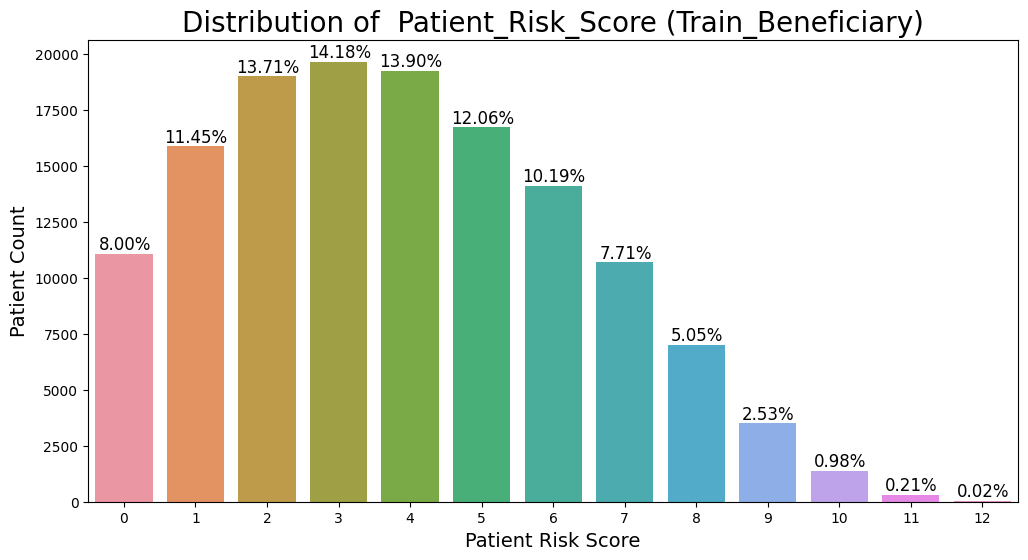

In [33]:
# Distribition of patient risk score
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Patient_Risk_Score',y=None, data=Train_Beneficiary, orient ="v")
plt.title('Distribution of  Patient_Risk_Score (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Patient Risk Score', size = 14)
plt.ylabel('Patient Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Patient_Risk_Score'], 0.01, 200,12)

In [34]:
# calculate patient risk score by summing up all risk scores
Test_Beneficiary['Patient_Risk_Score'] = Test_Beneficiary['ChronicCond_Alzheimer'] + Test_Beneficiary['ChronicCond_Heartfailure'] + \
                                        Test_Beneficiary['ChronicCond_KidneyDisease'] + Test_Beneficiary['ChronicCond_Cancer'] +\
                                        Test_Beneficiary['ChronicCond_ObstrPulmonary'] + Test_Beneficiary['ChronicCond_Depression'] +\
                                    Test_Beneficiary['ChronicCond_Diabetes'] + Test_Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Test_Beneficiary['ChronicCond_Osteoporasis'] + Test_Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Test_Beneficiary['ChronicCond_stroke'] + Test_Beneficiary['RenalDiseaseIndicator']


In [35]:
Train_Beneficiary[['DOB', 'DOD']].head()

DOB  DOD
0  1943-01-01  NaN
1  1936-09-01  NaN
2  1936-08-01  NaN
3  1922-07-01  NaN
4  1935-09-01  NaN

In [36]:
Train_Beneficiary[['DOB', 'DOD']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   DOB     138556 non-null  object
 1   DOD     1421 non-null    object
dtypes: object(2)
memory usage: 2.1+ MB


In [37]:
#Convert DOB and DOD to datetime format
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'], format = '%Y-%m-%d')
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'], format = '%Y-%m-%d')

Test_Beneficiary['DOB'] = pd.to_datetime(Test_Beneficiary['DOB'] , format = '%Y-%m-%d')
Test_Beneficiary['DOD'] = pd.to_datetime(Test_Beneficiary['DOD'],format = '%Y-%m-%d')

In [38]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

#Get the birth month and Birth year for DOB and DOD
Train_Beneficiary['Birth_Year'] = Train_Beneficiary['DOB'].dt.year
Train_Beneficiary['Birth_Month'] = Train_Beneficiary['DOB'].dt.month

Test_Beneficiary['Birth_Year'] = Test_Beneficiary['DOB'].dt.year
Test_Beneficiary['Birth_Month'] = Test_Beneficiary['DOB'].dt.month

In [39]:
# Check last date DOD
Train_Beneficiary['DOD'].max()

Timestamp('2009-12-01 00:00:00')

In [40]:
#Calculate the patient's age based on DOD
# https://stackoverflow.com/questions/46508895/calculating-age-from-date-time-format-in-python-pandas?noredirect=1&lq=1
Train_Beneficiary['Patient_Age'] = round(((Train_Beneficiary['DOD'] - Train_Beneficiary['DOB']).dt.days)/365)
Train_Beneficiary.Patient_Age.fillna(round(((Train_Beneficiary['DOD'].max()-Train_Beneficiary['DOB']).dt.days)/365),inplace=True)

Test_Beneficiary['Patient_Age'] = round(((Test_Beneficiary['DOD'] - Test_Beneficiary['DOB']).dt.days)/365)
Test_Beneficiary.Patient_Age.fillna(round(((Train_Beneficiary['DOD'].max()-Test_Beneficiary['DOB']).dt.days)/365),inplace=True)

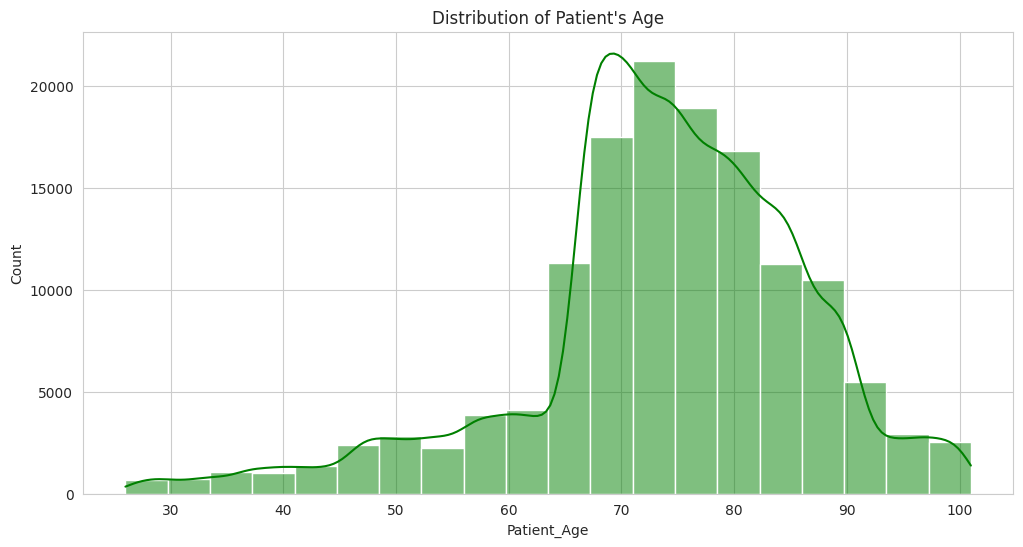

In [41]:
# Plot distribution of age
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.histplot(Train_Beneficiary['Patient_Age'], kde = True, color ='green', bins = 20)
plt.title("Distribution of Patient's Age")
plt.show()

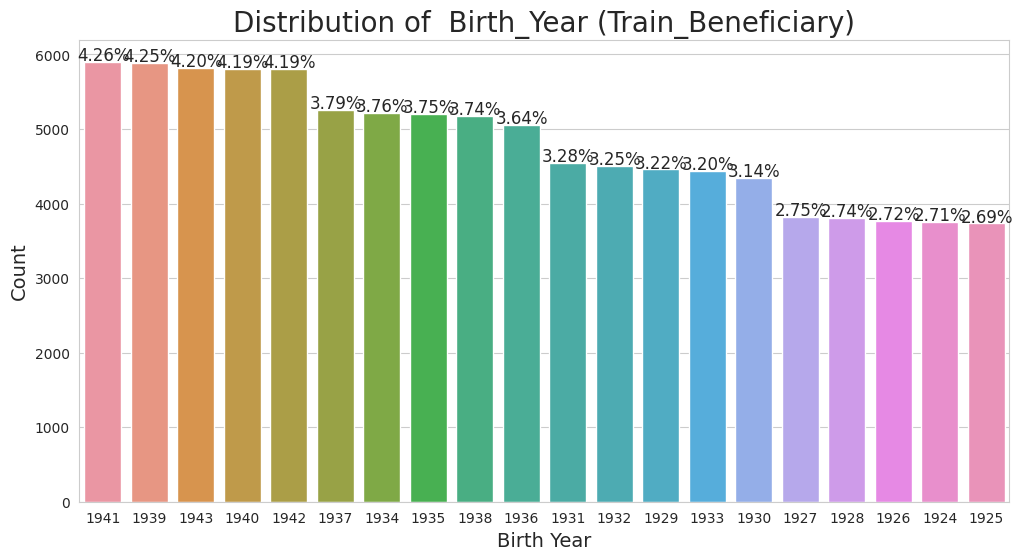

In [42]:
# Plot top 20 years in terms of patient's birth year count
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Birth_Year',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['Birth_Year'].value_counts().iloc[:20].index)
plt.title('Distribution of  Birth_Year (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Birth Year', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Birth_Year'], 0.01, 20,12)

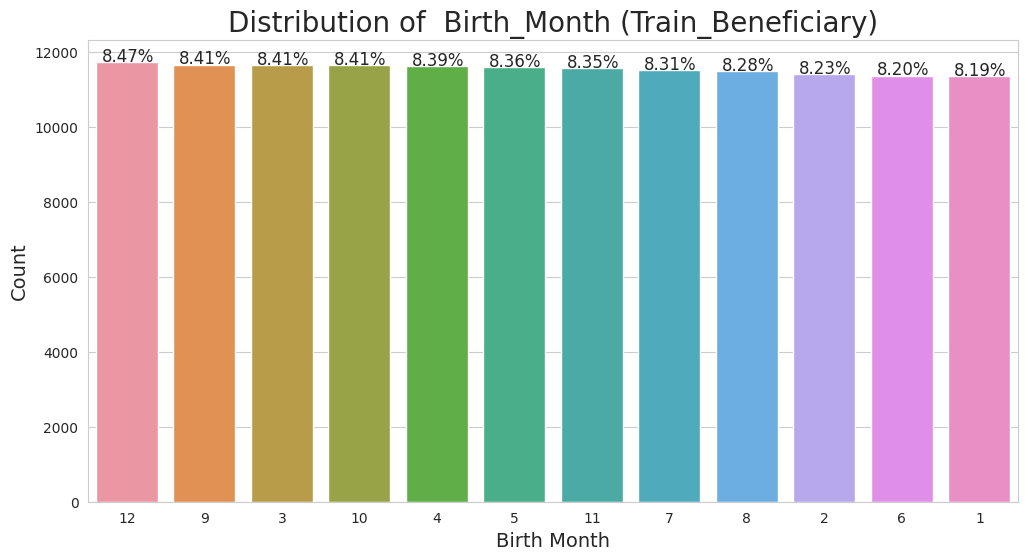

In [43]:
# Plot distribution of birth month of patients
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Birth_Month',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['Birth_Month'].value_counts().index)
plt.title('Distribution of  Birth_Month (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Birth Month', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Birth_Month'], 0.01, 20,12)

In [44]:
# Set value=1 if the patient is dead i.e DOD value is not null
Train_Beneficiary['isDead'] = 0
Train_Beneficiary.loc[Train_Beneficiary.DOD.notna(), 'isDead'] = 1

Test_Beneficiary['isDead'] = 0
Test_Beneficiary.loc[Test_Beneficiary.DOD.notna(), 'isDead'] = 1

##Train_Inpatient

In [45]:
print(Train_Inpatient.shape)
Train_Inpatient.head()

(40474, 30)


BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-04-12  ...               2724               19889   
1            NaN  2009-08-31  ...                NaN                 NaN   
2      PHY324689  2009-09-17  ...                NaN                 NaN   
3      PHY349768  2009-02-14  ...              25062               40390   
4            NaN  2009-08-13  ...               5119               29620   

  ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
0               5849                 NaN                NaN   
1                NaN                 NaN             7092.0   
2                NaN                 NaN                NaN   
3               4019                 NaN              331.0   
4              20300                 NaN             3893.0   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 30 columns]

In [46]:
Train_Inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [47]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Inpatient['ClaimStartDt'] = pd.to_datetime(Train_Inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Inpatient['ClaimEndDt'] = pd.to_datetime(Train_Inpatient['ClaimEndDt'],format = '%Y-%m-%d')

Test_Inpatient['ClaimStartDt'] = pd.to_datetime(Test_Inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Test_Inpatient['ClaimEndDt'] = pd.to_datetime(Test_Inpatient['ClaimEndDt'],format = '%Y-%m-%d')

# convert AdmissionDt, DischargeDt from string to datetime format
Train_Inpatient['AdmissionDt'] = pd.to_datetime(Train_Inpatient['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatient['DischargeDt'] = pd.to_datetime(Train_Inpatient['DischargeDt'],format = '%Y-%m-%d')

Test_Inpatient['AdmissionDt'] = pd.to_datetime(Test_Inpatient['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatient['DischargeDt'] = pd.to_datetime(Test_Inpatient['DischargeDt'],format = '%Y-%m-%d')

Train_Inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  datetime64[ns]
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  dateti

In [48]:
Train_Inpatient.describe()

InscClaimAmtReimbursed  DeductibleAmtPaid  ClmProcedureCode_1  \
count            40474.000000            39575.0        23148.000000   
mean             10087.884074             1068.0         5894.611759   
std              10303.099402                0.0         3049.304400   
min                  0.000000             1068.0           11.000000   
25%               4000.000000             1068.0         3848.000000   
50%               7000.000000             1068.0         5369.000000   
75%              12000.000000             1068.0         8666.250000   
max             125000.000000             1068.0         9999.000000   

       ClmProcedureCode_2  ClmProcedureCode_3  ClmProcedureCode_4  \
count         5454.000000          965.000000          116.000000   
mean          4103.738174         4226.355440         4070.172414   
std           2028.182156         2282.761581         1994.409802   
min             42.000000           42.000000           42.000000   
25%           2724.000000         2724.000000         2758.750000   
50%           4019.000000         4019.000000         4019.000000   
75%           4439.000000         5185.000000         4439.000000   
max           9999.000000         9999.000000         9986.000000   

       ClmProcedureCode_5  ClmProcedureCode_6  
count            9.000000                 0.0  
mean          5269.444444                 NaN  
std           2780.071632                 NaN  
min           2724.000000                 NaN  
25%           4139.000000                 NaN  
50%           4139.000000                 NaN  
75%           5185.000000                 NaN  
max           9982.000000                 NaN

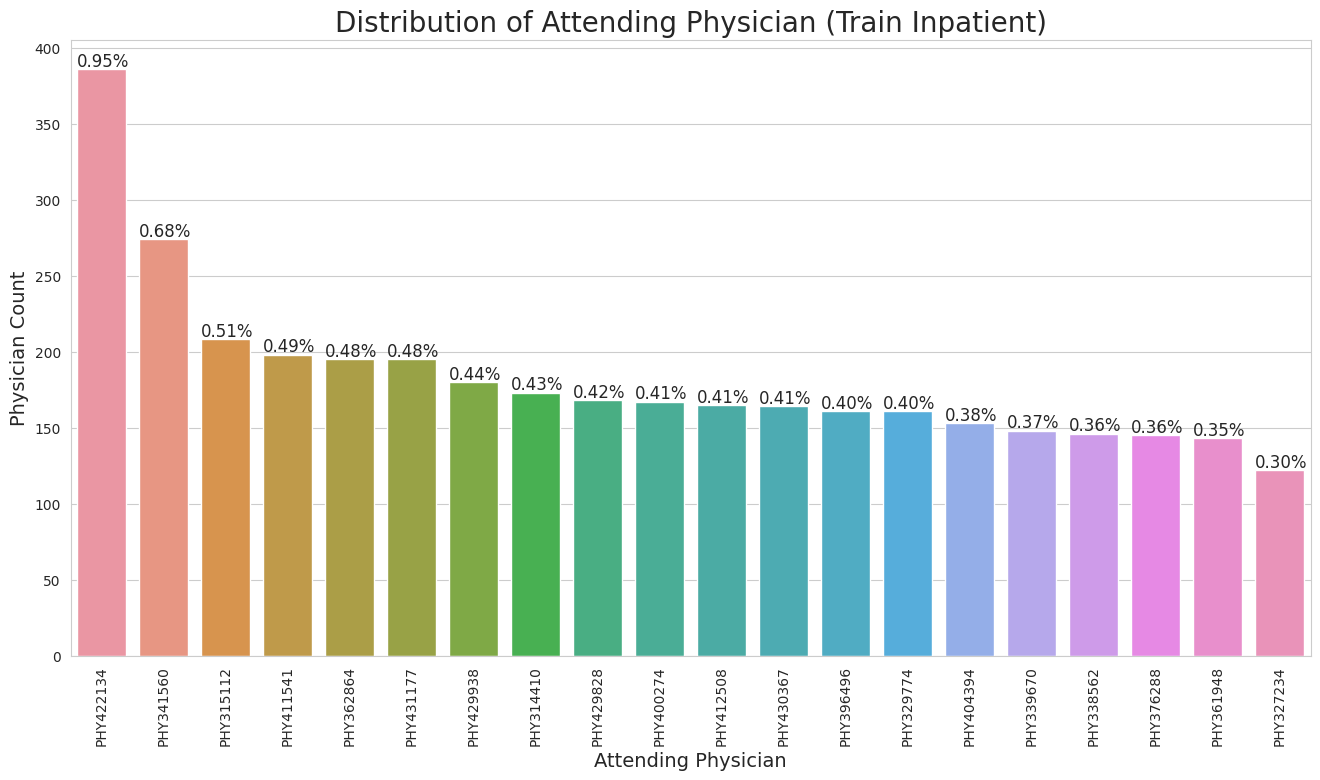

In [49]:
# Plot top 20 Attending Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x= 'AttendingPhysician',y= None, data= Train_Inpatient, orient ="v", order = Train_Inpatient['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of Attending Physician (Train Inpatient)', fontsize=20)
plt.xlabel('Attending Physician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks()
plt.xticks(rotation=90)
percentage_without_hue(ax, Train_Inpatient['AttendingPhysician'], 0.02, 2, 12)

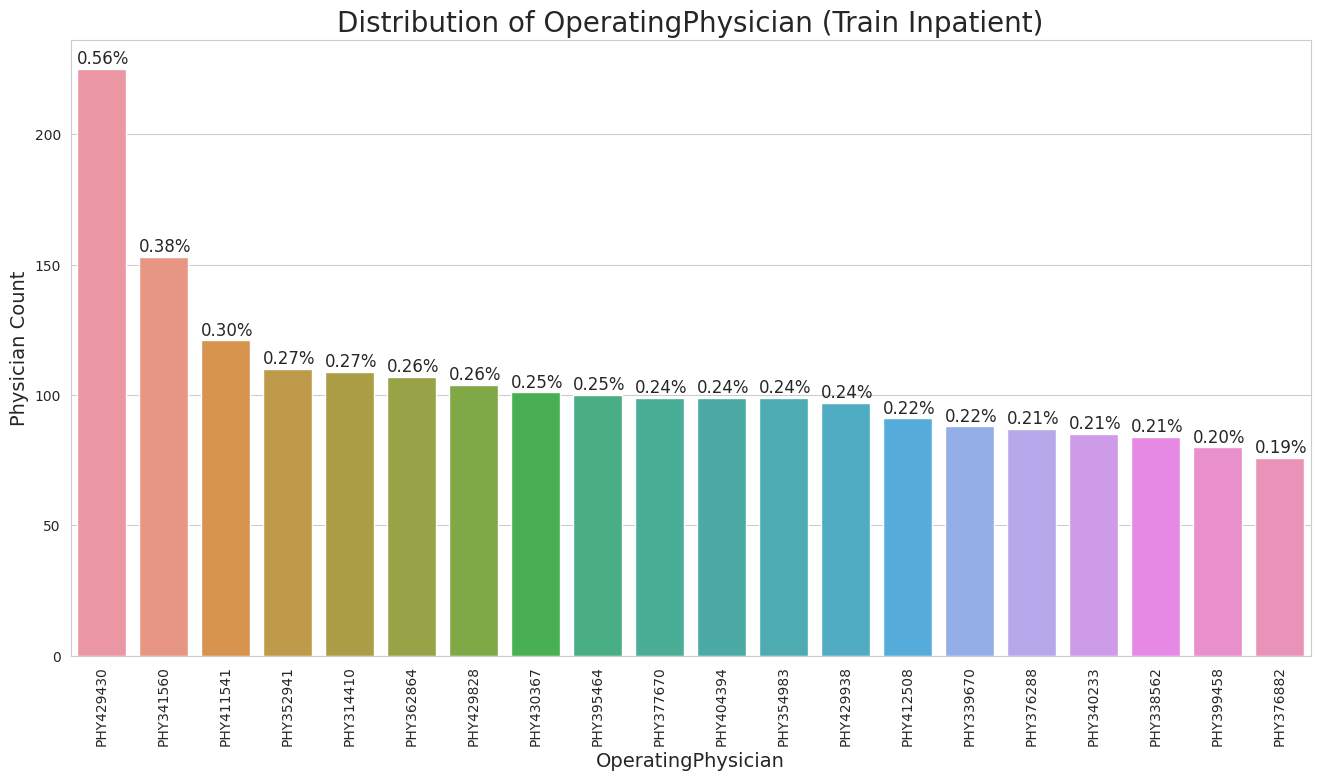

In [50]:
# Plot top 20 Operating Physician in terms of number of patients operated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OperatingPhysician',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of OperatingPhysician (Train Inpatient)', fontsize=20)
plt.xlabel('OperatingPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks()
plt.xticks(rotation=90)
percentage_without_hue(ax, Train_Inpatient['OperatingPhysician'], 0.02, 2, 12)

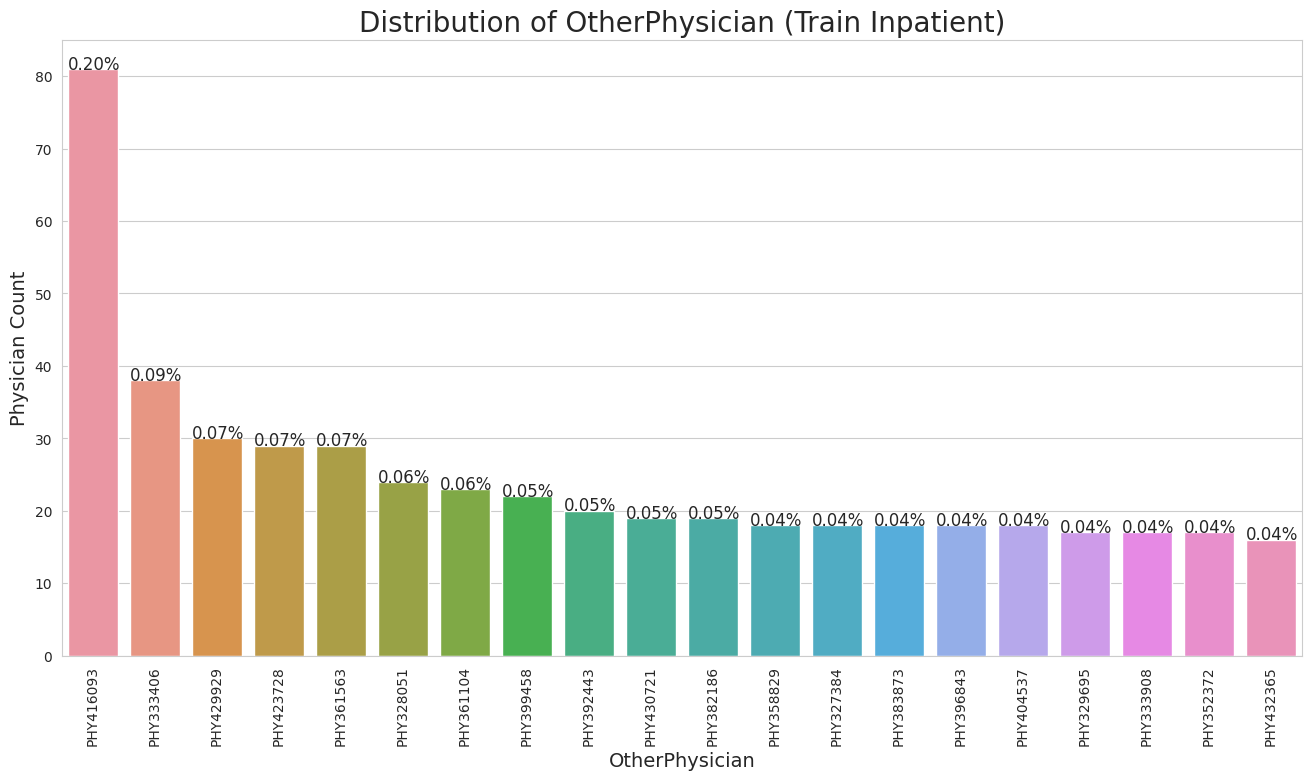

In [51]:
# Plot top 20 Other Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OtherPhysician',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['OtherPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of OtherPhysician (Train Inpatient)', fontsize=20)
plt.xlabel('OtherPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks()
plt.xticks(rotation=90)
percentage_without_hue(ax, Train_Inpatient['OtherPhysician'], 0.02, 0, 12)

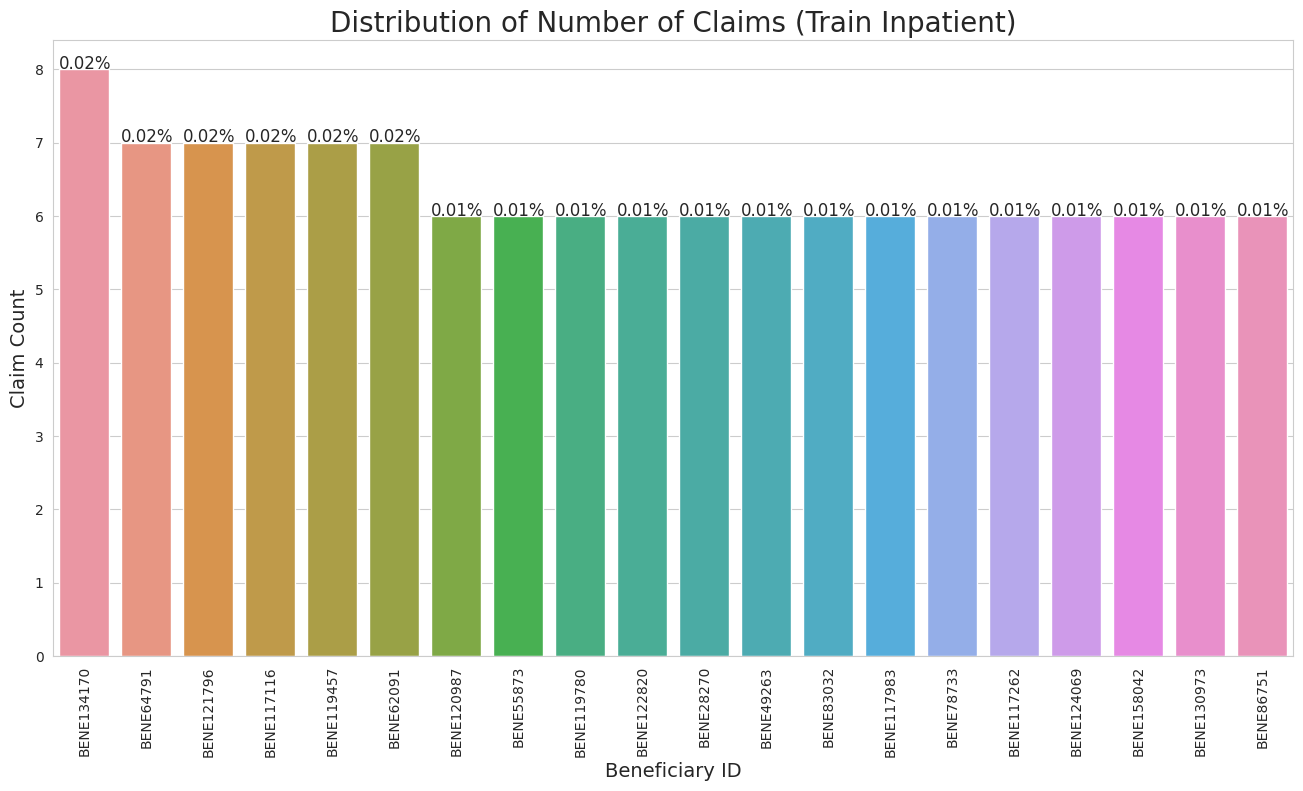

In [52]:
# Distribution of Number of Claims
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='BeneID',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['BeneID'].value_counts().head(20).index)
plt.title('Distribution of Number of Claims (Train Inpatient)', fontsize=20)
plt.xlabel('Beneficiary ID', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.yticks()
plt.xticks(rotation=90)
percentage_without_hue(ax, Train_Inpatient['BeneID'], 0.02, 0.01, 12)

In [53]:
# Calculate Hospitalization_Duration = DischargeDt - AdmissionDt
Train_Inpatient['Hospitalization_Duration'] = ((Train_Inpatient['DischargeDt'] - Train_Inpatient['AdmissionDt']).dt.days)+1
Test_Inpatient['Hospitalization_Duration'] = ((Test_Inpatient['DischargeDt'] - Test_Inpatient['AdmissionDt']).dt.days)+1

# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Inpatient['Claim_Period'] = ((Train_Inpatient['ClaimEndDt'] - Train_Inpatient['ClaimStartDt']).dt.days)+1
Test_Inpatient['Claim_Period'] = ((Test_Inpatient['ClaimEndDt'] - Test_Inpatient['ClaimStartDt']).dt.days)+1

In [54]:
Train_Inpatient[['Hospitalization_Duration', 'Claim_Period']].head()

Hospitalization_Duration  Claim_Period
0                         7             7
1                         3             3
2                         4             4
3                         9             9
4                        18            18

In [55]:
Train_Inpatient[Train_Inpatient['Claim_Period'] != Train_Inpatient['Hospitalization_Duration']].head()

BeneID   ClaimID ClaimStartDt ClaimEndDt  Provider  \
35    BENE11093  CLM82202   2009-01-03 2009-01-12  PRV51842   
2163  BENE18587  CLM37486   2009-02-10 2009-02-11  PRV52020   
3864  BENE24807  CLM82212   2008-12-31 2009-01-11  PRV54111   
4422  BENE26849  CLM70032   2009-10-02 2009-10-07  PRV56647   
5400  BENE30503  CLM67400   2009-09-12 2009-09-14  PRV54228   

      InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
35                     20000          PHY341192          PHY355416   
2163                    3000          PHY359519                NaN   
3864                   13000          PHY360669          PHY408812   
4422                   12000          PHY332134                NaN   
5400                    3000          PHY364179                NaN   

     OtherPhysician AdmissionDt  ... ClmDiagnosisCode_9  ClmDiagnosisCode_10  \
35              NaN  2009-01-03  ...                412                42732   
2163            NaN  2009-02-08  ...                NaN                  NaN   
3864            NaN  2008-12-31  ...              25000                  NaN   
4422            NaN  2009-09-29  ...              42833                  NaN   
5400            NaN  2009-09-09  ...               2724                  NaN   

     ClmProcedureCode_1 ClmProcedureCode_2 ClmProcedureCode_3  \
35               3950.0             2762.0                NaN   
2163                NaN                NaN                NaN   
3864             5369.0                NaN                NaN   
4422                NaN                NaN                NaN   
5400                NaN                NaN                NaN   

     ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
35                  NaN                NaN                NaN   
2163                NaN                NaN                NaN   
3864                NaN                NaN                NaN   
4422                NaN                NaN                NaN   
5400                NaN                NaN                NaN   

     Hospitalization_Duration Claim_Period  
35                          7           10  
2163                        4            2  
3864                       10           12  
4422                        9            6  
5400                        6            3  

[5 rows x 32 columns]

Observed difference in Hospitalization_Duration and Claim Period

*   When Hospitalization_Duration > Claim_Period, this can be due to inaccurate reporting
*   When Hospitalization_Duration < Claim_Period, this might occur as part of insurance fraud where patients or healthcare providers seek to gain financial benefits through deceptive practices.




In [56]:
#Calculate extra claim days
Train_Inpatient['ExtraClaimDays'] = np.where(Train_Inpatient['Claim_Period']>Train_Inpatient['Hospitalization_Duration'], Train_Inpatient['Claim_Period'] - Train_Inpatient['Hospitalization_Duration'], 0)

Test_Inpatient['ExtraClaimDays'] = np.where(Test_Inpatient['Claim_Period']>Test_Inpatient['Hospitalization_Duration'], Test_Inpatient['Claim_Period'] - Test_Inpatient['Hospitalization_Duration'], 0)


In [57]:
# Get the months and year of claim start and claim end
Train_Inpatient['ClaimStart_Year'] = Train_Inpatient['ClaimStartDt'].dt.year
Train_Inpatient['ClaimStart_Month'] = Train_Inpatient['ClaimStartDt'].dt.month
Train_Inpatient['ClaimEnd_Year'] = Train_Inpatient['ClaimEndDt'].dt.year
Train_Inpatient['ClaimEnd_Month'] = Train_Inpatient['ClaimEndDt'].dt.month

Test_Inpatient['ClaimStart_Year'] = Test_Inpatient['ClaimStartDt'].dt.year
Test_Inpatient['ClaimStart_Month'] = Test_Inpatient['ClaimStartDt'].dt.month
Test_Inpatient['ClaimEnd_Year'] = Test_Inpatient['ClaimEndDt'].dt.year
Test_Inpatient['ClaimEnd_Month'] = Test_Inpatient['ClaimEndDt'].dt.month

In [58]:
# Get the month and year of Admission_Year and Admission_Month
Train_Inpatient['Admission_Year'] = Train_Inpatient['AdmissionDt'].dt.year
Train_Inpatient['Admission_Month'] = Train_Inpatient['AdmissionDt'].dt.month
Train_Inpatient['Discharge_Year'] = Train_Inpatient['DischargeDt'].dt.year
Train_Inpatient['Discharge_Month'] = Train_Inpatient['DischargeDt'].dt.month

Test_Inpatient['Admission_Year'] = Test_Inpatient['AdmissionDt'].dt.year
Test_Inpatient['Admission_Month'] = Test_Inpatient['AdmissionDt'].dt.month
Test_Inpatient['Discharge_Year'] = Test_Inpatient['DischargeDt'].dt.year
Test_Inpatient['Discharge_Month'] = Test_Inpatient['DischargeDt'].dt.month

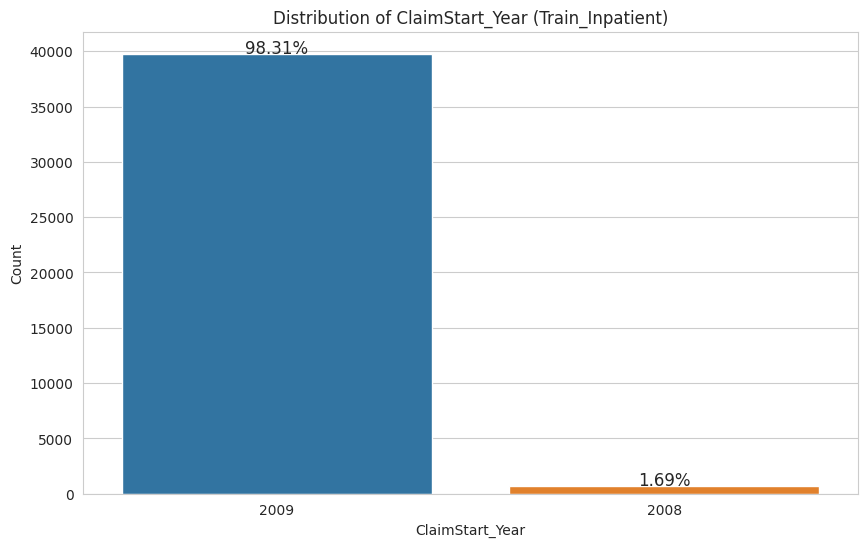

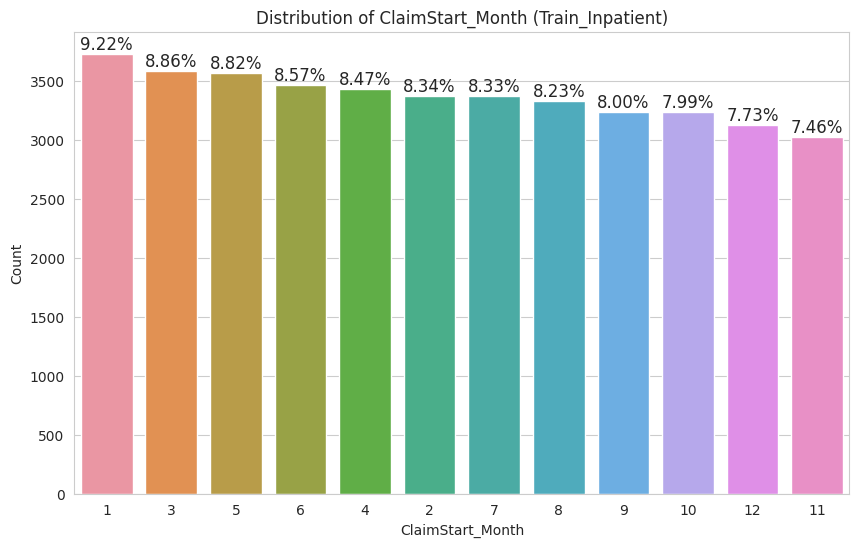

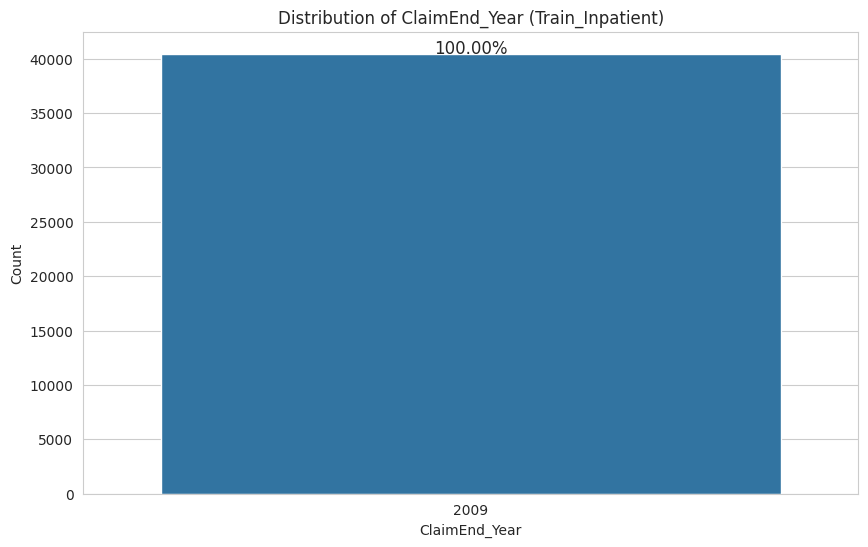

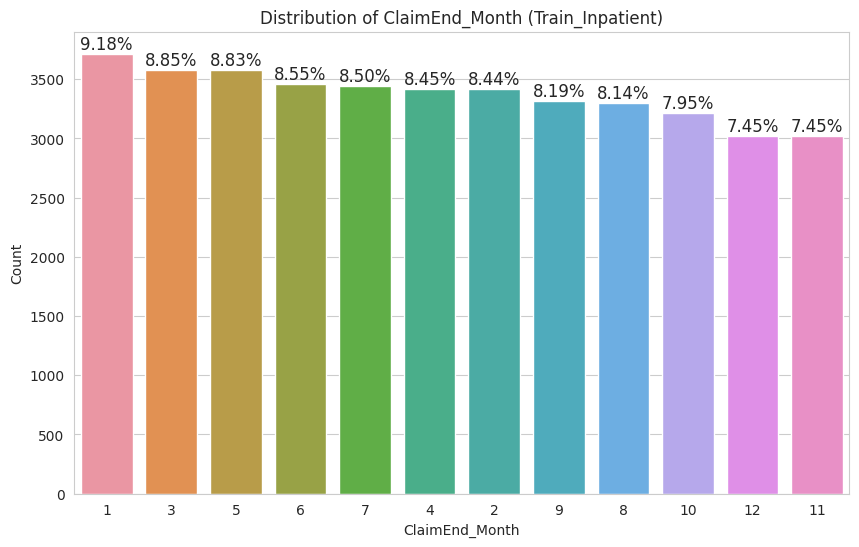

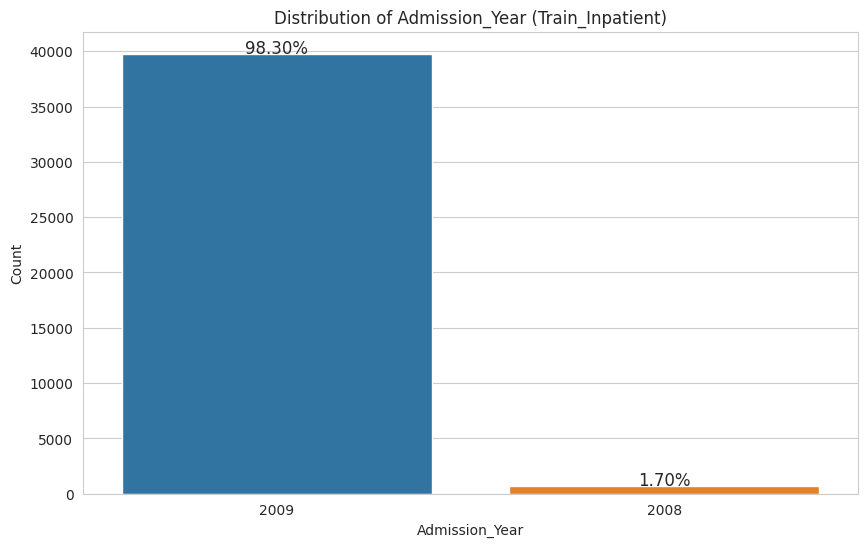

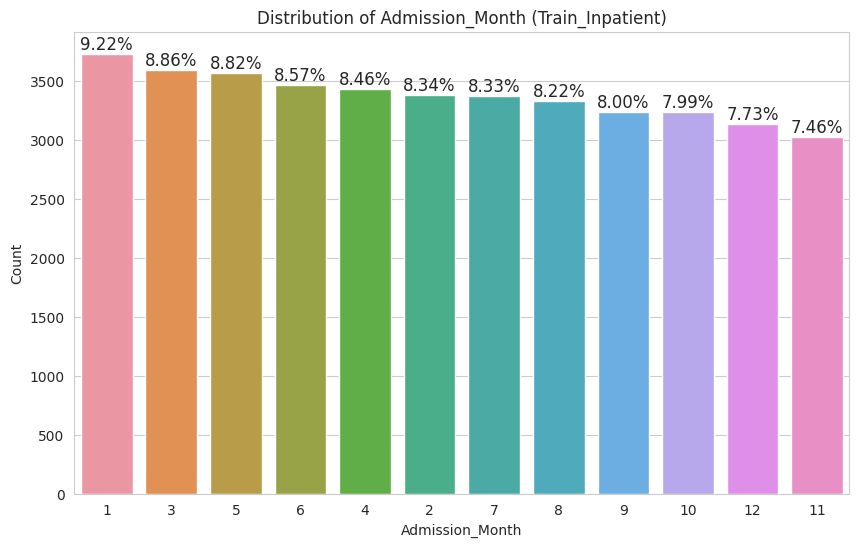

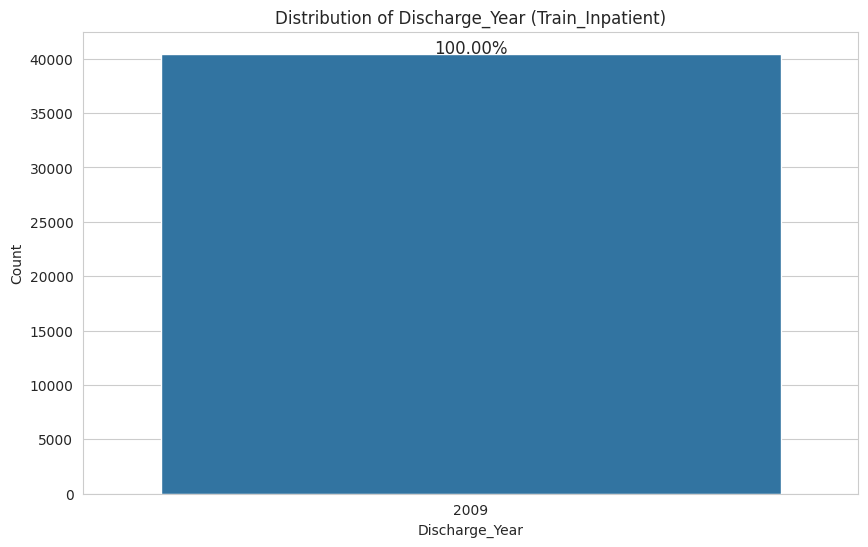

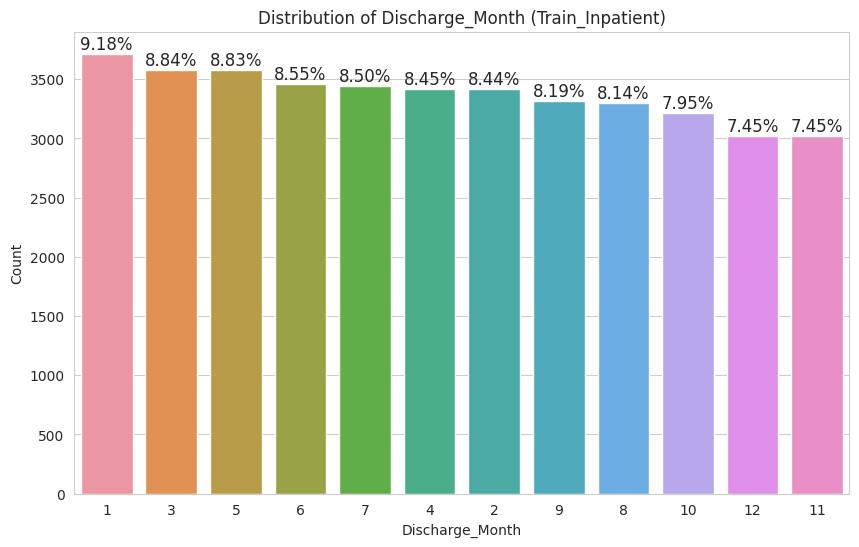

In [59]:
# Plot distribution for each numeric column

columns = ['ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month', 'Discharge_Year', 'Discharge_Month']

for column in columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=Train_Inpatient, order = Train_Inpatient[column].value_counts().index)
    plt.title(f'Distribution of {column} (Train_Inpatient)')
    plt.xlabel(column)
    plt.ylabel('Count')
    percentage_without_hue(ax, Train_Inpatient[column], 0, 40)
    plt.show()

In [60]:
# Concat all the claim precedurecodes
ClmProcedureCode_IP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df['ProcedureCode'] = pd.concat([Train_Inpatient["ClmProcedureCode_1"],
                                   Train_Inpatient["ClmProcedureCode_2"],
                                   Train_Inpatient["ClmProcedureCode_3"],
                                   Train_Inpatient["ClmProcedureCode_4"],
                                   Train_Inpatient["ClmProcedureCode_5"],
                                   Train_Inpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

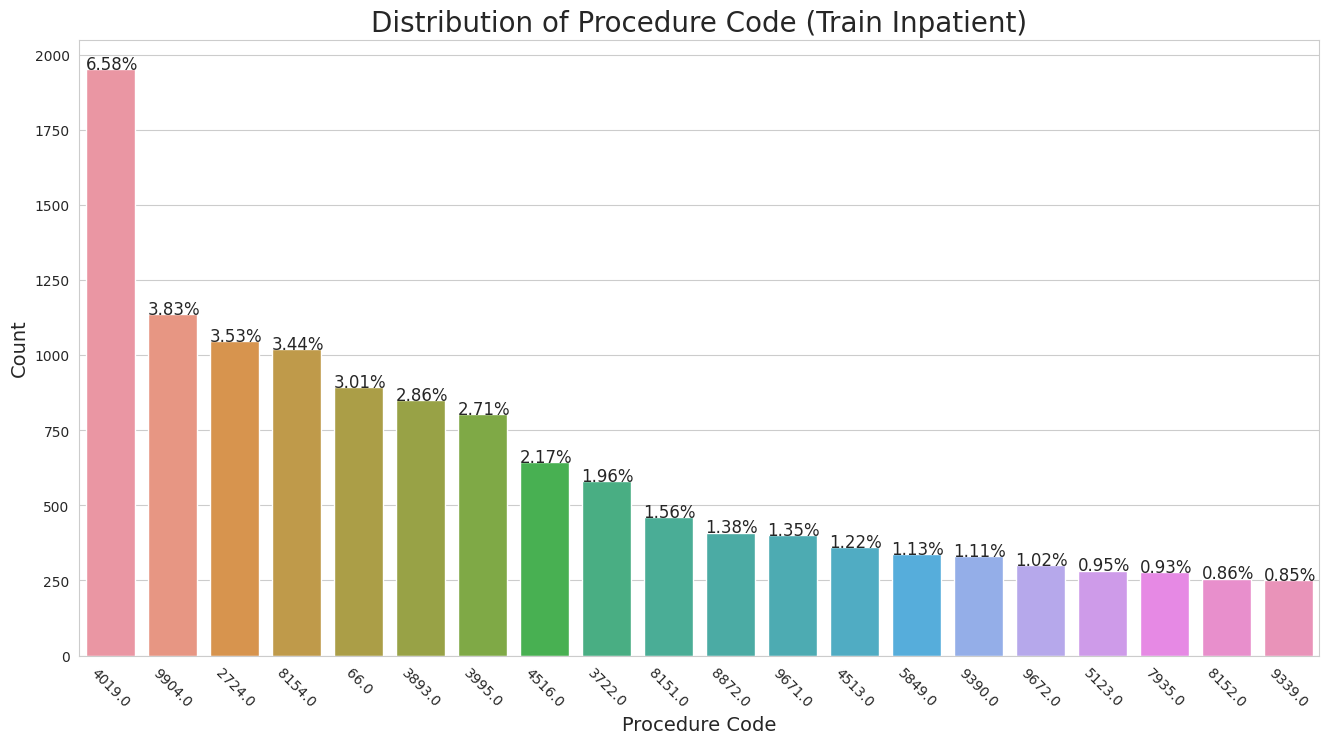

In [61]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_IP_df, orient ="v", order = ClmProcedureCode_IP_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code (Train Inpatient)', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_IP_df['ProcedureCode'], 0.02, 0.01, 12)

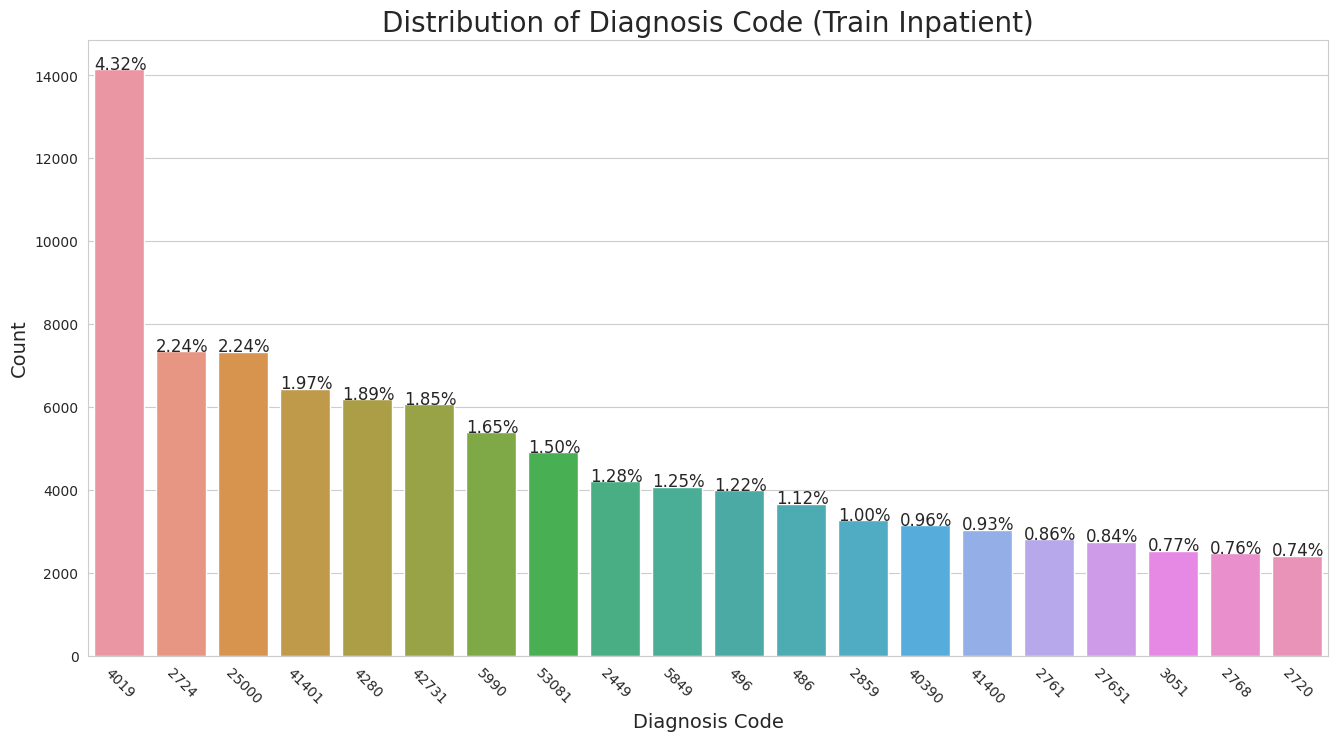

In [62]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_IP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_IP_df['DiagnosisCode'] = pd.concat([Train_Inpatient["ClmDiagnosisCode_1"],
                                           Train_Inpatient["ClmDiagnosisCode_2"],
                                           Train_Inpatient["ClmDiagnosisCode_3"],
                                           Train_Inpatient["ClmDiagnosisCode_4"],
                                           Train_Inpatient["ClmDiagnosisCode_5"],
                                           Train_Inpatient["ClmDiagnosisCode_6"],
                                           Train_Inpatient["ClmDiagnosisCode_7"],
                                           Train_Inpatient["ClmDiagnosisCode_8"],
                                           Train_Inpatient["ClmDiagnosisCode_9"],
                                           Train_Inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_IP_df, orient ="v", order = ClmDiagnosisCode_IP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code (Train Inpatient)', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_IP_df['DiagnosisCode'], 0.02, 0.01, 12)

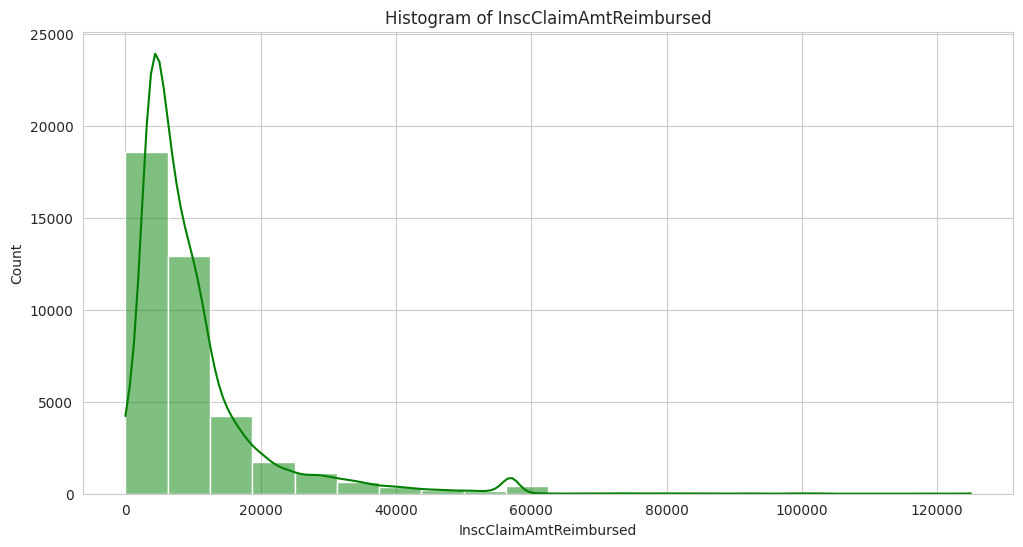

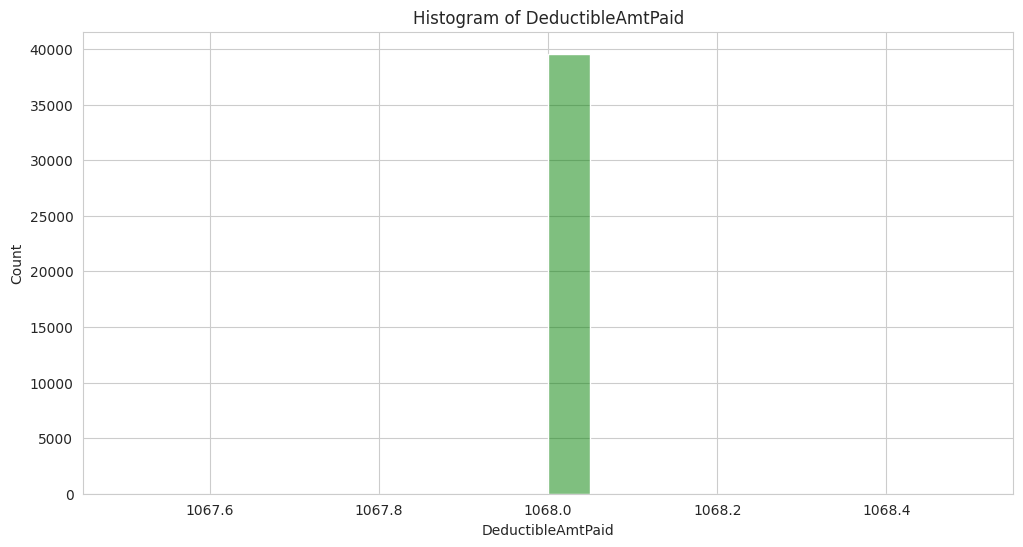

In [63]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid']

# Plot histograms and box plots for each numeric column
for column in columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(Train_Inpatient[column].dropna(), bins=20, kde=True, color='green')
    plt.title(f'Histogram of {column}')
    plt.show()

##Train_Outpatient

In [64]:
print(Train_Outpatient.shape)
Train_Outpatient.head()

(517737, 27)


BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmDiagnosisCode_9  \
0            NaN              78943  ...                NaN   
1            NaN               6115  ...                NaN   
2            NaN               2723  ...                NaN   
3            NaN              71988  ...                NaN   
4            NaN              82382  ...                NaN   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                 NaN                NaN                NaN   
1                 NaN                NaN                NaN   
2                 NaN                NaN                NaN   
3                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   

  ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  DeductibleAmtPaid  ClmAdmitDiagnosisCode  
0                 0                  56409  
1                 0                  79380  
2                 0                    NaN  
3                 0                    NaN  
4                 0                  71947  

[5 rows x 27 columns]

In [65]:
Train_Outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

<function matplotlib.pyplot.show(close=None, block=None)>

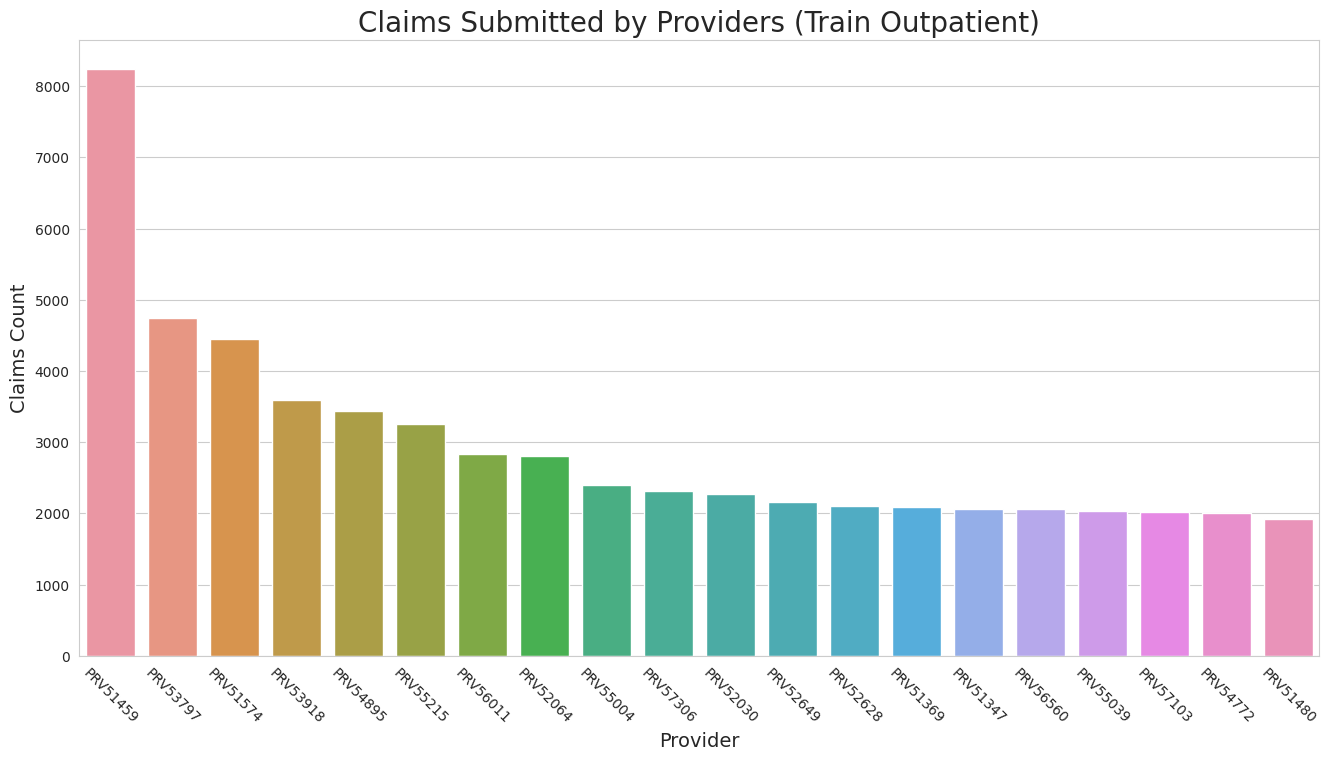

In [66]:
# Top 20 attending physician in terms of patient count
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Provider',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['Provider'].value_counts().iloc[:20].index)
plt.title('Claims Submitted by Providers (Train Outpatient)', fontsize=20)
plt.xlabel('Provider', size = 14)
plt.ylabel('Claims Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show

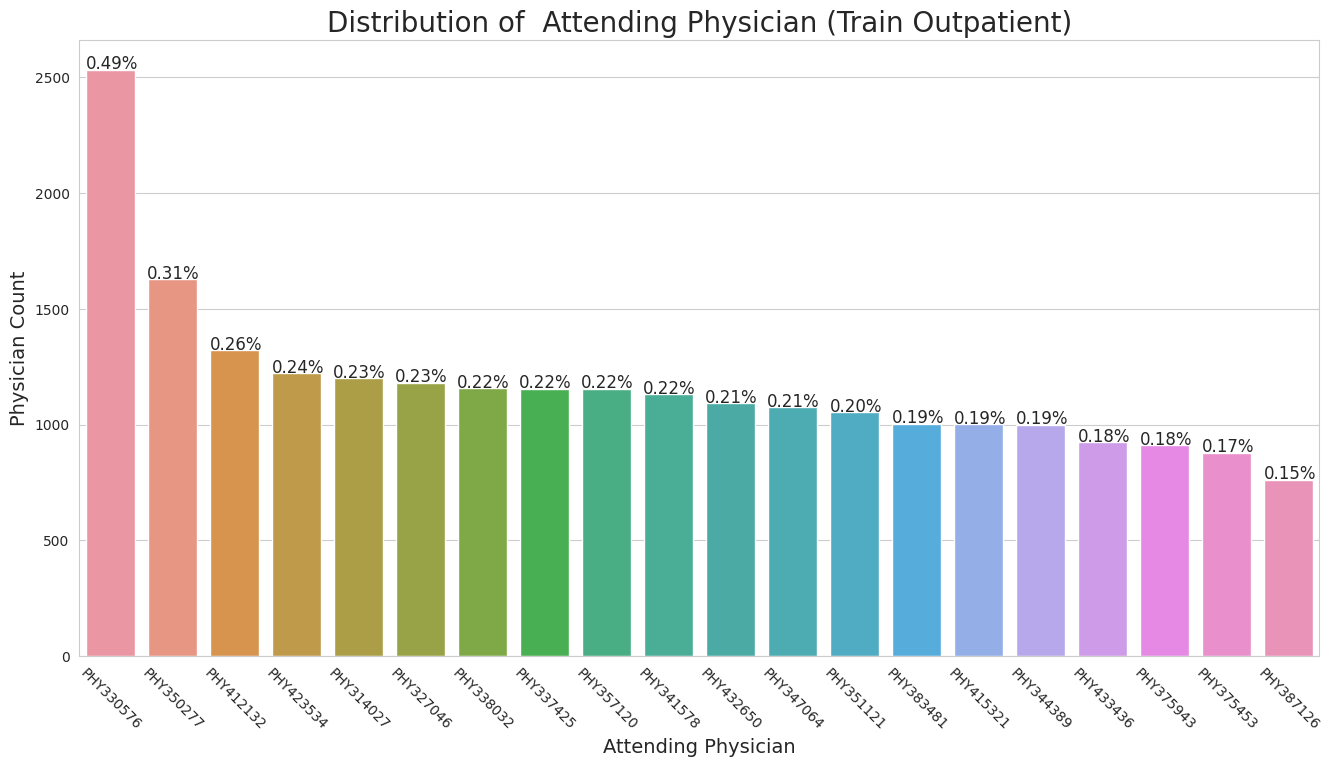

In [67]:
# Top 20 attending physician in terms of patient count
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AttendingPhysician',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  Attending Physician (Train Outpatient)', fontsize=20)
plt.xlabel('Attending Physician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Outpatient['AttendingPhysician'], 0.02, 2, 12)

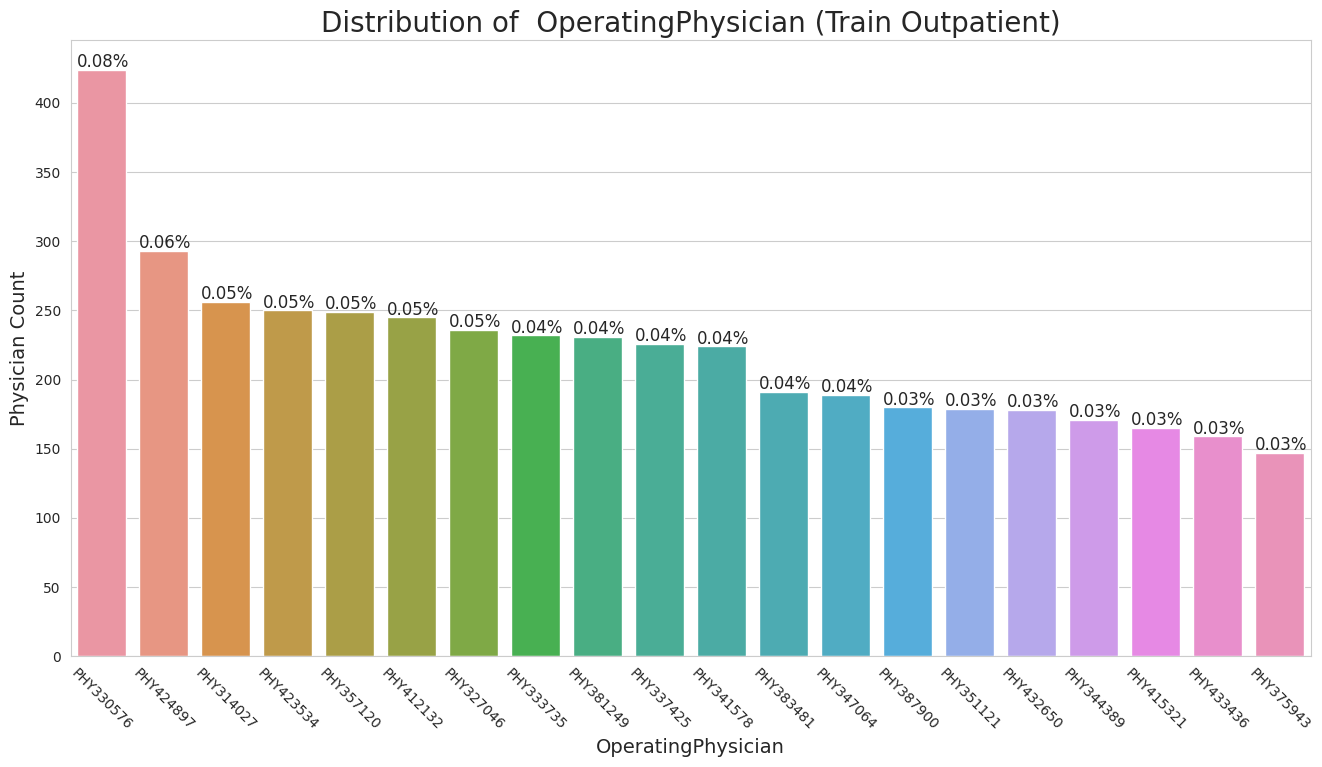

In [68]:
# Plot top 20 Operating Physician in terms of number of patients operated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OperatingPhysician',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OperatingPhysician (Train Outpatient)', fontsize=20)
plt.xlabel('OperatingPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Outpatient['OperatingPhysician'], 0.02, 2, 12)

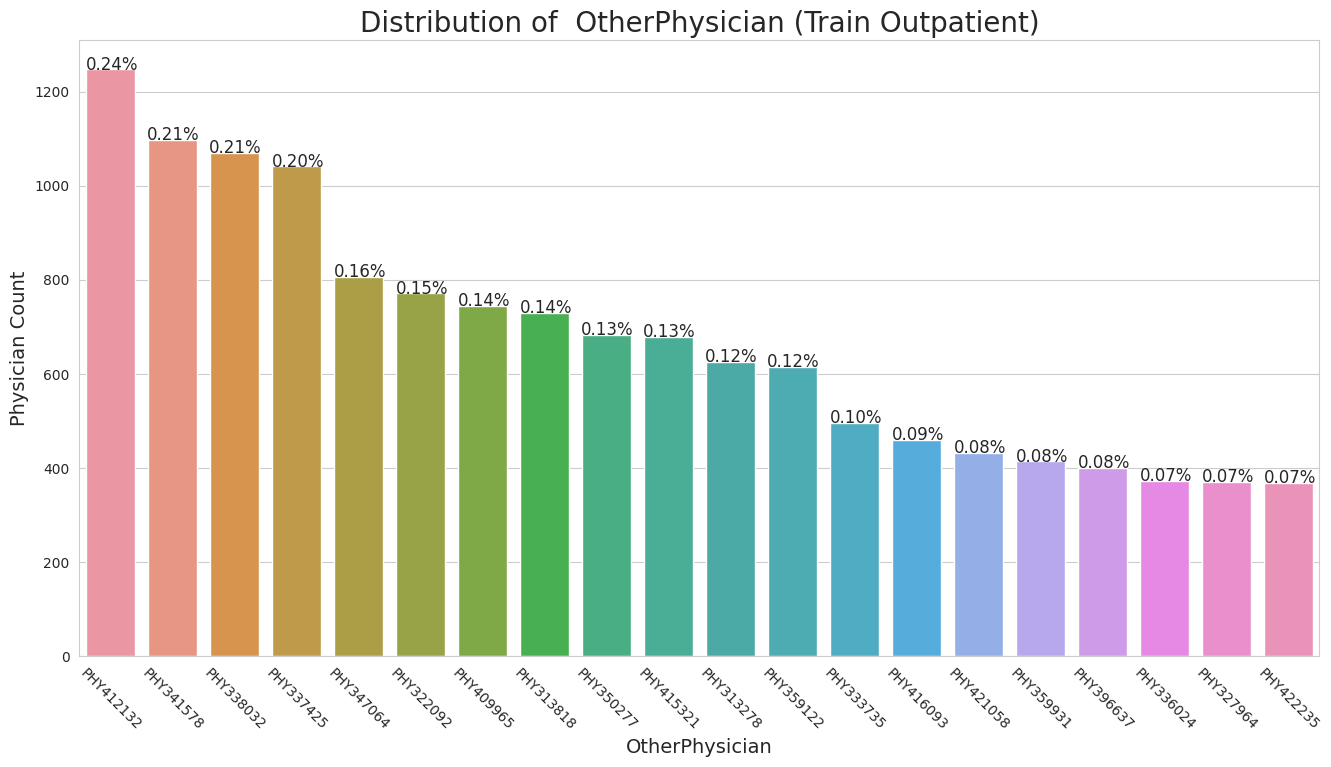

In [69]:
# Plot top 20 Other Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OtherPhysician',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['OtherPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OtherPhysician (Train Outpatient)', fontsize=20)
plt.xlabel('OtherPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Outpatient['OtherPhysician'], 0.02, 0, 12)

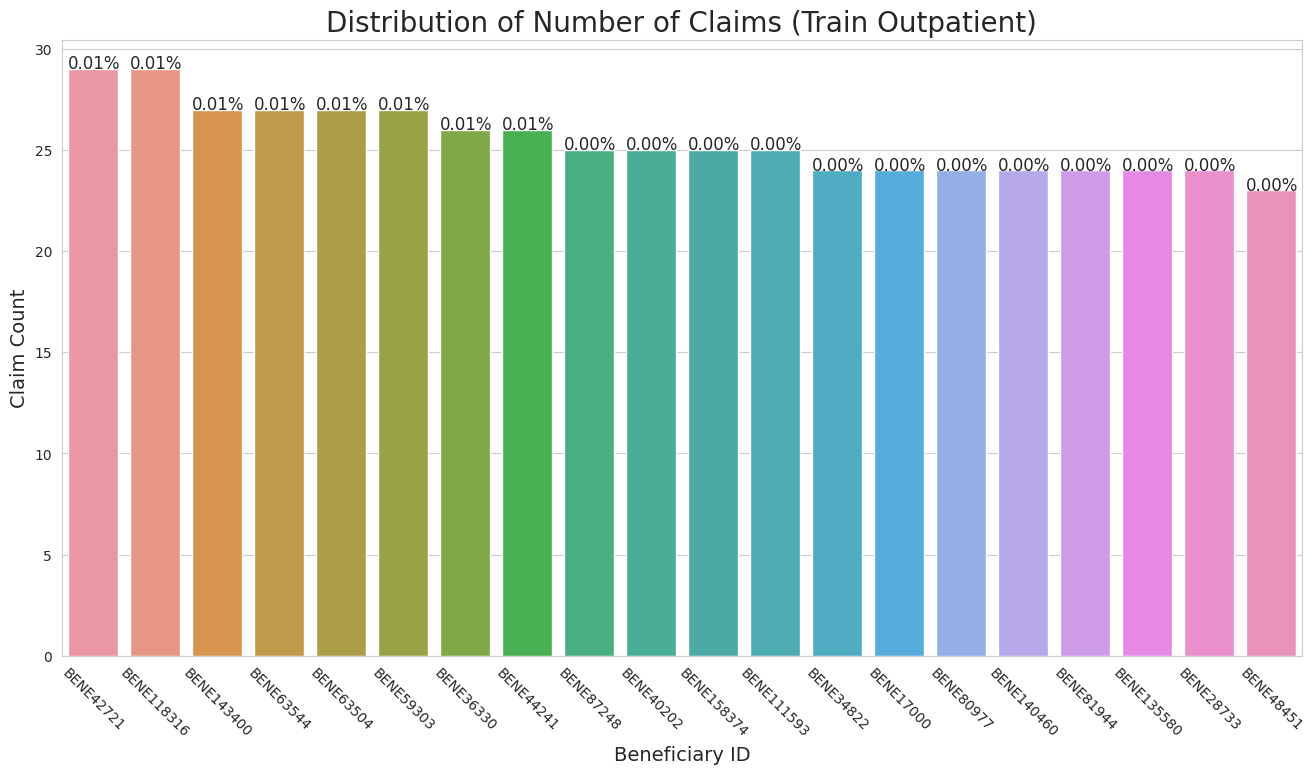

In [70]:
# Distribution of Number of Claims
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='BeneID',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['BeneID'].value_counts().head(20).index)
plt.title('Distribution of Number of Claims (Train Outpatient)', fontsize=20)
plt.xlabel('Beneficiary ID', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Outpatient['BeneID'], 0.02, 0.01, 12)

In [71]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Outpatient['ClaimStartDt'] = pd.to_datetime(Train_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Outpatient['ClaimEndDt'] = pd.to_datetime(Train_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')

Test_Outpatient['ClaimStartDt'] = pd.to_datetime(Test_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Test_Outpatient['ClaimEndDt'] = pd.to_datetime(Test_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Get the months and year of claim start and claim end
Train_Outpatient['ClaimStart_Year'] = Train_Outpatient['ClaimStartDt'].dt.year
Train_Outpatient['ClaimStart_Month'] = Train_Outpatient['ClaimStartDt'].dt.month
Test_Outpatient['ClaimStart_Year'] = Test_Outpatient['ClaimStartDt'].dt.year
Test_Outpatient['ClaimStart_Month'] = Test_Outpatient['ClaimStartDt'].dt.month

Train_Outpatient['ClaimEnd_Year'] = Train_Outpatient['ClaimEndDt'].dt.year
Train_Outpatient['ClaimEnd_Month'] = Train_Outpatient['ClaimEndDt'].dt.month
Test_Outpatient['ClaimEnd_Year'] = Test_Outpatient['ClaimEndDt'].dt.year
Test_Outpatient['ClaimEnd_Month'] = Test_Outpatient['ClaimEndDt'].dt.month
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Outpatient['Claim_Period'] = ((Train_Outpatient['ClaimEndDt'] - Train_Outpatient['ClaimStartDt']).dt.days)+1

Test_Outpatient['Claim_Period'] = ((Test_Outpatient['ClaimEndDt'] - Test_Outpatient['ClaimStartDt']).dt.days)+1


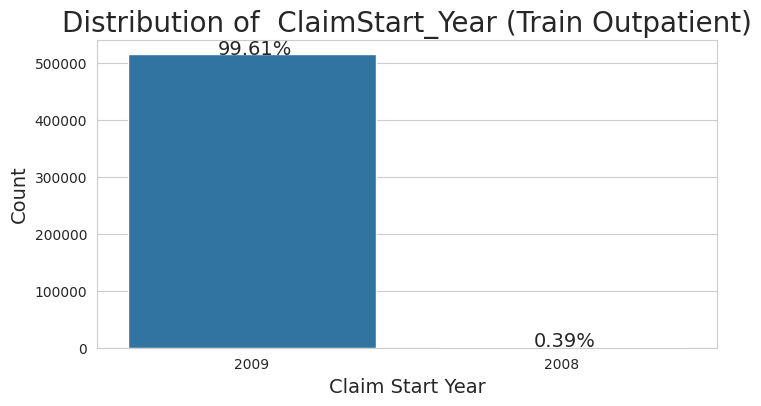

In [72]:
# Plot distribution of claim start year in Train Outpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimStart_Year',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['ClaimStart_Year'].value_counts().index)
plt.title('Distribution of  ClaimStart_Year (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Year', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Outpatient['ClaimStart_Year'], 0.01, 20,14)

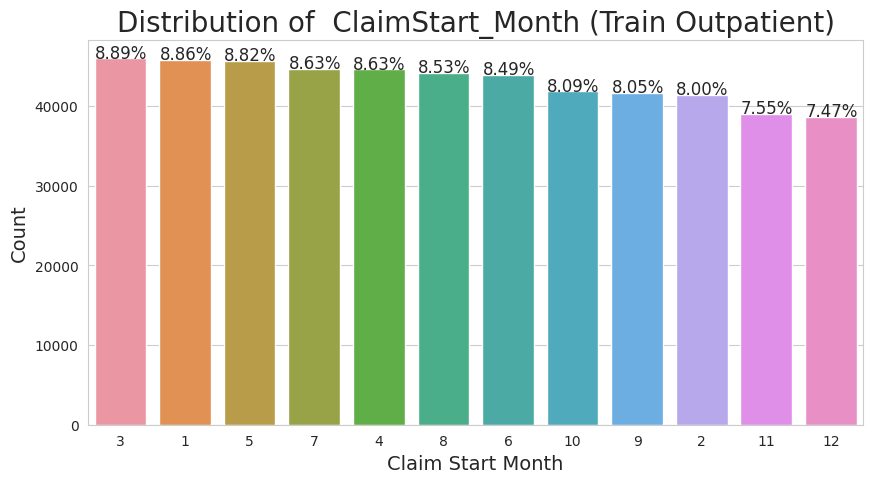

In [73]:
# Plot distribution of ClaimStart_Month in Train Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimStart_Month',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['ClaimStart_Month'].value_counts().index)
plt.title('Distribution of  ClaimStart_Month (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Month', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Outpatient['ClaimStart_Month'], 0.01, 20,12)

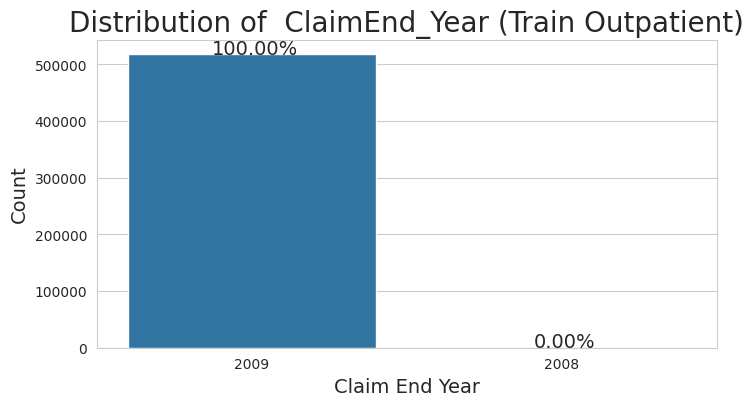

In [74]:
# Plot distribution of ClaimEnd_Year in Train_Outpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimEnd_Year',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['ClaimEnd_Year'].value_counts().index)
plt.title('Distribution of  ClaimEnd_Year (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Year', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Outpatient['ClaimEnd_Year'], 0.01, 20,14)

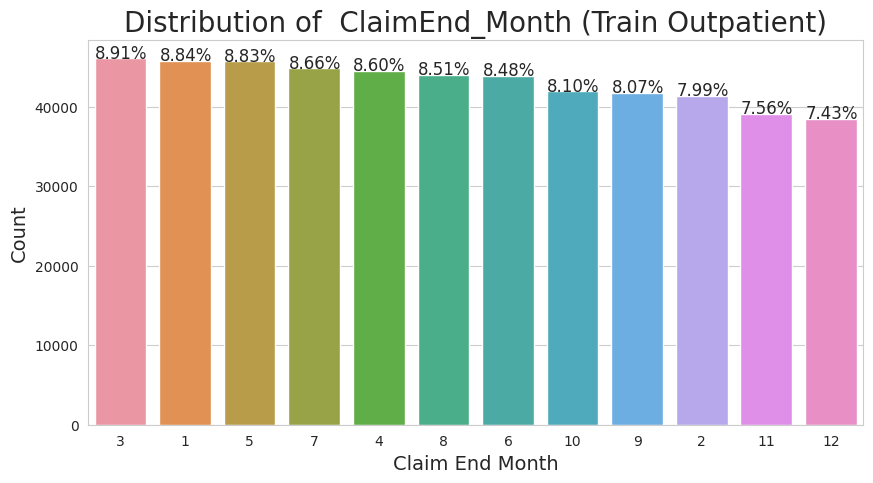

In [75]:
# Plot distribution of ClaimEnd_Month in Train_Outpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimEnd_Month',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['ClaimEnd_Month'].value_counts().index)
plt.title('Distribution of  ClaimEnd_Month (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Month', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Outpatient['ClaimEnd_Month'], 0.01, 20,12)

In [76]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_OP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_OP_df['ProcedureCode'] = pd.concat([Train_Outpatient["ClmProcedureCode_1"],
                                   Train_Outpatient["ClmProcedureCode_2"],
                                   Train_Outpatient["ClmProcedureCode_3"],
                                   Train_Outpatient["ClmProcedureCode_4"],
                                   Train_Outpatient["ClmProcedureCode_5"],
                                   Train_Outpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

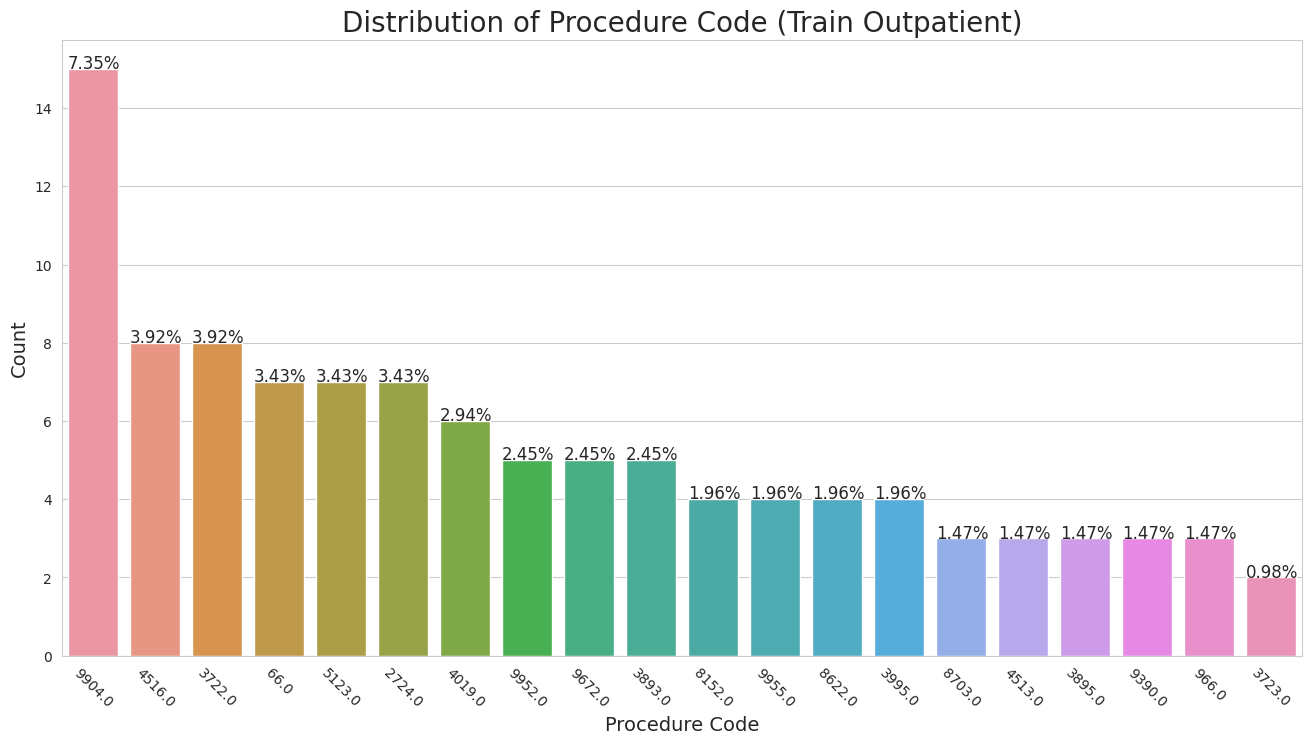

In [77]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_OP_df, orient ="v", order = ClmProcedureCode_OP_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code (Train Outpatient)', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_OP_df['ProcedureCode'], 0.02, 0.01, 12)

In [78]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_OP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_OP_df['DiagnosisCode'] = pd.concat([Train_Outpatient["ClmDiagnosisCode_1"],
                                           Train_Outpatient["ClmDiagnosisCode_2"],
                                           Train_Outpatient["ClmDiagnosisCode_3"],
                                           Train_Outpatient["ClmDiagnosisCode_4"],
                                           Train_Outpatient["ClmDiagnosisCode_5"],
                                           Train_Outpatient["ClmDiagnosisCode_6"],
                                           Train_Outpatient["ClmDiagnosisCode_7"],
                                           Train_Outpatient["ClmDiagnosisCode_8"],
                                           Train_Outpatient["ClmDiagnosisCode_9"],
                                           Train_Outpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

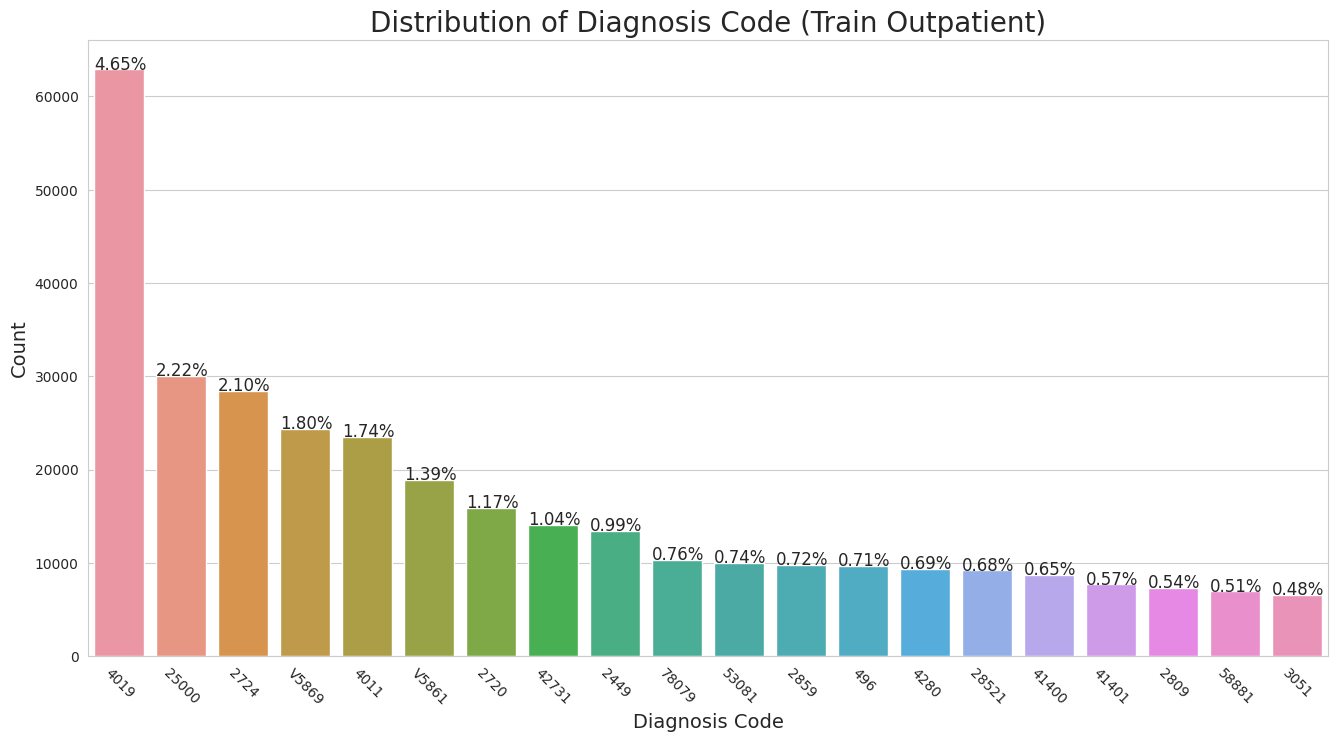

In [79]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_OP_df, orient ="v", order = ClmDiagnosisCode_OP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code (Train Outpatient)', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_OP_df['DiagnosisCode'], 0.02, 0.01, 12)

## Merge Inpatient and Outpatient Data


In [80]:
# Create a new column Inpatient_or_Outpatient where Inpatient =1 and Outpatient = 0
Train_Inpatient['Inpatient_or_Outpatient'] = 1
Train_Outpatient['Inpatient_or_Outpatient'] = 0
Test_Inpatient['Inpatient_or_Outpatient'] = 1
Test_Outpatient['Inpatient_or_Outpatient'] = 0

In [81]:
# Merge inpatient and outpatient dataframes based on common columns
common_columns = [ idx for idx in Train_Outpatient.columns if idx in Train_Inpatient.columns]
print(common_columns)
Inpatient_Outpatient_Merge = pd.merge(Train_Inpatient, Train_Outpatient, left_on = common_columns, right_on = common_columns,how = 'outer')


['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year', 'ClaimEnd_Month', 'Claim_Period', 'Inpatient_or_Outpatient']


In [82]:
# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge = pd.merge(Inpatient_Outpatient_Merge, Train_Beneficiary,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

# Merge provider details
Final_Dataset_Train = pd.merge(Inpatient_Outpatient_Beneficiary_Merge, Train , how = 'inner', on = 'Provider')
# Merge inpatient and outpatient dataframes based on common columns

common_columns_test = [ idx for idx in Test_Outpatient.columns if idx in Test_Inpatient.columns]
Inpatient_Outpatient_Merge_Te = pd.merge(Test_Inpatient, Test_Outpatient, left_on = common_columns_test, right_on = common_columns_test,how = 'outer')

# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge_Te = pd.merge(Inpatient_Outpatient_Merge_Te, Test_Beneficiary,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

Final_Dataset_Test = pd.merge(Inpatient_Outpatient_Beneficiary_Merge_Te, Test , how = 'inner', on = 'Provider' )
print(Final_Dataset_Train.shape)
Final_Dataset_Train.head(2)

(558211, 72)


BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12 2009-04-18  PRV55912   
1  BENE16973  CLM565430   2009-09-06 2009-09-06  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                      50          PHY365867          PHY327147   

  OtherPhysician AdmissionDt  ... IPAnnualReimbursementAmt  \
0            NaN  2009-04-12  ...                    36000   
1            NaN         NaT  ...                    24000   

   IPAnnualDeductibleAmt OPAnnualReimbursementAmt OPAnnualDeductibleAmt  \
0                   3204                       60                    70   
1                   2136                      450                   200   

  Patient_Risk_Score Birth_Year Birth_Month Patient_Age isDead PotentialFraud  
0                  7       1943           1        67.0      0            Yes  
1                  4       1932           5        78.0      0            Yes  

[2 rows x 72 columns]

In [132]:
Final_Dataset_Train['Gender'].value_counts()

2    323114
1    235097
Name: Gender, dtype: int64

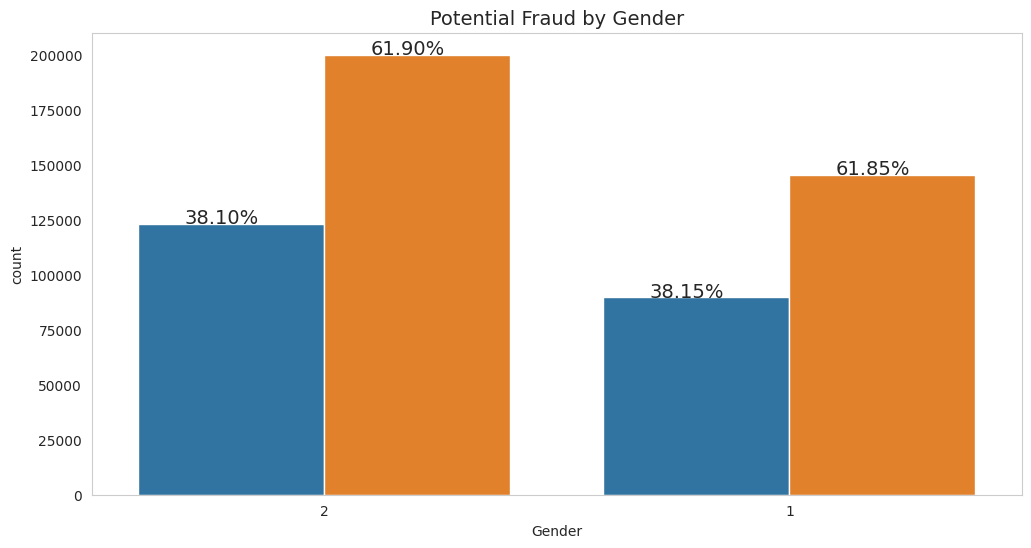

In [138]:
# Distribution of gender in Overall data
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Gender', y=None, data=Final_Dataset_Train, hue="PotentialFraud", orient="v", hue_order=['Yes', 'No'], order=Final_Dataset_Train['Gender'].value_counts().index)
ax.get_legend().remove()
plt.grid(False)
plt.title('Potential Fraud by Gender', size=14)
percentage_with_hue(ax, Final_Dataset_Train.Gender, 2, 2, -0.1, 200, 14)

In [140]:
gender_counts_by_fraud = Final_Dataset_Train.groupby(['Gender', 'PotentialFraud']).size().unstack(fill_value=0)
print("Gender value counts based on PotentialFraud:")
print(gender_counts_by_fraud)


Gender value counts based on PotentialFraud:
PotentialFraud      No     Yes
Gender                        
1               145414   89683
2               200001  123113


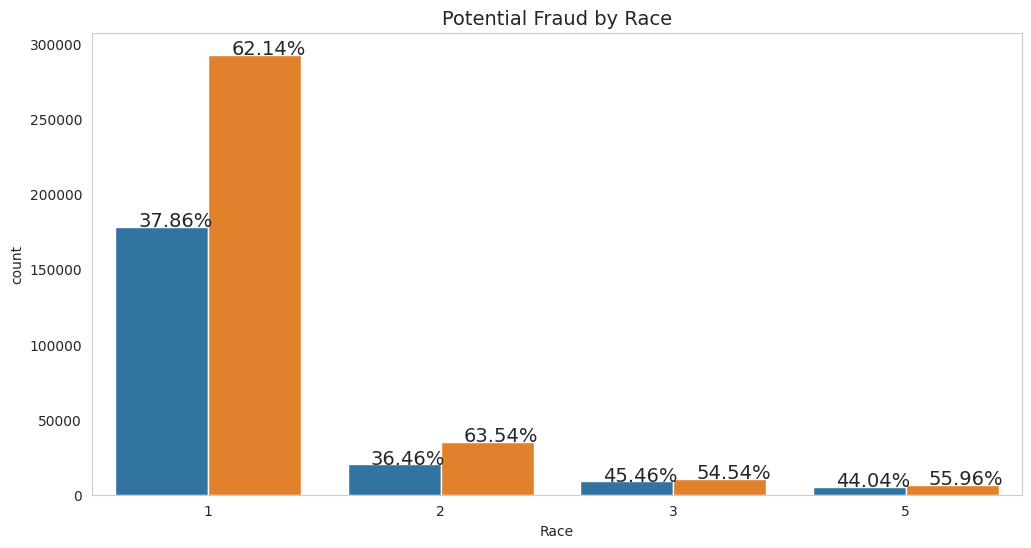

In [129]:
# Distribution of race in Overall data
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Race',y=None, data=Final_Dataset_Train, hue="PotentialFraud", orient ="v",hue_order=['Yes','No'], order = Final_Dataset_Train['Race'].value_counts().index)
ax.get_legend().remove()
plt.grid(False)
plt.title('Potential Fraud by Race', size = 14)
percentage_with_hue(ax, Final_Dataset_Train.Race, 4,2,-0.1,200, 14)


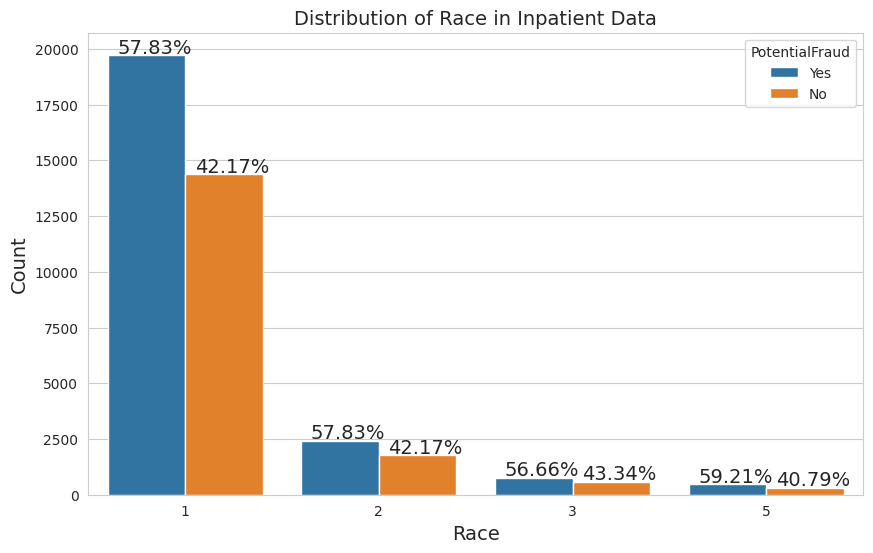

In [84]:
# Distribution of race in Inpatient Data
plt.figure(figsize=(10, 6))
Data = Final_Dataset_Train[Final_Dataset_Train.Inpatient_or_Outpatient == 1]
order = Final_Dataset_Train.Race.value_counts().index
ax = sns.countplot(x='Race',y=None, data=Data, hue= "PotentialFraud", orient ="v", order = order) #hue_order=['No','Yes'],
plt.title('Distribution of Race in Inpatient Data', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race', size = 14)
plt.ylabel('Count', size = 14)
percentage_with_hue(ax, Data.Race, 4,2,-0.15,80, 14)

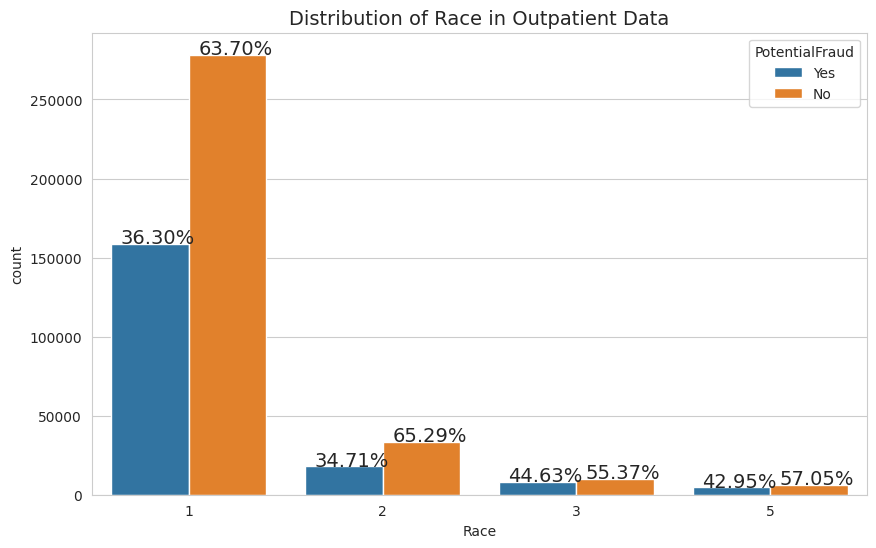

In [85]:
# Distribution of race in Inpatient Data
plt.figure(figsize=(10, 6))
Data = Final_Dataset_Train[Final_Dataset_Train.Inpatient_or_Outpatient == 0]
order = Final_Dataset_Train.Race.value_counts().index
ax = sns.countplot(x='Race',y=None, data=Data, hue= "PotentialFraud", orient ="v", order = order) #hue_order=['No','Yes'],
plt.title('Distribution of Race in Outpatient Data', size = 14)
percentage_with_hue(ax, Data.Race, 4,2,-0.15,200, 14)

In [86]:
Total_number_of_inpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].count()
Total_number_of_inpatient_claims

40474

In [87]:
#Calculatinng total and percentage money lost for Inpatient
Total_number_of_inpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].count()
Total_Money_Fraud_Inpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1) & (Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent_Inpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].sum()
print("Total_Money_Spent_Inpatient : ",Total_Money_Spent_Inpatient)
print('Average reimbursed amount per patient :' , round(Total_Money_Spent_Inpatient/Total_number_of_inpatient_claims))
print("Total_Money_Fraud_Inpatient : ",Total_Money_Fraud_Inpatient)
print("Percentage of money spent in fraud for Inpatient = {:.2f}%".format(Total_Money_Fraud_Inpatient/Total_Money_Spent_Inpatient *100))

Total_Money_Spent_Inpatient :  408297020
Average reimbursed amount per patient : 10088
Total_Money_Fraud_Inpatient :  241288510
Percentage of money spent in fraud for Inpatient = 59.10%


In [88]:
#Calculatinng total and percentage money lost for Outpatient
Total_number_of_Outpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0)].count()
Total_Money_Fraud_Outpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0) & (Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent_Outpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0)].sum()
print("Total_Money_Spent_Outpatient : ",Total_Money_Spent_Outpatient)
print('Average reimbursed amount per patient :' , round(Total_Money_Spent_Outpatient/Total_number_of_Outpatient_claims))
print("Total_Money_Fraud_Outpatient : ",Total_Money_Fraud_Outpatient)
print("Percentage of money spent in fraud for Outpatient = {:.2f}%".format(Total_Money_Fraud_Outpatient/Total_Money_Spent_Outpatient *100))


Total_Money_Spent_Outpatient :  148246120
Average reimbursed amount per patient : 286
Total_Money_Fraud_Outpatient :  54392610
Percentage of money spent in fraud for Outpatient = 36.69%


In [89]:
#Calculatinng total and percentage money lost for overall data
Total_Money_Fraud = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent = Final_Dataset_Train.InscClaimAmtReimbursed.sum()
print("Total_Money_Spent : ",Total_Money_Spent)
print("Total_Money_Fraud : ",Total_Money_Fraud)
print("Percentage of money spent in fraud = {:.2f}%".format(Total_Money_Fraud/Total_Money_Spent *100))


Total_Money_Spent :  556543140
Total_Money_Fraud :  295681120
Percentage of money spent in fraud = 53.13%


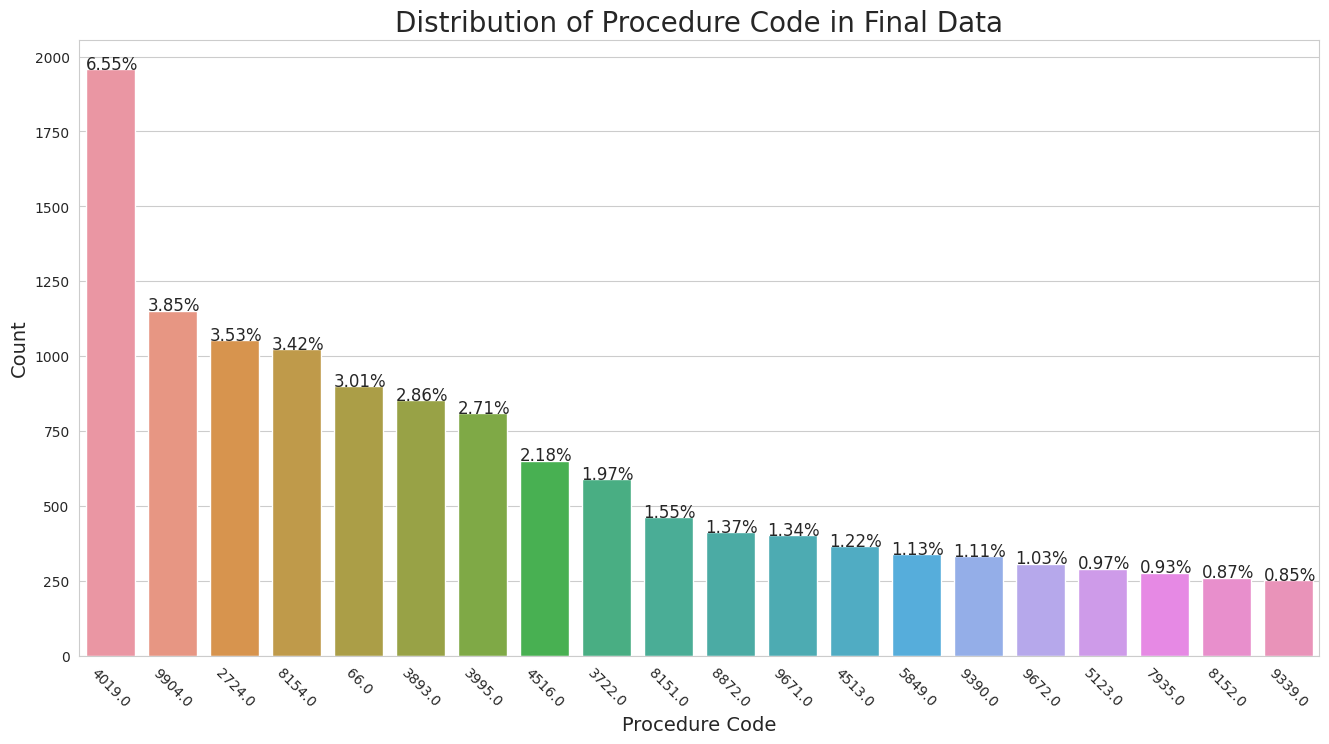

In [90]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_df['ProcedureCode'] = pd.concat([Final_Dataset_Train["ClmProcedureCode_1"],
                                   Final_Dataset_Train["ClmProcedureCode_2"],
                                   Final_Dataset_Train["ClmProcedureCode_3"],
                                   Final_Dataset_Train["ClmProcedureCode_4"],
                                   Final_Dataset_Train["ClmProcedureCode_5"],
                                   Final_Dataset_Train["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_df, orient ="v", order = ClmProcedureCode_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code in Final Data', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_df['ProcedureCode'], 0.02, 0.01, 12)

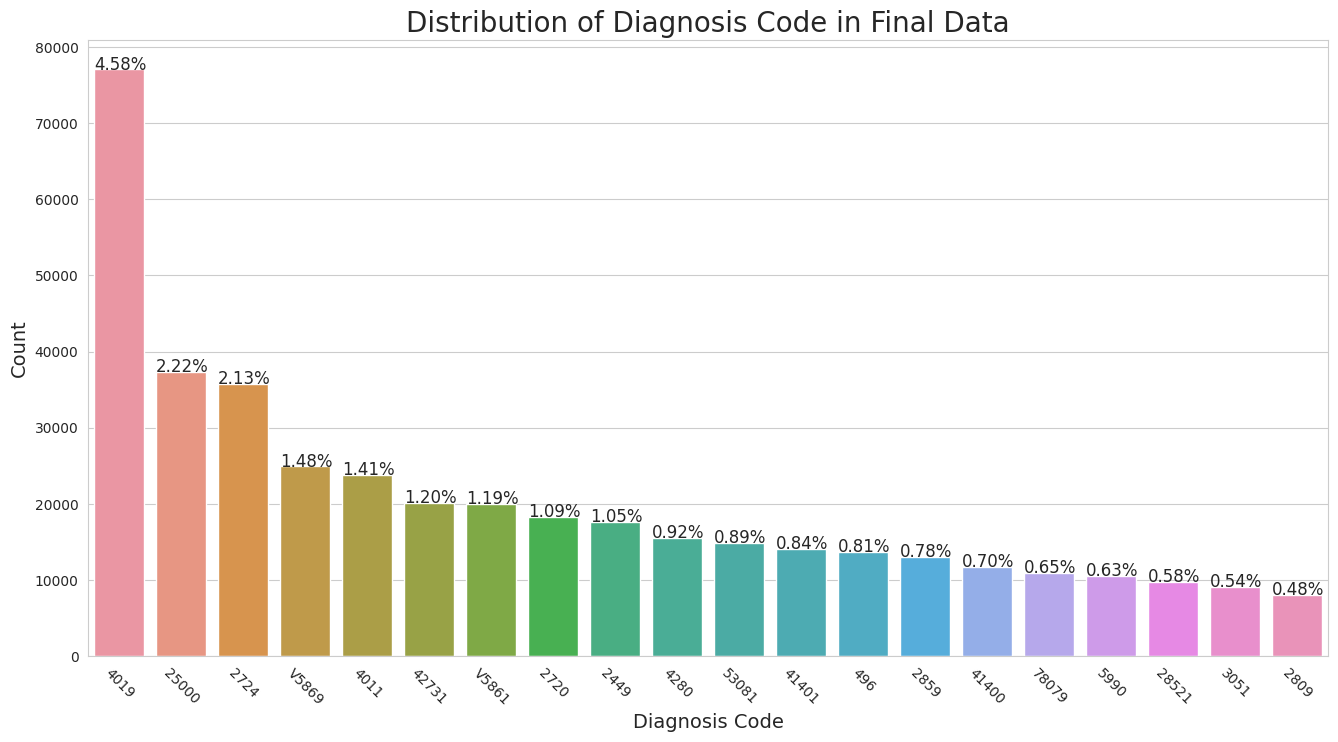

In [91]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_df['DiagnosisCode'] = pd.concat([Final_Dataset_Train["ClmDiagnosisCode_1"],
                                           Final_Dataset_Train["ClmDiagnosisCode_2"],
                                           Final_Dataset_Train["ClmDiagnosisCode_3"],
                                           Final_Dataset_Train["ClmDiagnosisCode_4"],
                                           Final_Dataset_Train["ClmDiagnosisCode_5"],
                                           Final_Dataset_Train["ClmDiagnosisCode_6"],
                                           Final_Dataset_Train["ClmDiagnosisCode_7"],
                                           Final_Dataset_Train["ClmDiagnosisCode_8"],
                                           Final_Dataset_Train["ClmDiagnosisCode_9"],
                                           Final_Dataset_Train["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_df, orient ="v", order = ClmDiagnosisCode_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code in Final Data', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_df['DiagnosisCode'], 0.02, 0.01, 12)


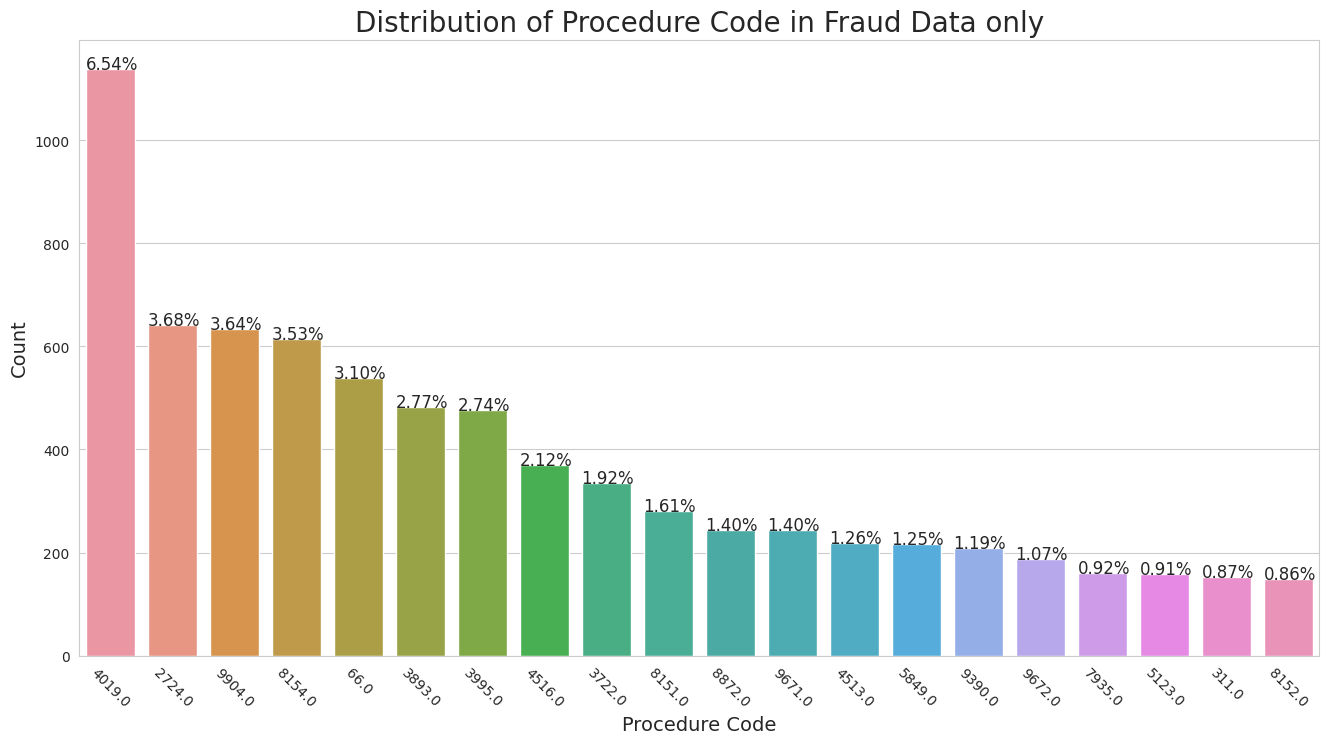

In [92]:
# Separate dataframe with fraud only
Final_Dataset_Fraud_Train = Final_Dataset_Train[Final_Dataset_Train.PotentialFraud == 'Yes']
ClmProcedureCodeFraud_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCodeFraud_df['ProcedureCode'] = pd.concat([Final_Dataset_Fraud_Train["ClmProcedureCode_1"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_2"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_3"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_4"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_5"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_6"]], axis=0, sort=True).dropna()
# Plot the countplot for claim diagnosis codes (Top 20) only for fraud data
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCodeFraud_df, orient ="v", order = ClmProcedureCodeFraud_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code in Fraud Data only', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCodeFraud_df['ProcedureCode'], 0.02, 0.01, 12)


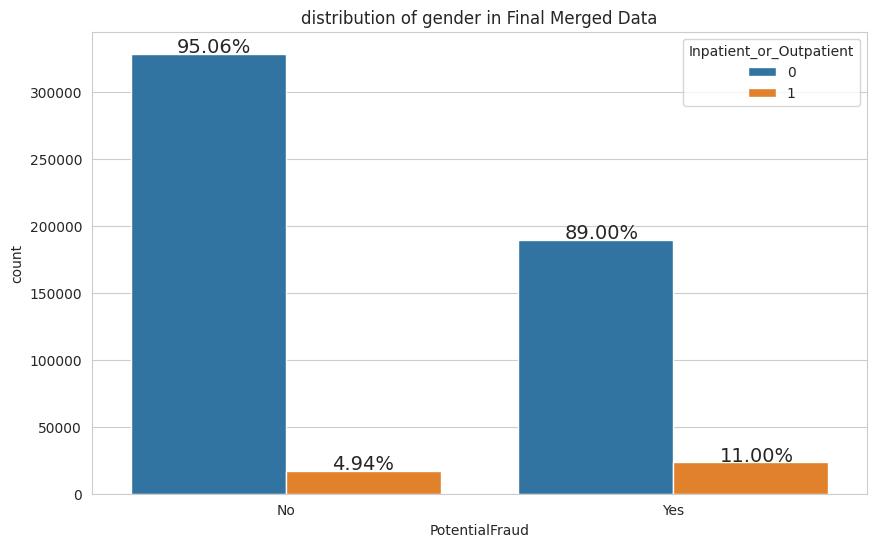

In [93]:
# Plot distribution of gender in Final Merged Data
plt.figure(figsize=(10,6))
ax = sns.countplot(x='PotentialFraud',data=Final_Dataset_Train, hue = 'Inpatient_or_Outpatient', order = Final_Dataset_Train['PotentialFraud'].value_counts().index)
plt.title('distribution of gender in Final Merged Data')
percentage_with_hue(ax, Final_Dataset_Train['PotentialFraud'], 2,2,-0.08,1000, 14)


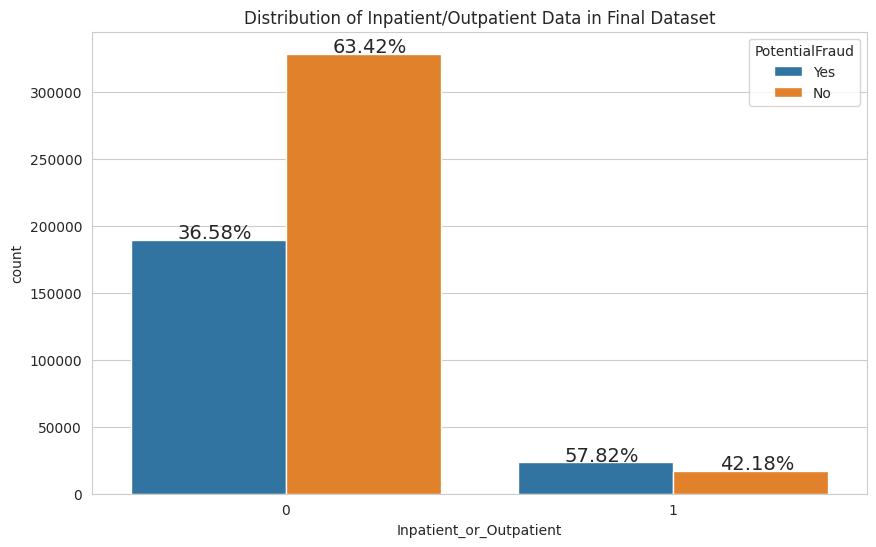

In [94]:
# Plot distribution of gender in Beneficiaries data
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Inpatient_or_Outpatient',data=Final_Dataset_Train, hue = 'PotentialFraud', order = Final_Dataset_Train['Inpatient_or_Outpatient'].value_counts().index)
plt.title('Distribution of Inpatient/Outpatient Data in Final Dataset')
percentage_with_hue(ax, Final_Dataset_Train['Inpatient_or_Outpatient'], 2,2,-0.08,1000, 14)


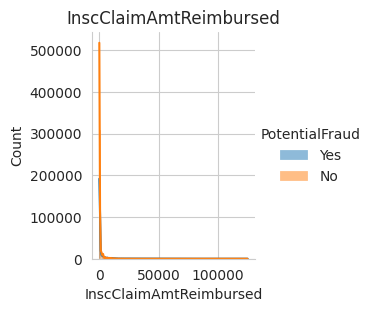

In [95]:
#Histogram of InscClaimAmtReimbursed
sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud") \
   .map(sns.histplot, "InscClaimAmtReimbursed", bins = 100, kde = True) \
   .add_legend();
plt.title('InscClaimAmtReimbursed')
plt.show();

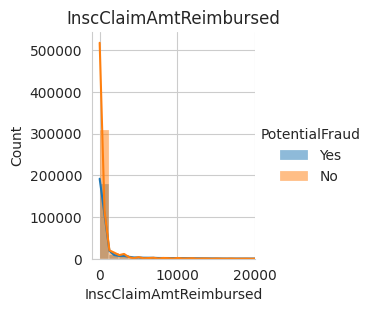

In [96]:
#Histogram of InscClaimAmtReimbursed
sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud") \
   .map(sns.histplot, "InscClaimAmtReimbursed", kde = True, bins = 100) \
   .add_legend();
plt.xlim(-1000,20000)
plt.title('InscClaimAmtReimbursed')
plt.show();

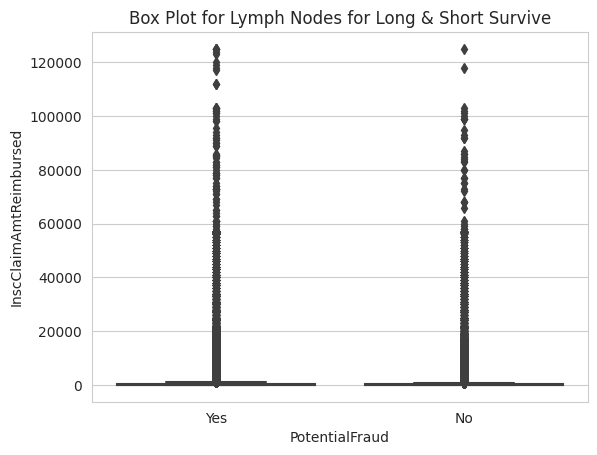

In [97]:
#Box Plot for InscClaimAmtReimbursed
sns.boxplot(x='PotentialFraud',y='InscClaimAmtReimbursed', data=Final_Dataset_Train)
# plt.ylim(0,1000)
plt.title('Box Plot for Lymph Nodes for Long & Short Survive')
plt.show()

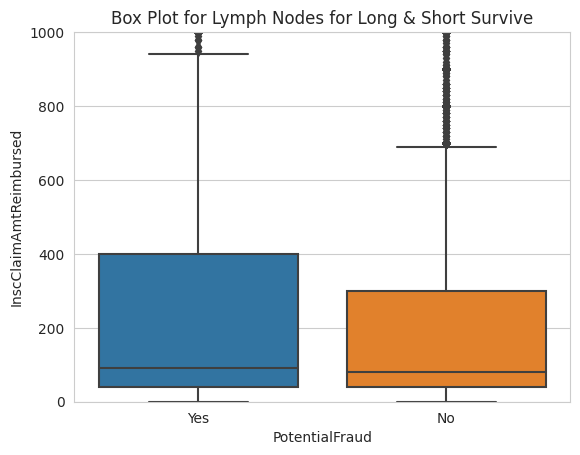

In [98]:
#Box Plot for InscClaimAmtReimbursed
sns.boxplot(x='PotentialFraud',y='InscClaimAmtReimbursed', data=Final_Dataset_Train)
plt.ylim(0,1000)
plt.title('Box Plot for Lymph Nodes for Long & Short Survive')
plt.show()

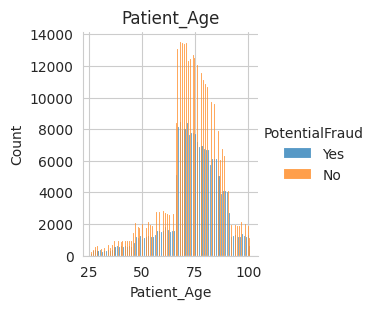

In [99]:
#Histogram of Patient Age
sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud") \
   .map(sns.histplot, "Patient_Age") \
   .add_legend();
# plt.xlim(-1000,20000)
plt.title('Patient_Age')
plt.show();

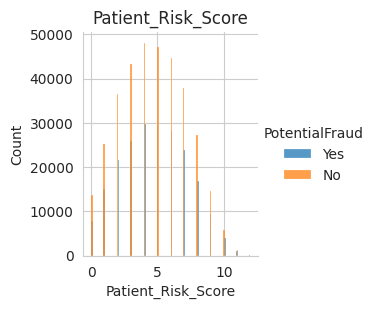

In [100]:
#Histogram of Patient Age
sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud") \
   .map(sns.histplot, "Patient_Risk_Score") \
   .add_legend();
# plt.xlim(-1000,20000)
plt.title('Patient_Risk_Score')
plt.show();

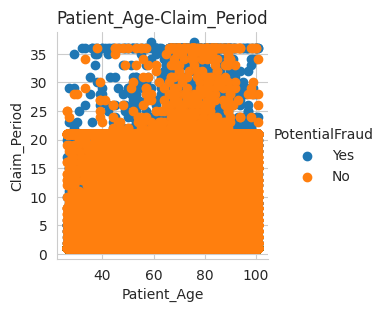

In [101]:
#Scatter Plot- Patient Age vs Claim_Period
sns.set_style("whitegrid")
sns.FacetGrid(Final_Dataset_Train, hue='PotentialFraud')\
    .map(plt.scatter, "Patient_Age", "Claim_Period")\
    .add_legend();
plt.title('Patient_Age-Claim_Period')
plt.show();

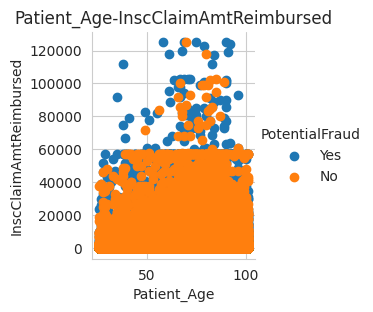

In [102]:
#Scatter Plot- Patient Age vs InscClaimAmtReimbursed
sns.set_style("whitegrid")
sns.FacetGrid(Final_Dataset_Train, hue='PotentialFraud')\
    .map(plt.scatter, "Patient_Age", "InscClaimAmtReimbursed")\
    .add_legend();
plt.title('Patient_Age-InscClaimAmtReimbursed')
plt.show();

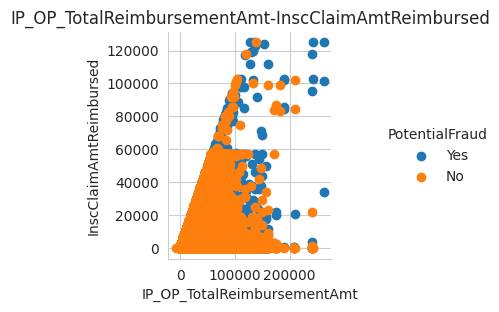

In [103]:
# create new feature total reimbursement amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Train['IPAnnualReimbursementAmt'] + Final_Dataset_Train['OPAnnualReimbursementAmt']
# create new feature total deductible amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Train['IPAnnualDeductibleAmt'] + Final_Dataset_Train['OPAnnualDeductibleAmt']

Final_Dataset_Test['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Test['IPAnnualReimbursementAmt'] + Final_Dataset_Test['OPAnnualReimbursementAmt']
Final_Dataset_Test['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Test['IPAnnualDeductibleAmt'] + Final_Dataset_Test['OPAnnualDeductibleAmt']
#Scatter Plot- IP_OP_TotalReimbursementAmt vs InscClaimAmtReimbursed
sns.set_style("whitegrid")
sns.FacetGrid(Final_Dataset_Train, hue='PotentialFraud')\
    .map(plt.scatter, "IP_OP_TotalReimbursementAmt", "InscClaimAmtReimbursed")\
    .add_legend();
plt.title('IP_OP_TotalReimbursementAmt-InscClaimAmtReimbursed')
plt.show();

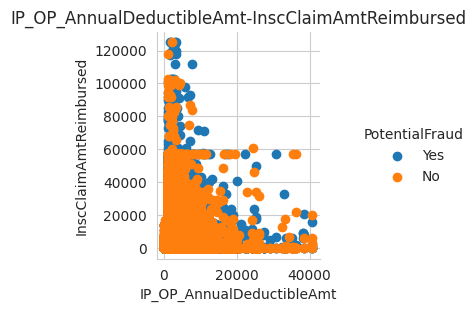

In [104]:
#Scatter Plot- IP_OP_AnnualDeductibleAmt vs InscClaimAmtReimbursed
sns.set_style("whitegrid")
sns.FacetGrid(Final_Dataset_Train, hue='PotentialFraud')\
    .map(plt.scatter, "IP_OP_AnnualDeductibleAmt", "InscClaimAmtReimbursed")\
    .add_legend()
plt.title('IP_OP_AnnualDeductibleAmt-InscClaimAmtReimbursed')
plt.show()

In [105]:
len(Final_Dataset_Train.columns)

74

In [106]:
#Final_Dataset_Train.to_csv("Final_Dataset_Train.csv")

In [107]:
#Final_Dataset_Test.to_csv("Final_Dataset_Test.csv")

In [108]:
Final_Dataset_Train.head()

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12 2009-04-18  PRV55912   
1  BENE16973  CLM565430   2009-09-06 2009-09-06  PRV55912   
2  BENE17521   CLM34721   2009-01-20 2009-02-01  PRV55912   
3  BENE21718   CLM72336   2009-10-17 2009-11-04  PRV55912   
4  BENE22934   CLM73394   2009-10-25 2009-10-29  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                      50          PHY365867          PHY327147   
2                   19000          PHY349293          PHY370861   
3                   17000          PHY334706          PHY334706   
4                   13000          PHY390614          PHY323689   

  OtherPhysician AdmissionDt  ... OPAnnualReimbursementAmt  \
0            NaN  2009-04-12  ...                       60   
1            NaN         NaT  ...                      450   
2      PHY363291  2009-01-20  ...                      100   
3            NaN  2009-10-17  ...                     1050   
4      PHY363291  2009-10-25  ...                      450   

   OPAnnualDeductibleAmt Patient_Risk_Score Birth_Year Birth_Month  \
0                     70                  7       1943           1   
1                    200                  4       1932           5   
2                     20                  5       1913          12   
3                    540                  2       1922          10   
4                    160                  6       1930           7   

  Patient_Age isDead PotentialFraud IP_OP_TotalReimbursementAmt  \
0        67.0      0            Yes                       36060   
1        78.0      0            Yes                       24450   
2        96.0      0            Yes                       19100   
3        87.0      0            Yes                       18050   
4        79.0      0            Yes                       27450   

  IP_OP_AnnualDeductibleAmt  
0                      3274  
1                      2336  
2                      1088  
3                      1608  
4                      2296  

[5 rows x 74 columns]

In [109]:
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

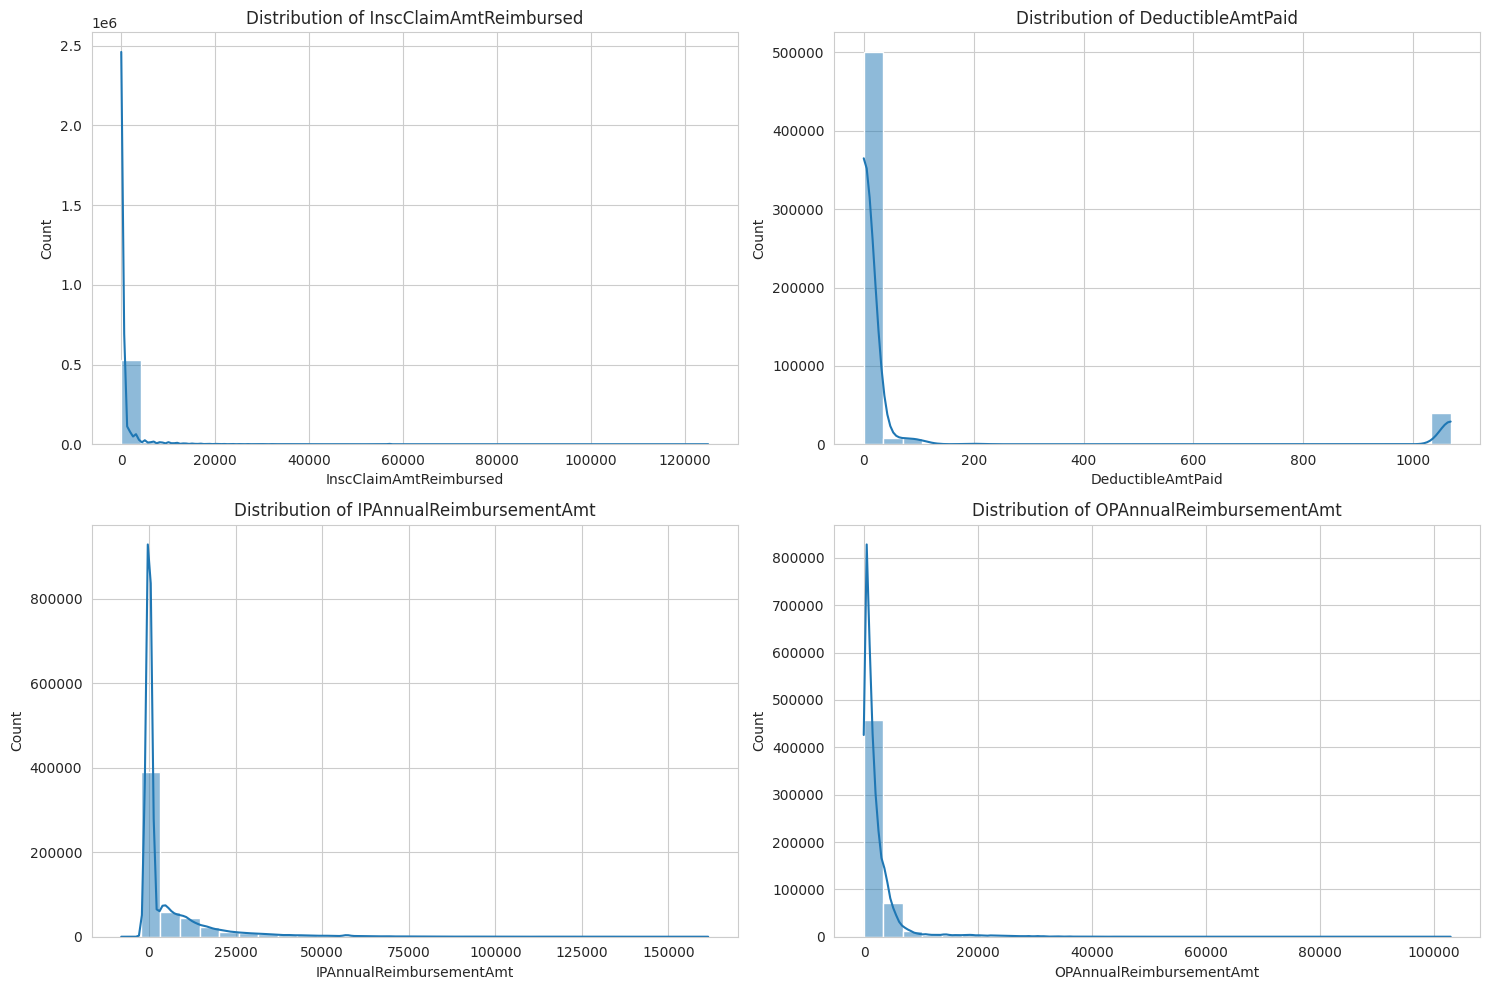

In [110]:
# Distribution of Reimbursement Amounts
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(Final_Dataset_Train['InscClaimAmtReimbursed'], bins=30, kde=True, ax=axes[0, 0]).set(title='Distribution of InscClaimAmtReimbursed')
sns.histplot(Final_Dataset_Train['DeductibleAmtPaid'], bins=30, kde=True, ax=axes[0, 1]).set(title='Distribution of DeductibleAmtPaid')
sns.histplot(Final_Dataset_Train['IPAnnualReimbursementAmt'], bins=30, kde=True, ax=axes[1, 0]).set(title='Distribution of IPAnnualReimbursementAmt')
sns.histplot(Final_Dataset_Train['OPAnnualReimbursementAmt'], bins=30, kde=True, ax=axes[1, 1]).set(title='Distribution of OPAnnualReimbursementAmt')
plt.tight_layout()
plt.show()

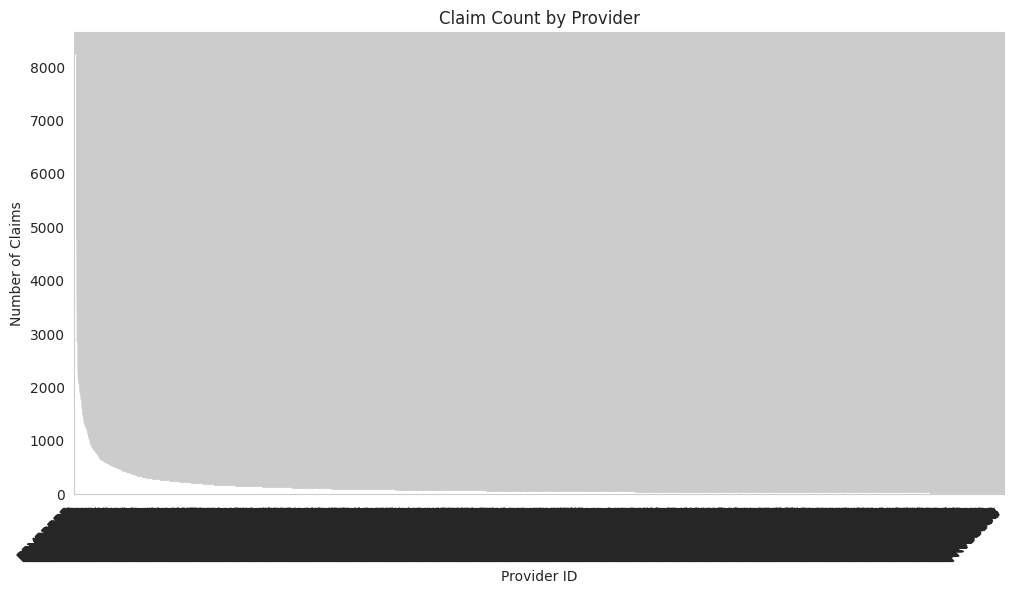

In [111]:
# Claim Count by Provider
plt.figure(figsize=(12, 6))
Final_Dataset_Train['Provider'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Claim Count by Provider')
plt.xlabel('Provider ID')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

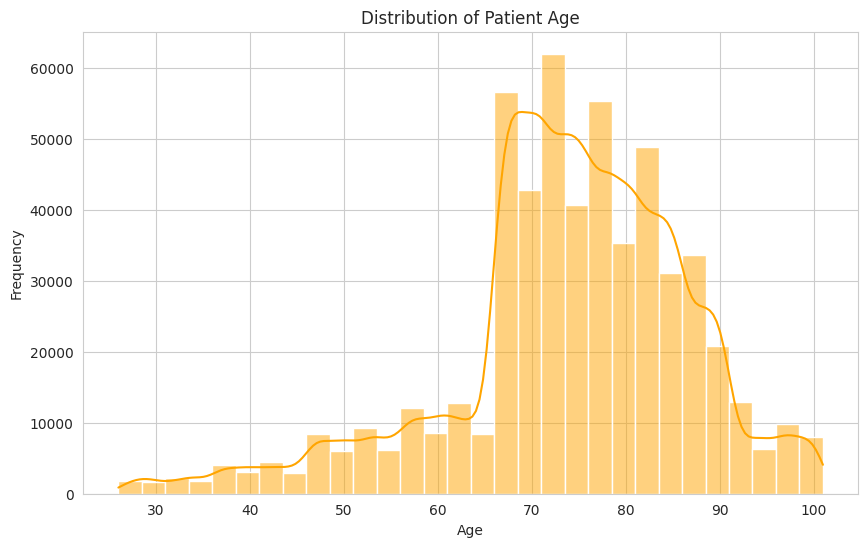

In [112]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(Final_Dataset_Train['Patient_Age'], bins=30, kde=True, color='orange')
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

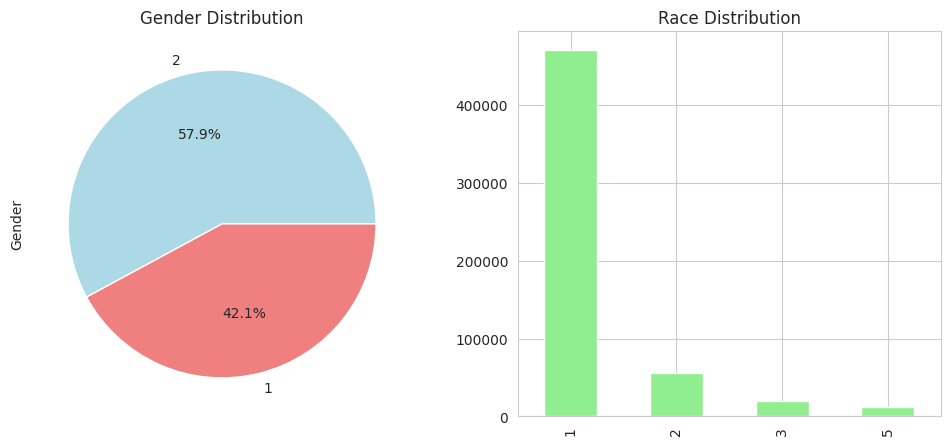

In [113]:
# Gender and Race Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
Final_Dataset_Train['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], colors=['lightblue', 'lightcoral'])
axes[0].set_title('Gender Distribution')
Final_Dataset_Train['Race'].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Race Distribution')
plt.show()

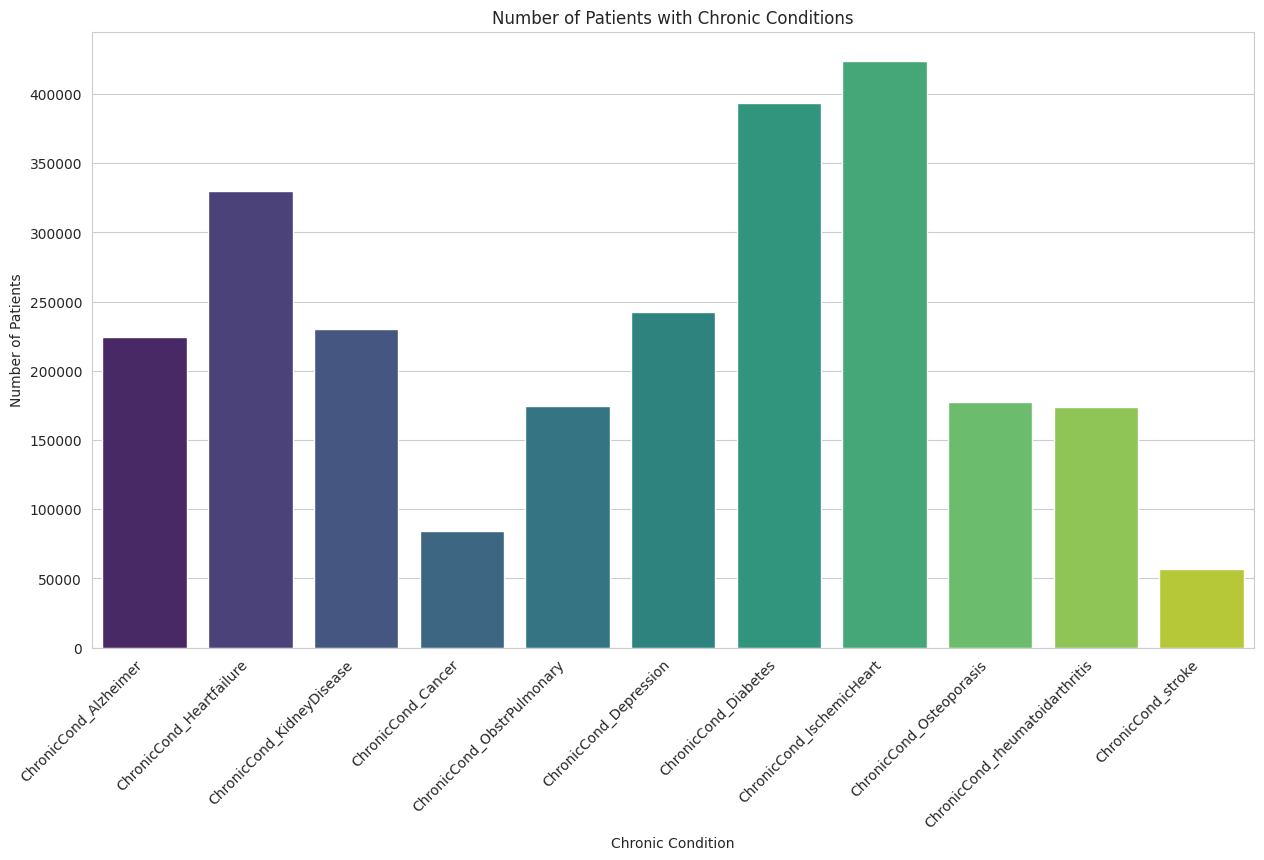

In [114]:
# Chronic Conditions Analysis
chronic_conditions = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
                       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

plt.figure(figsize=(15, 8))
sns.barplot(data=Final_Dataset_Train[chronic_conditions].sum().reset_index(), x='index', y=0, palette='viridis')
plt.title('Number of Patients with Chronic Conditions')
plt.xlabel('Chronic Condition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.show()

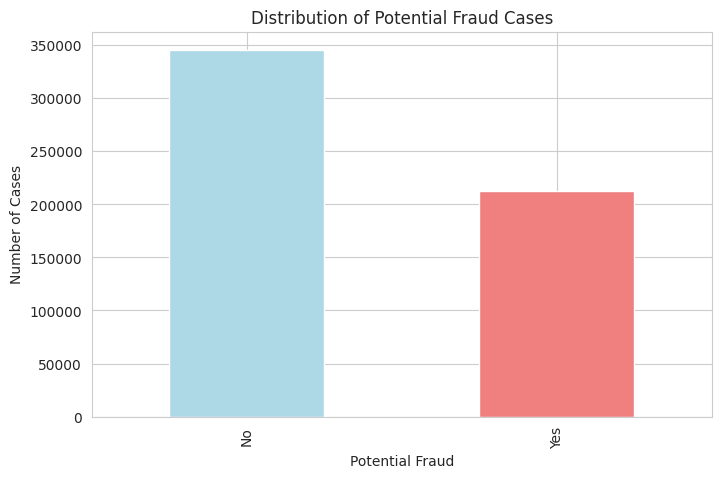

In [115]:
# Fraud vs. Non-Fraud Distribution
plt.figure(figsize=(8, 5))
Final_Dataset_Train['PotentialFraud'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Distribution of Potential Fraud Cases')
plt.xlabel('Potential Fraud')
plt.ylabel('Number of Cases')
plt.show()

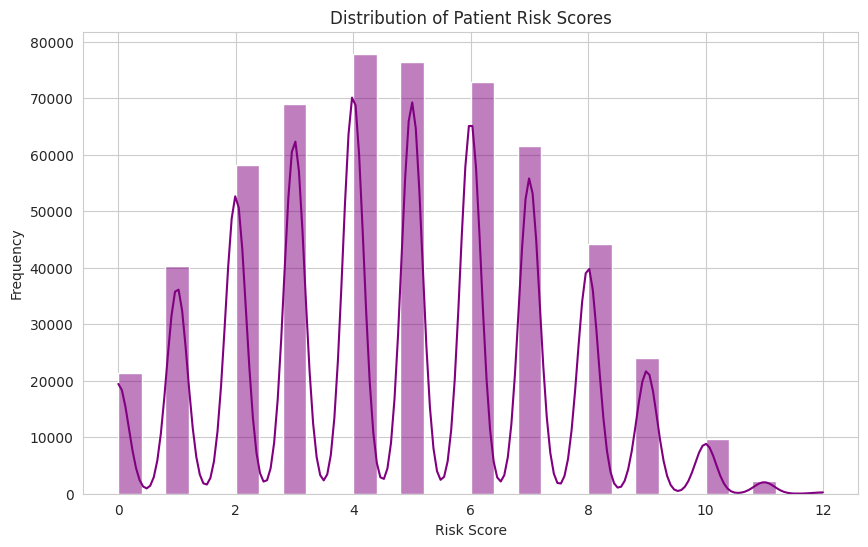

In [116]:
# Patient Risk Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(Final_Dataset_Train['Patient_Risk_Score'], bins=30, kde=True, color='purple')
plt.title('Distribution of Patient Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

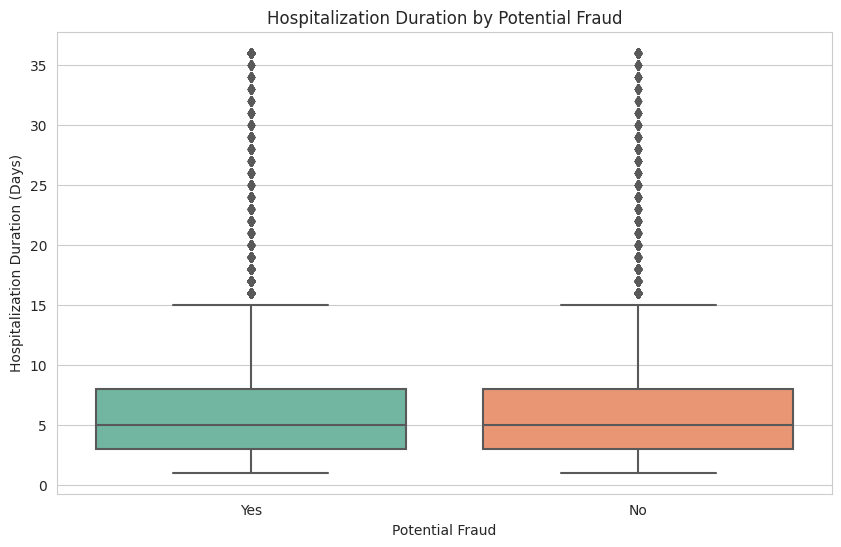

In [117]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PotentialFraud', y='Hospitalization_Duration', data=Final_Dataset_Train, palette='Set2')
plt.title('Hospitalization Duration by Potential Fraud')
plt.xlabel('Potential Fraud')
plt.ylabel('Hospitalization Duration (Days)')
plt.show()

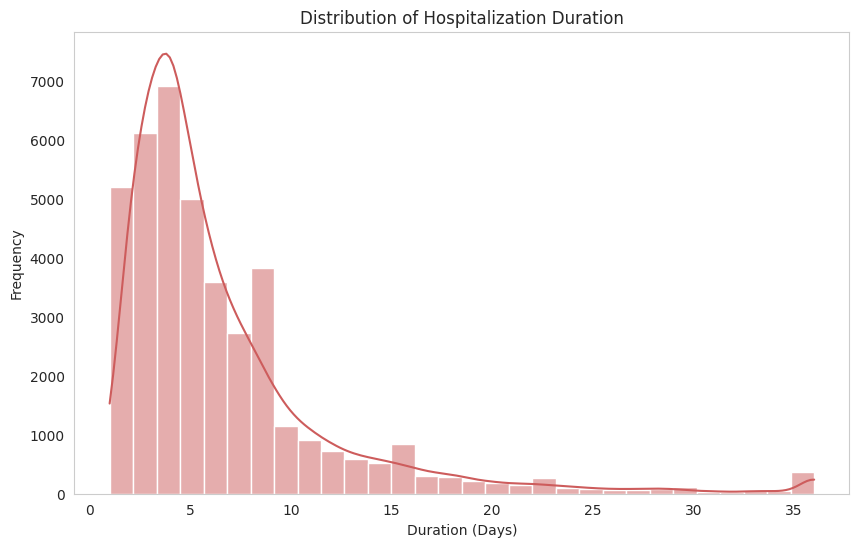

In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(Final_Dataset_Train['Hospitalization_Duration'], bins=30, kde=True, color='indianred')
plt.title('Distribution of Hospitalization Duration')
plt.xlabel('Duration (Days)')
plt.ylabel('Frequency')
plt.grid(False)  # Turn off the grid
plt.show()


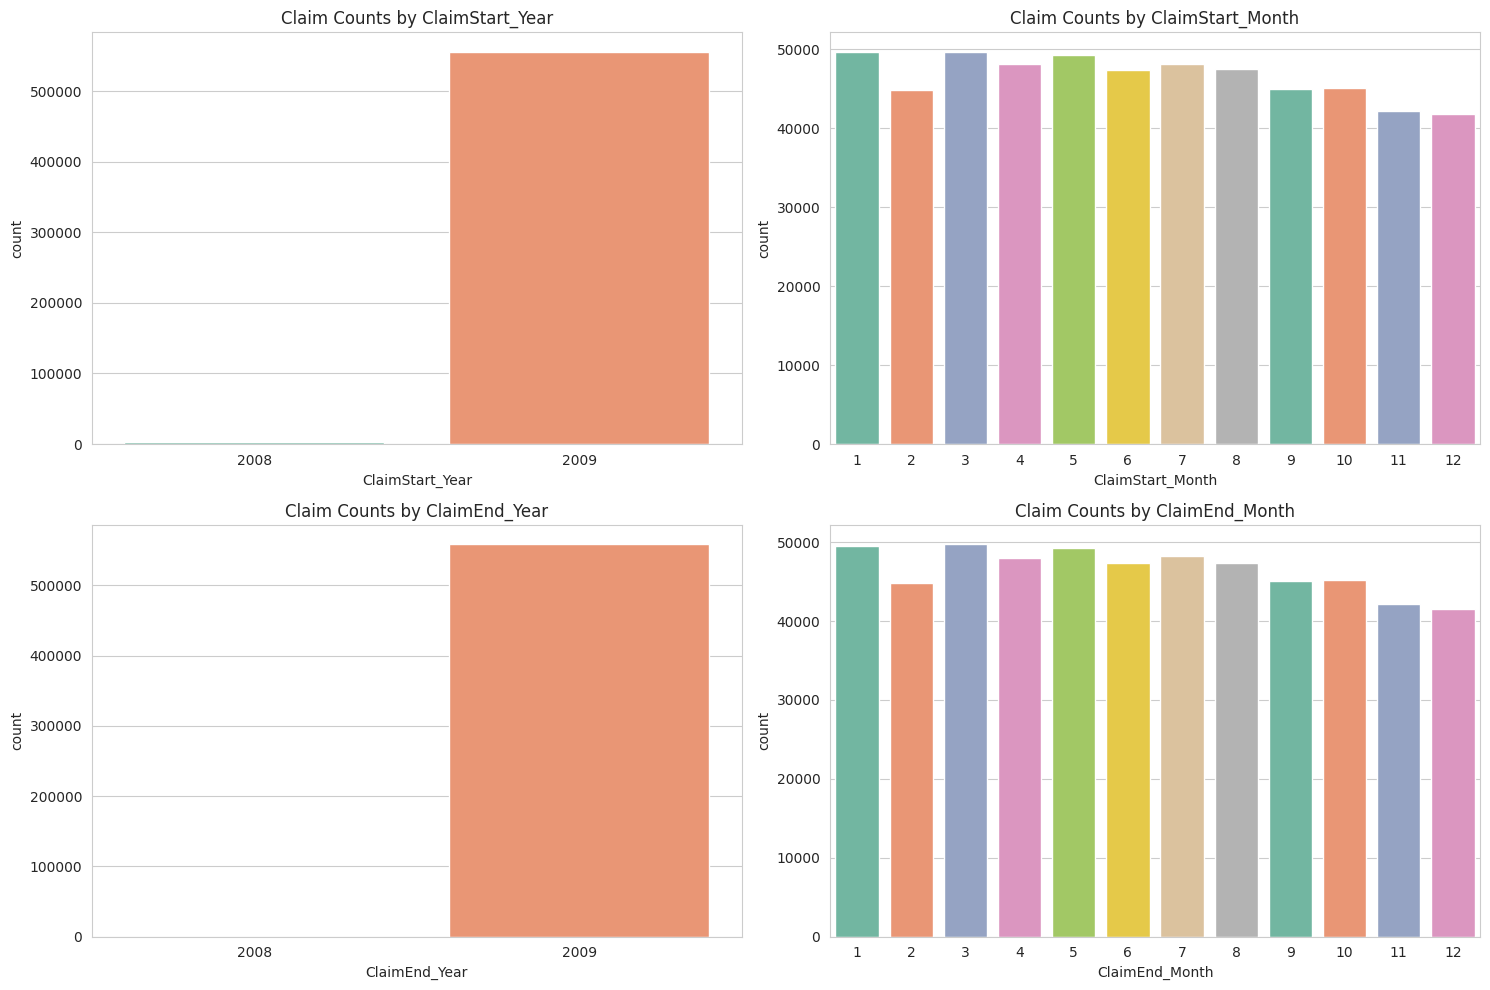

In [119]:
# Time Trends in Claims
time_trends = ['ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year', 'ClaimEnd_Month']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(time_trends):
    sns.countplot(x=Final_Dataset_Train[col], ax=axes[i // 2, i % 2], palette='Set2')
    axes[i // 2, i % 2].set_title(f'Claim Counts by {col}')
plt.tight_layout()
plt.show()

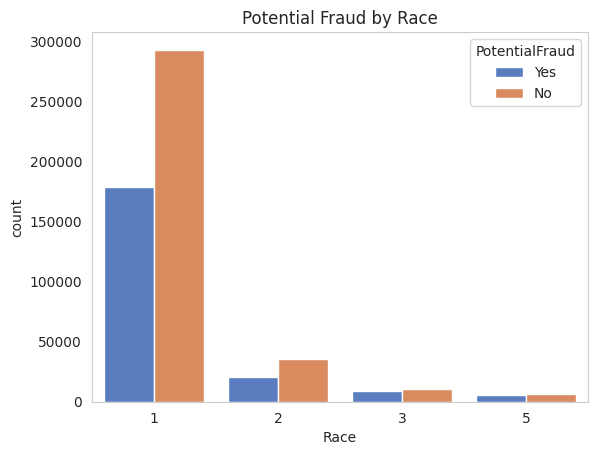

In [126]:
sns.countplot(x='Race', hue='PotentialFraud', data=Final_Dataset_Train, palette='muted')
plt.title('Potential Fraud by Race')
plt.grid(False)
plt.show()


In [121]:
print(Final_Dataset_Train.groupby(['Race', 'PotentialFraud']).size().reset_index(name='Count'))

   Race PotentialFraud   Count
0     1             No  292691
1     1            Yes  178345
2     2             No   35356
3     2            Yes   20284
4     3             No   10753
5     3            Yes    8962
6     5             No    6615
7     5            Yes    5205


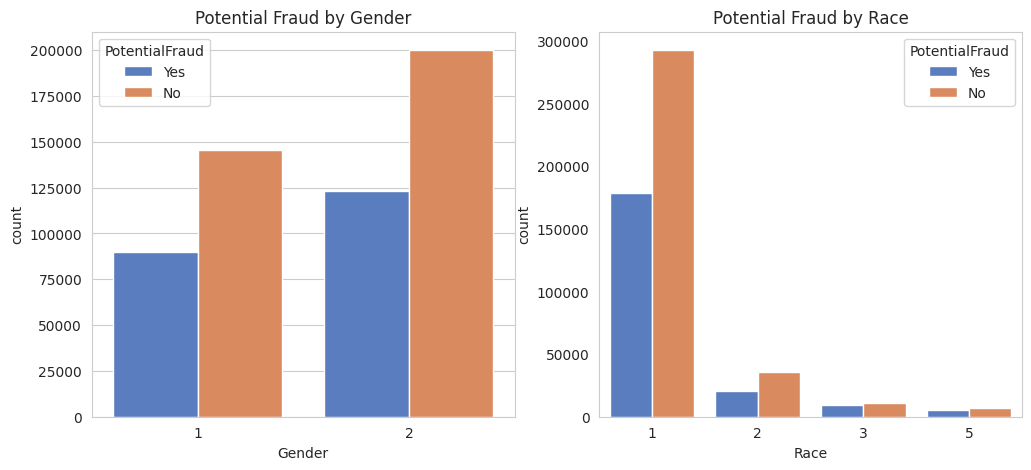

In [ ]:
# Potential Fraud by Gender or Race
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Gender', hue='PotentialFraud', data=Final_Dataset_Train, palette='muted', ax=axes[0])
axes[0].set_title('Potential Fraud by Gender')
plt.grid(False)
sns.countplot(x='Race', hue='PotentialFraud', data=Final_Dataset_Train, palette='muted', ax=axes[1])
axes[1].set_title('Potential Fraud by Race')
plt.grid(False)
plt.show()

<ipython-input-132-ebf926af59b6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Final_Dataset_Train.corr(), annot=True, cmap='coolwarm', fmt='.2f')


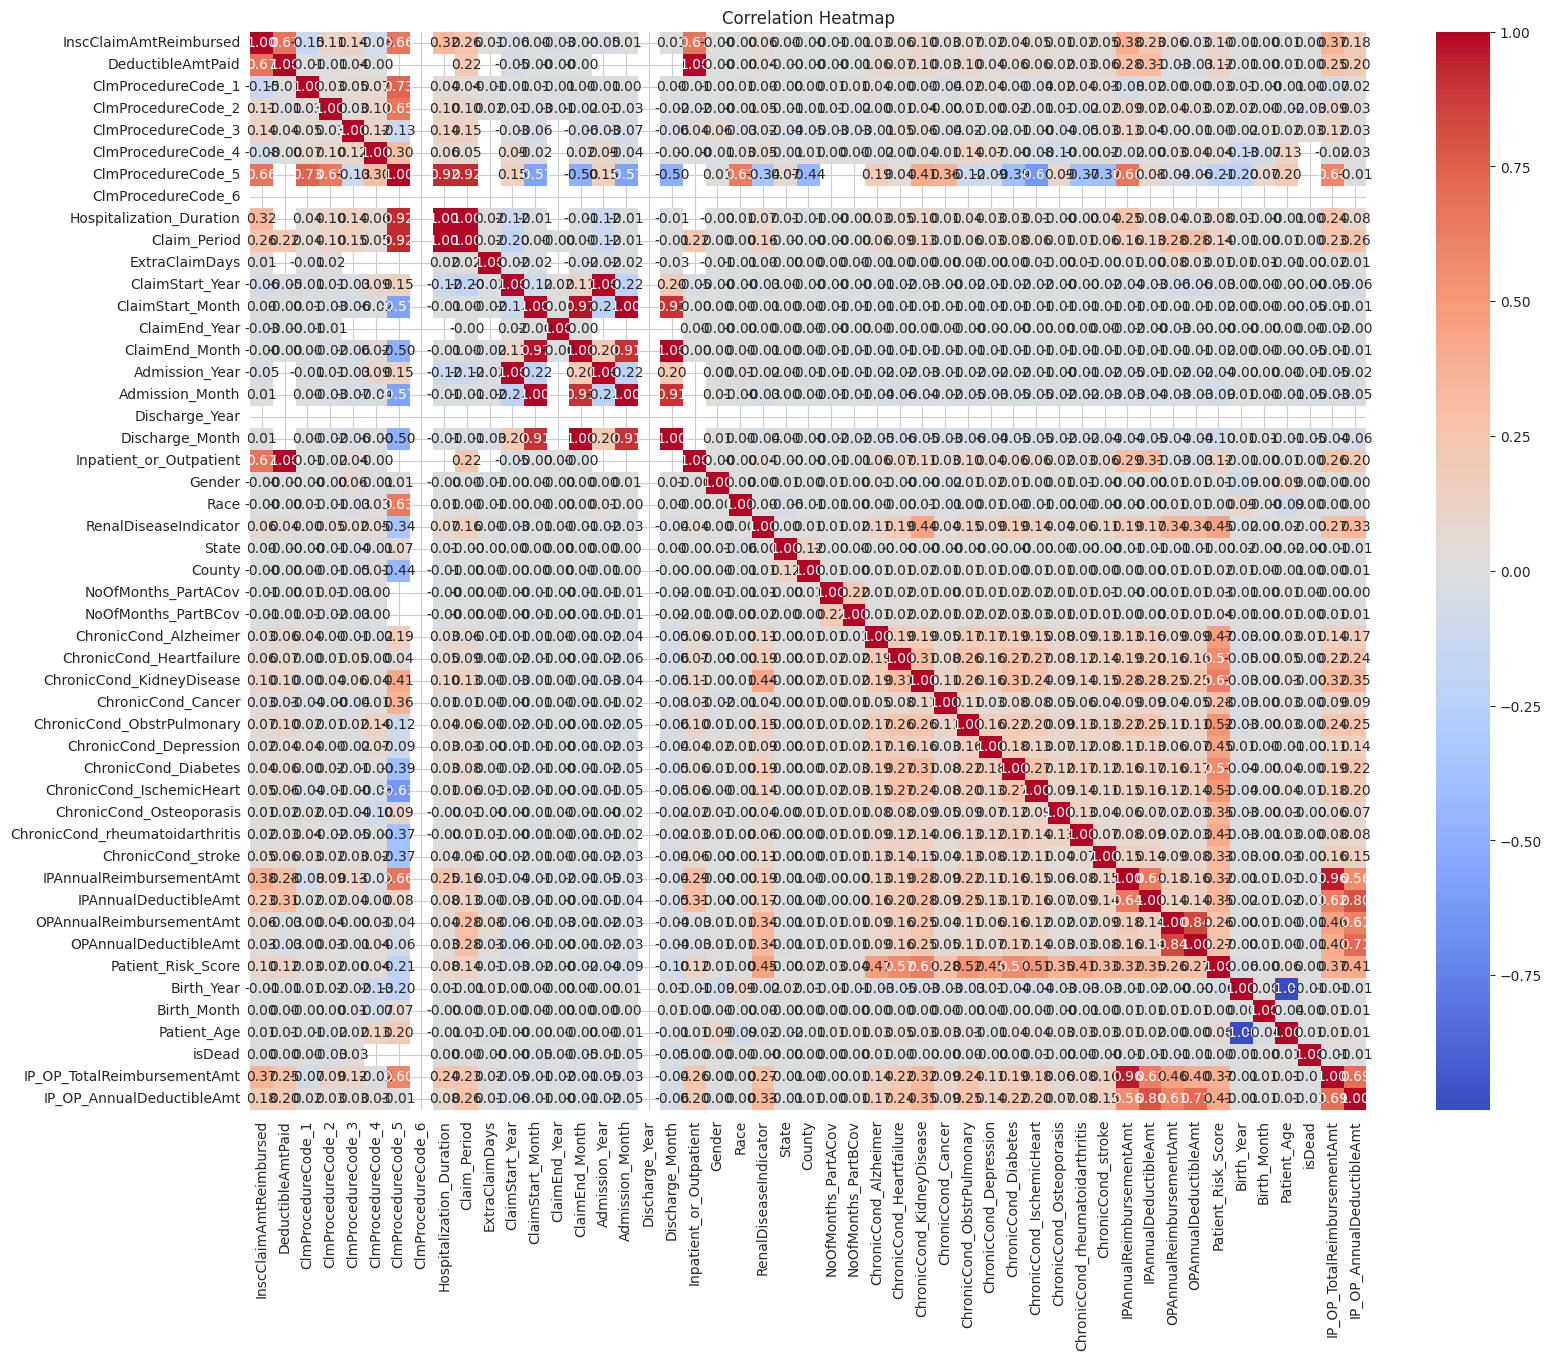

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(Final_Dataset_Train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()